# problem statement
Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline
sns.set_theme(style='darkgrid',palette='turbo_r')
warnings.filterwarnings('ignore')

In [2]:
import chardet

In [3]:
rawdata= open('ToyotaCorolla.csv','rb').read()
rawdata

b'Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar\r\n1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0\r\n2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0\r\n3,\xa0TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0\r\n4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0\r\n5,TOYO

In [4]:
result=chardet.detect(rawdata)
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [5]:
encoding=result['encoding']

In [6]:
Data=pd.read_csv('ToyotaCorolla.csv',encoding=encoding)

In [7]:
Data

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [8]:
df=pd.DataFrame()

In [9]:
df=Data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [10]:
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [11]:
df.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'Tax'},inplace=True)

In [12]:
df.describe()

Price          Age             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears          Tax      Weight  
count  1436.000000  1436.000000  1436.000000  1436.00000  
mean      4.033426     5.026462    87.122563  1072.45961  
std       0.952677     0.188510    41.128611    52.64112  
min       2.000000     3.000000    19.000000  1000.00000  
25%       3.000000     5.000000    69.000000  1040.00000  
50%       4.000000     5.000000    85.000000  1070.00000  
75%       5.000000     5.000000    85.000000  1085.00000  
max       5.000000     6.000000   283.000000  1615.00000

In [13]:
df.isnull().sum()#no null values

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

In [14]:
df[df.duplicated()]#1 duplicated datapoint

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [15]:
df[(df['Price']==24950) & (df['Age']==8)]

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
112  24950    8  13253  116  2000      5      5  234    1320
113  24950    8  13253  116  2000      5      5  234    1320

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df[df.duplicated()]#no duplicates

Empty DataFrame
Columns: [Price, Age, KM, HP, cc, Doors, Gears, Tax, Weight]
Index: []

In [18]:
df

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

<Axes: >

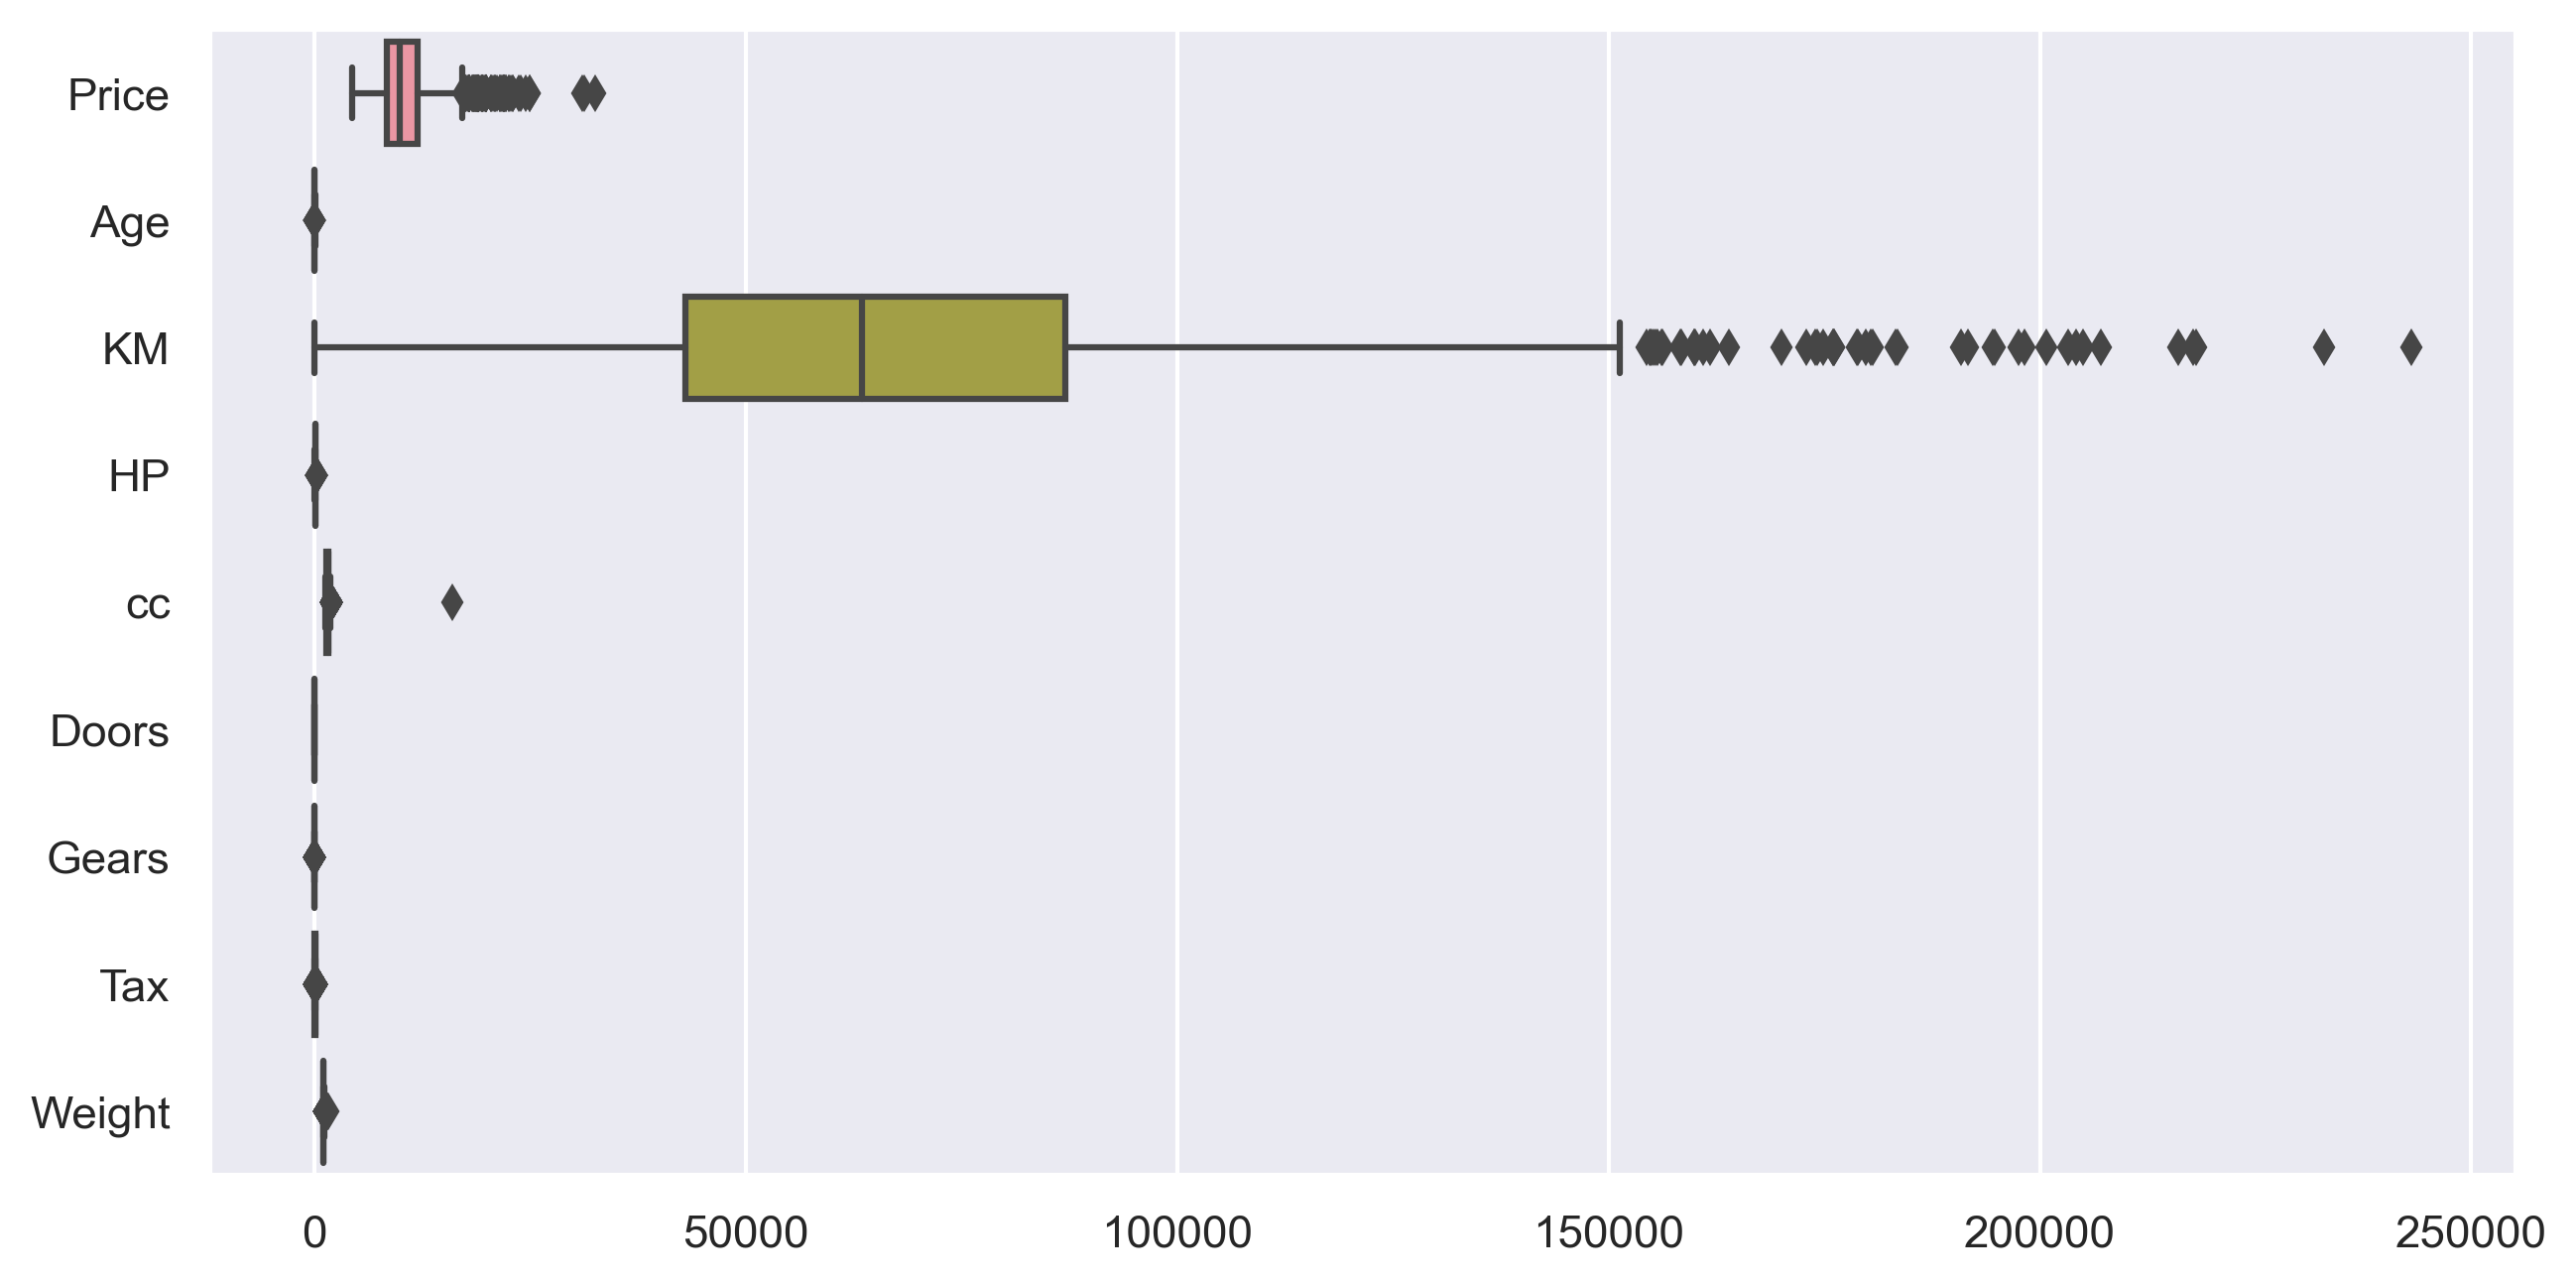

In [19]:
sns.boxplot(df,orient='h')#outliers are present in all the columns

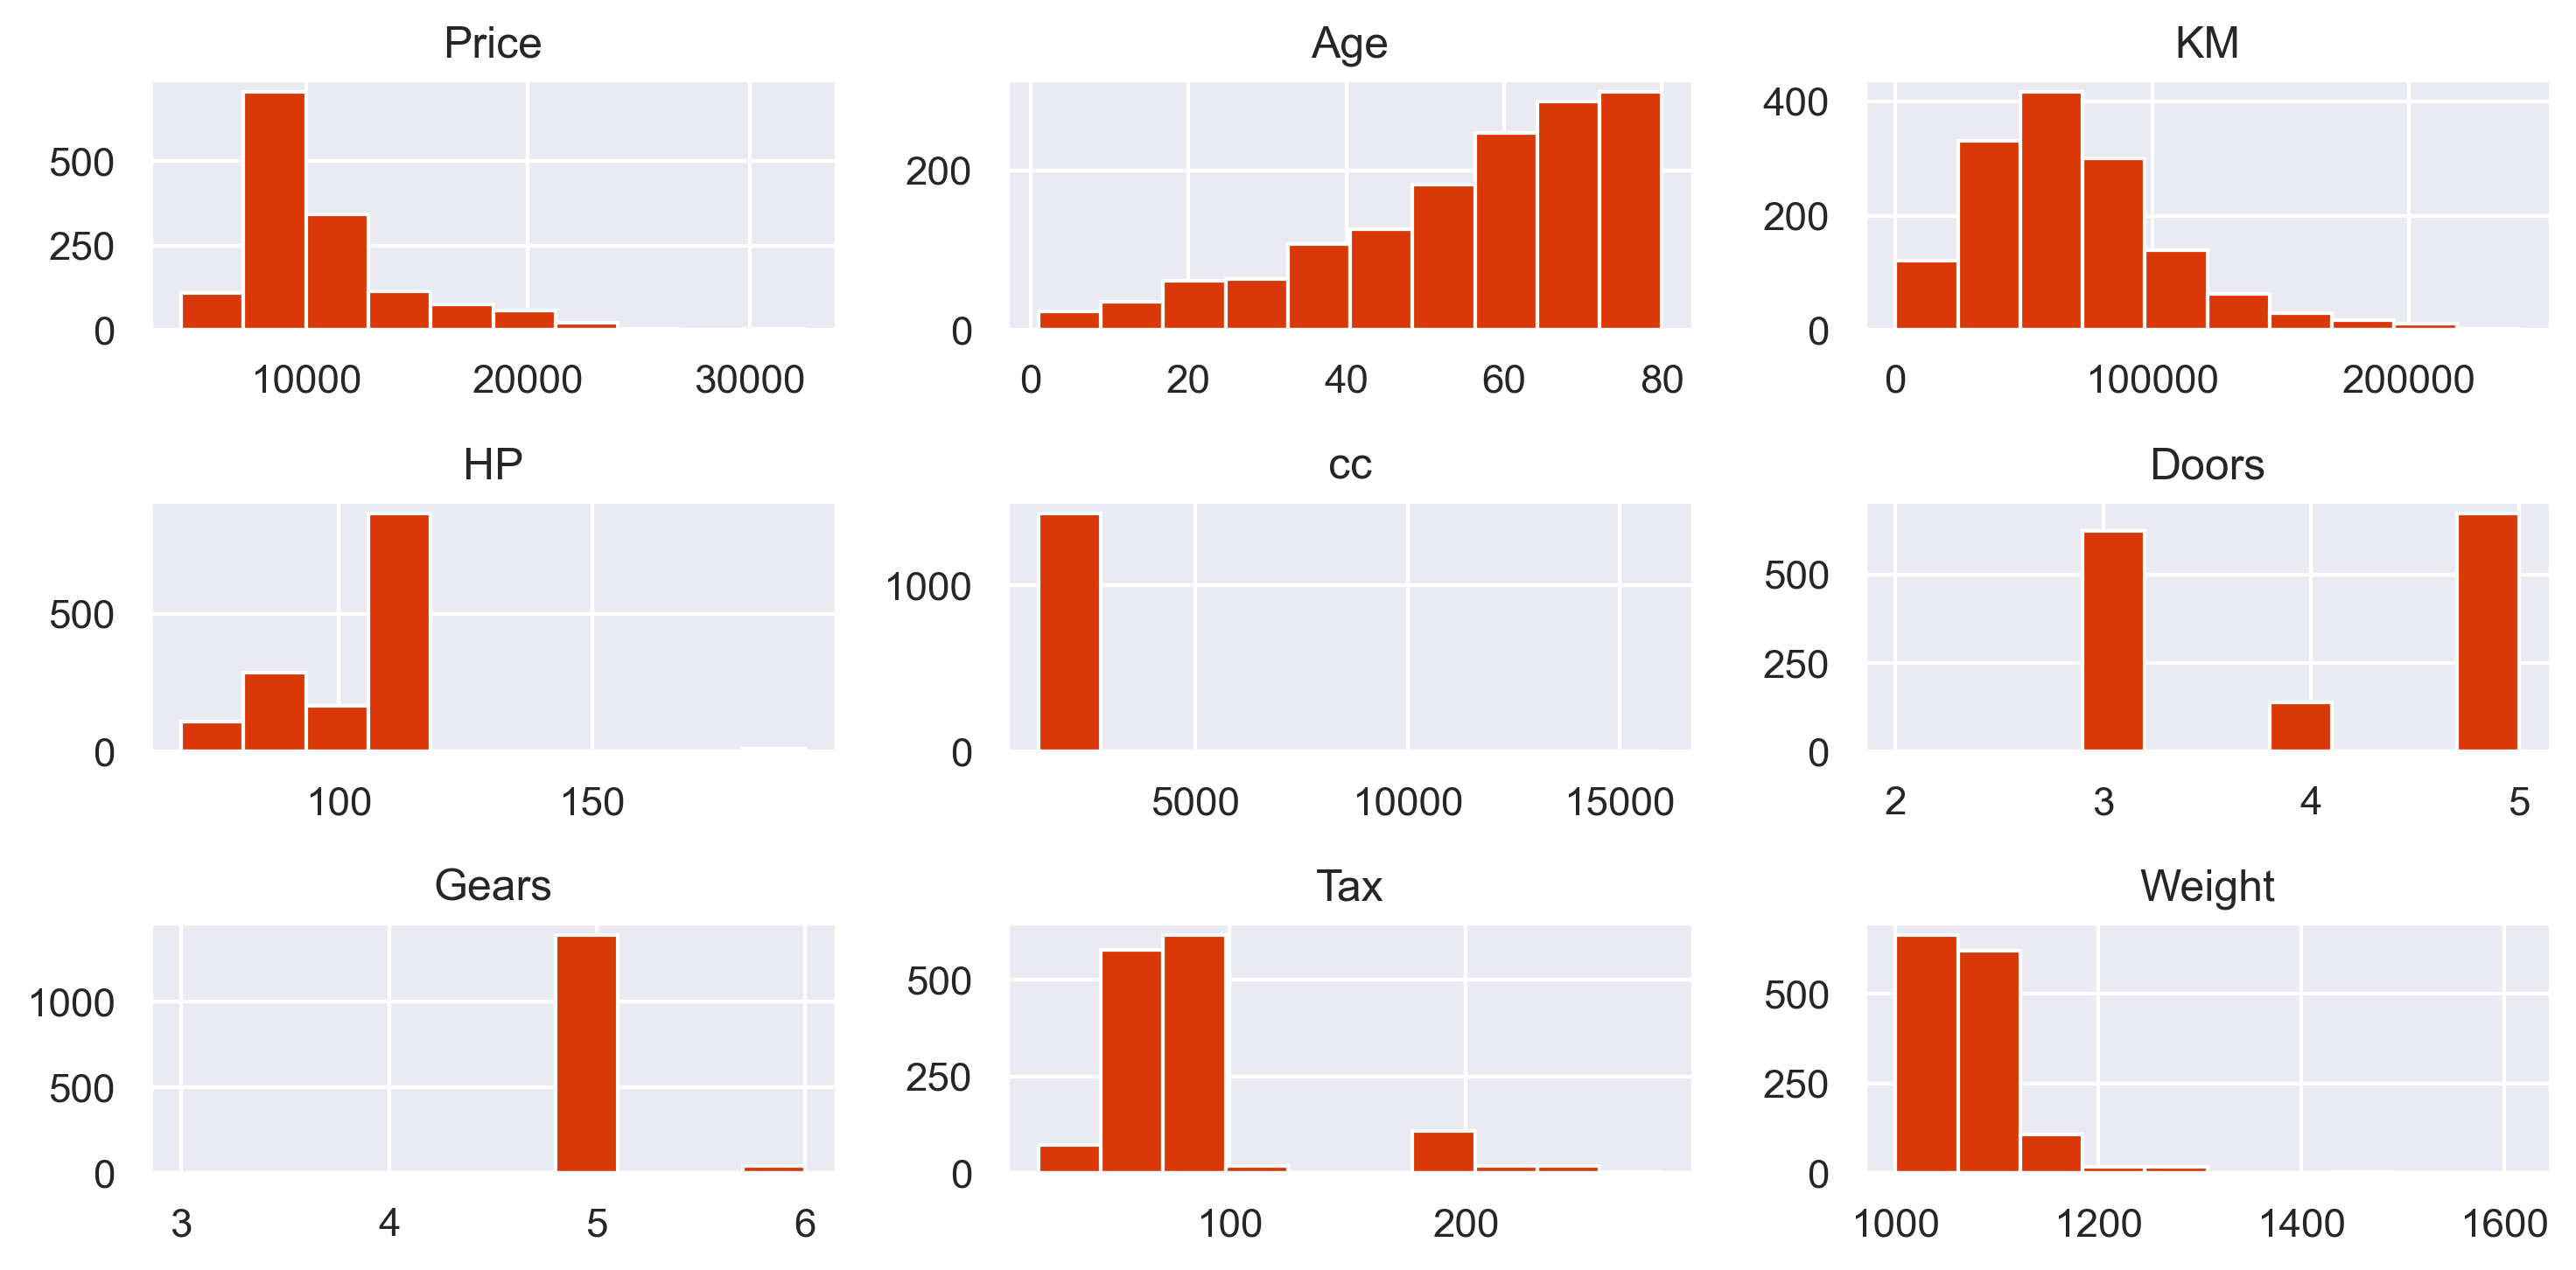

In [20]:
df.hist()
plt.tight_layout()

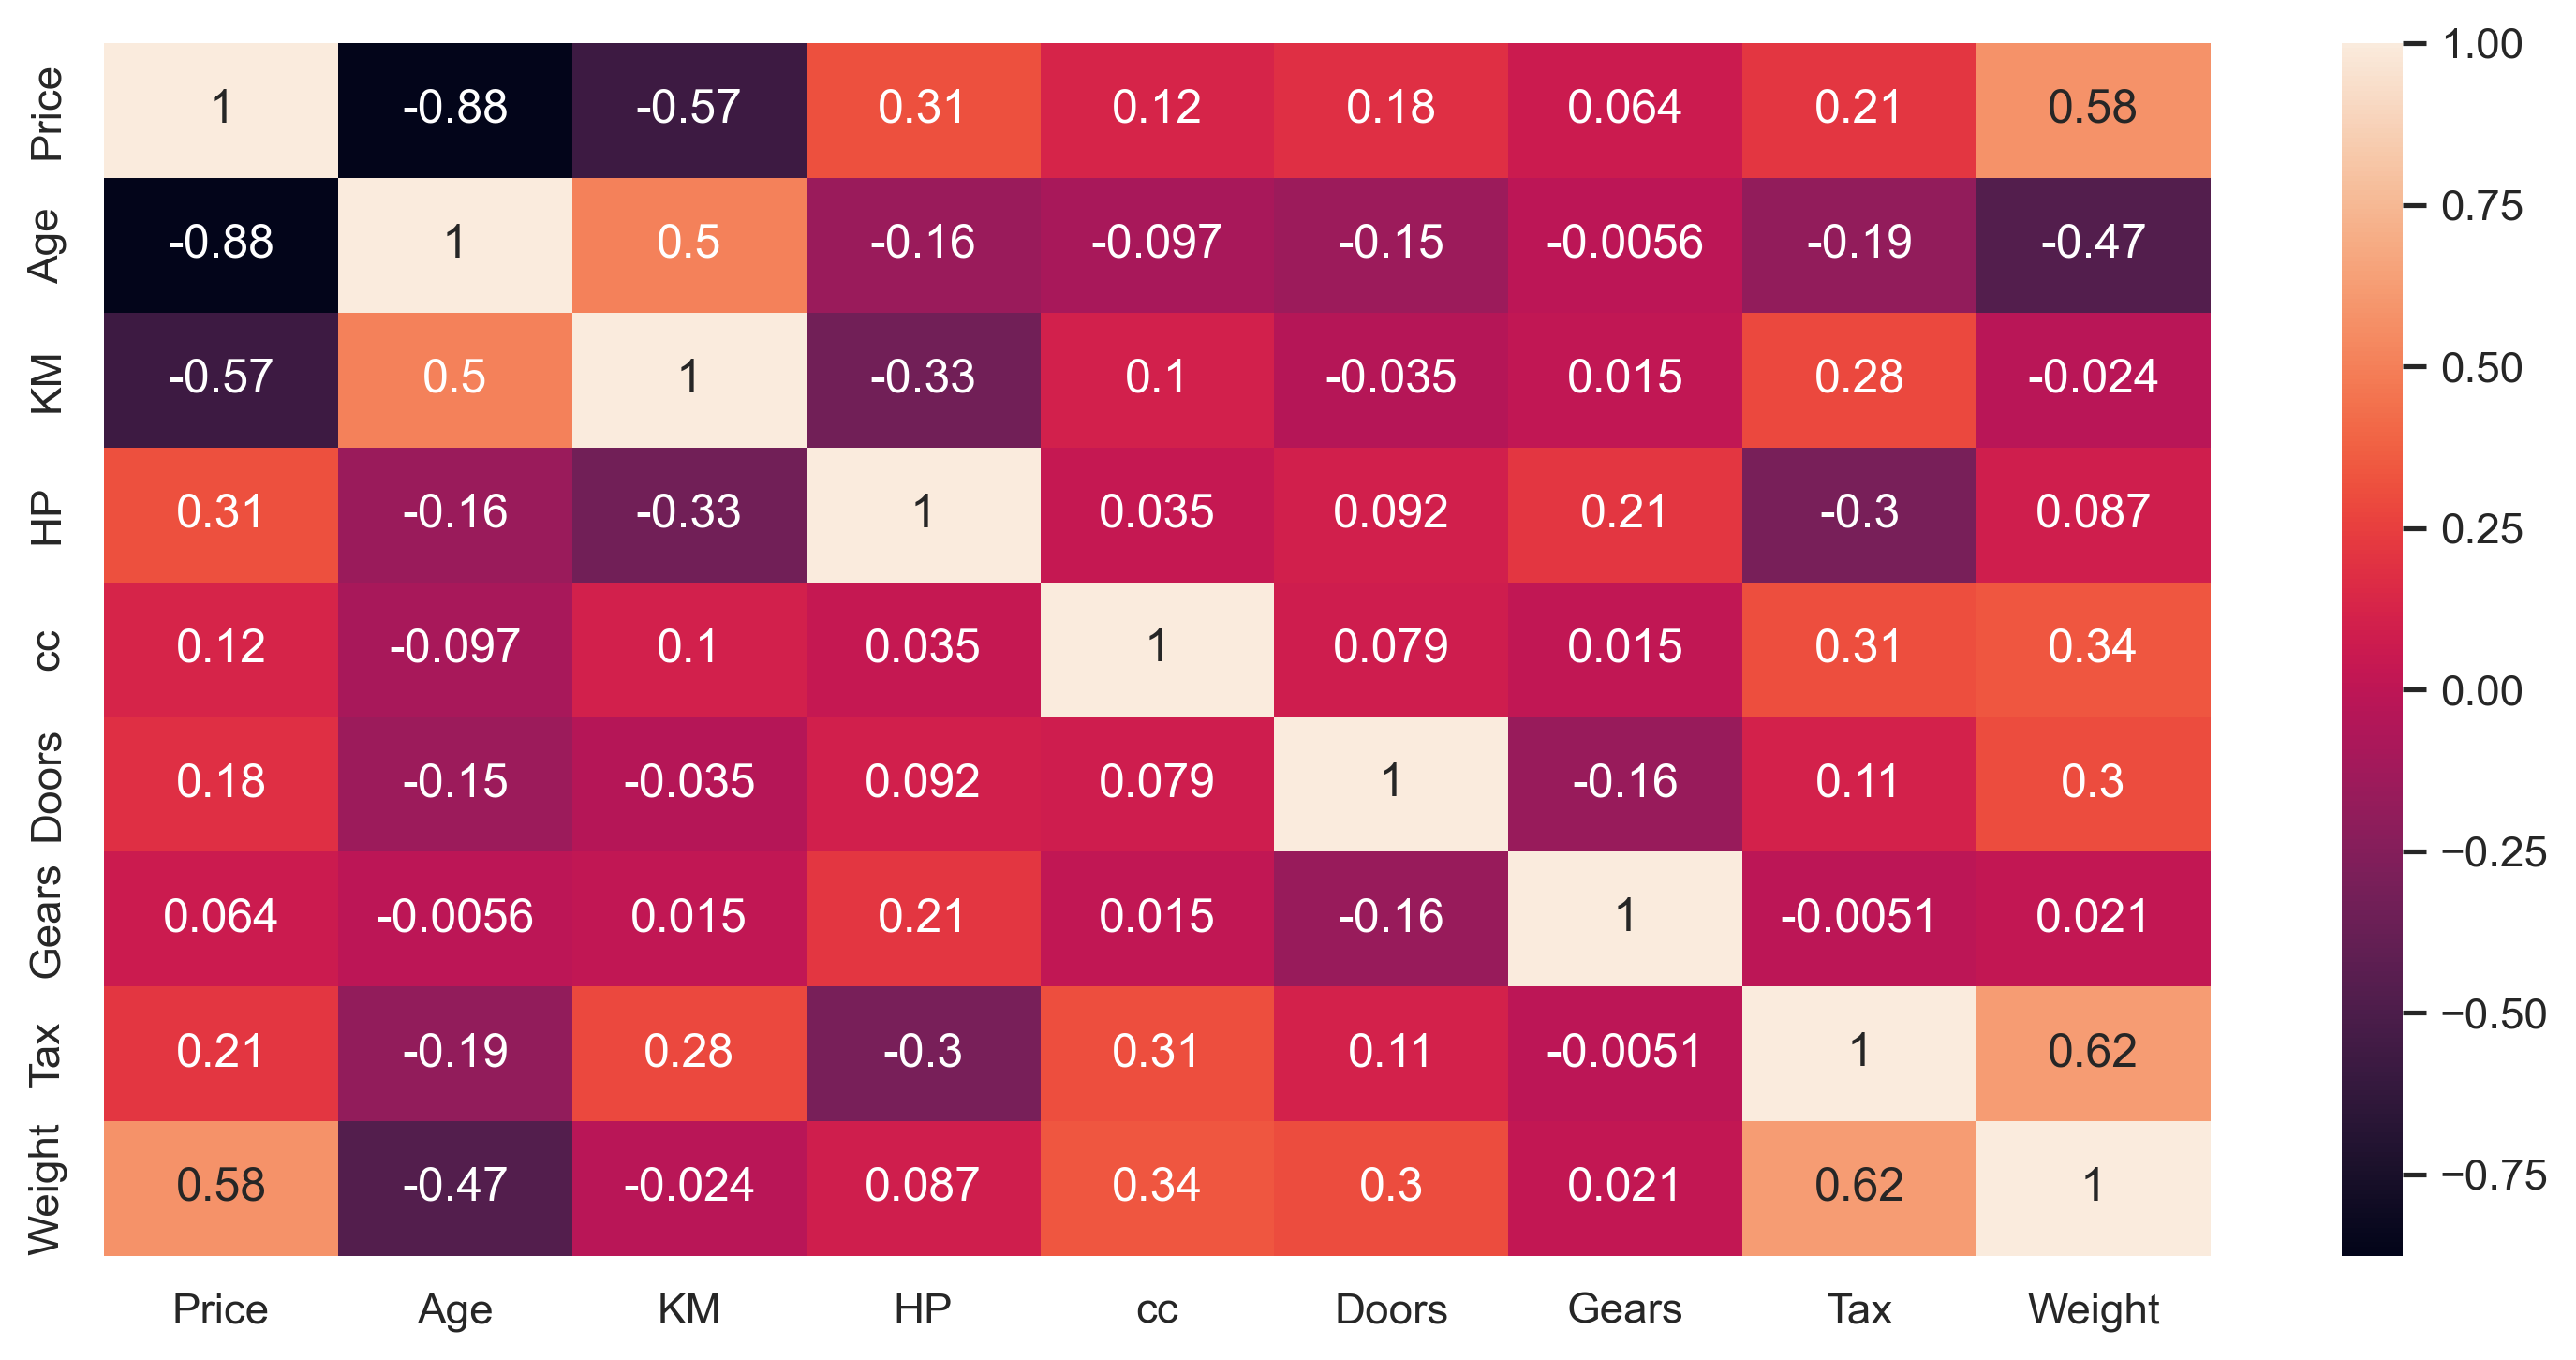

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

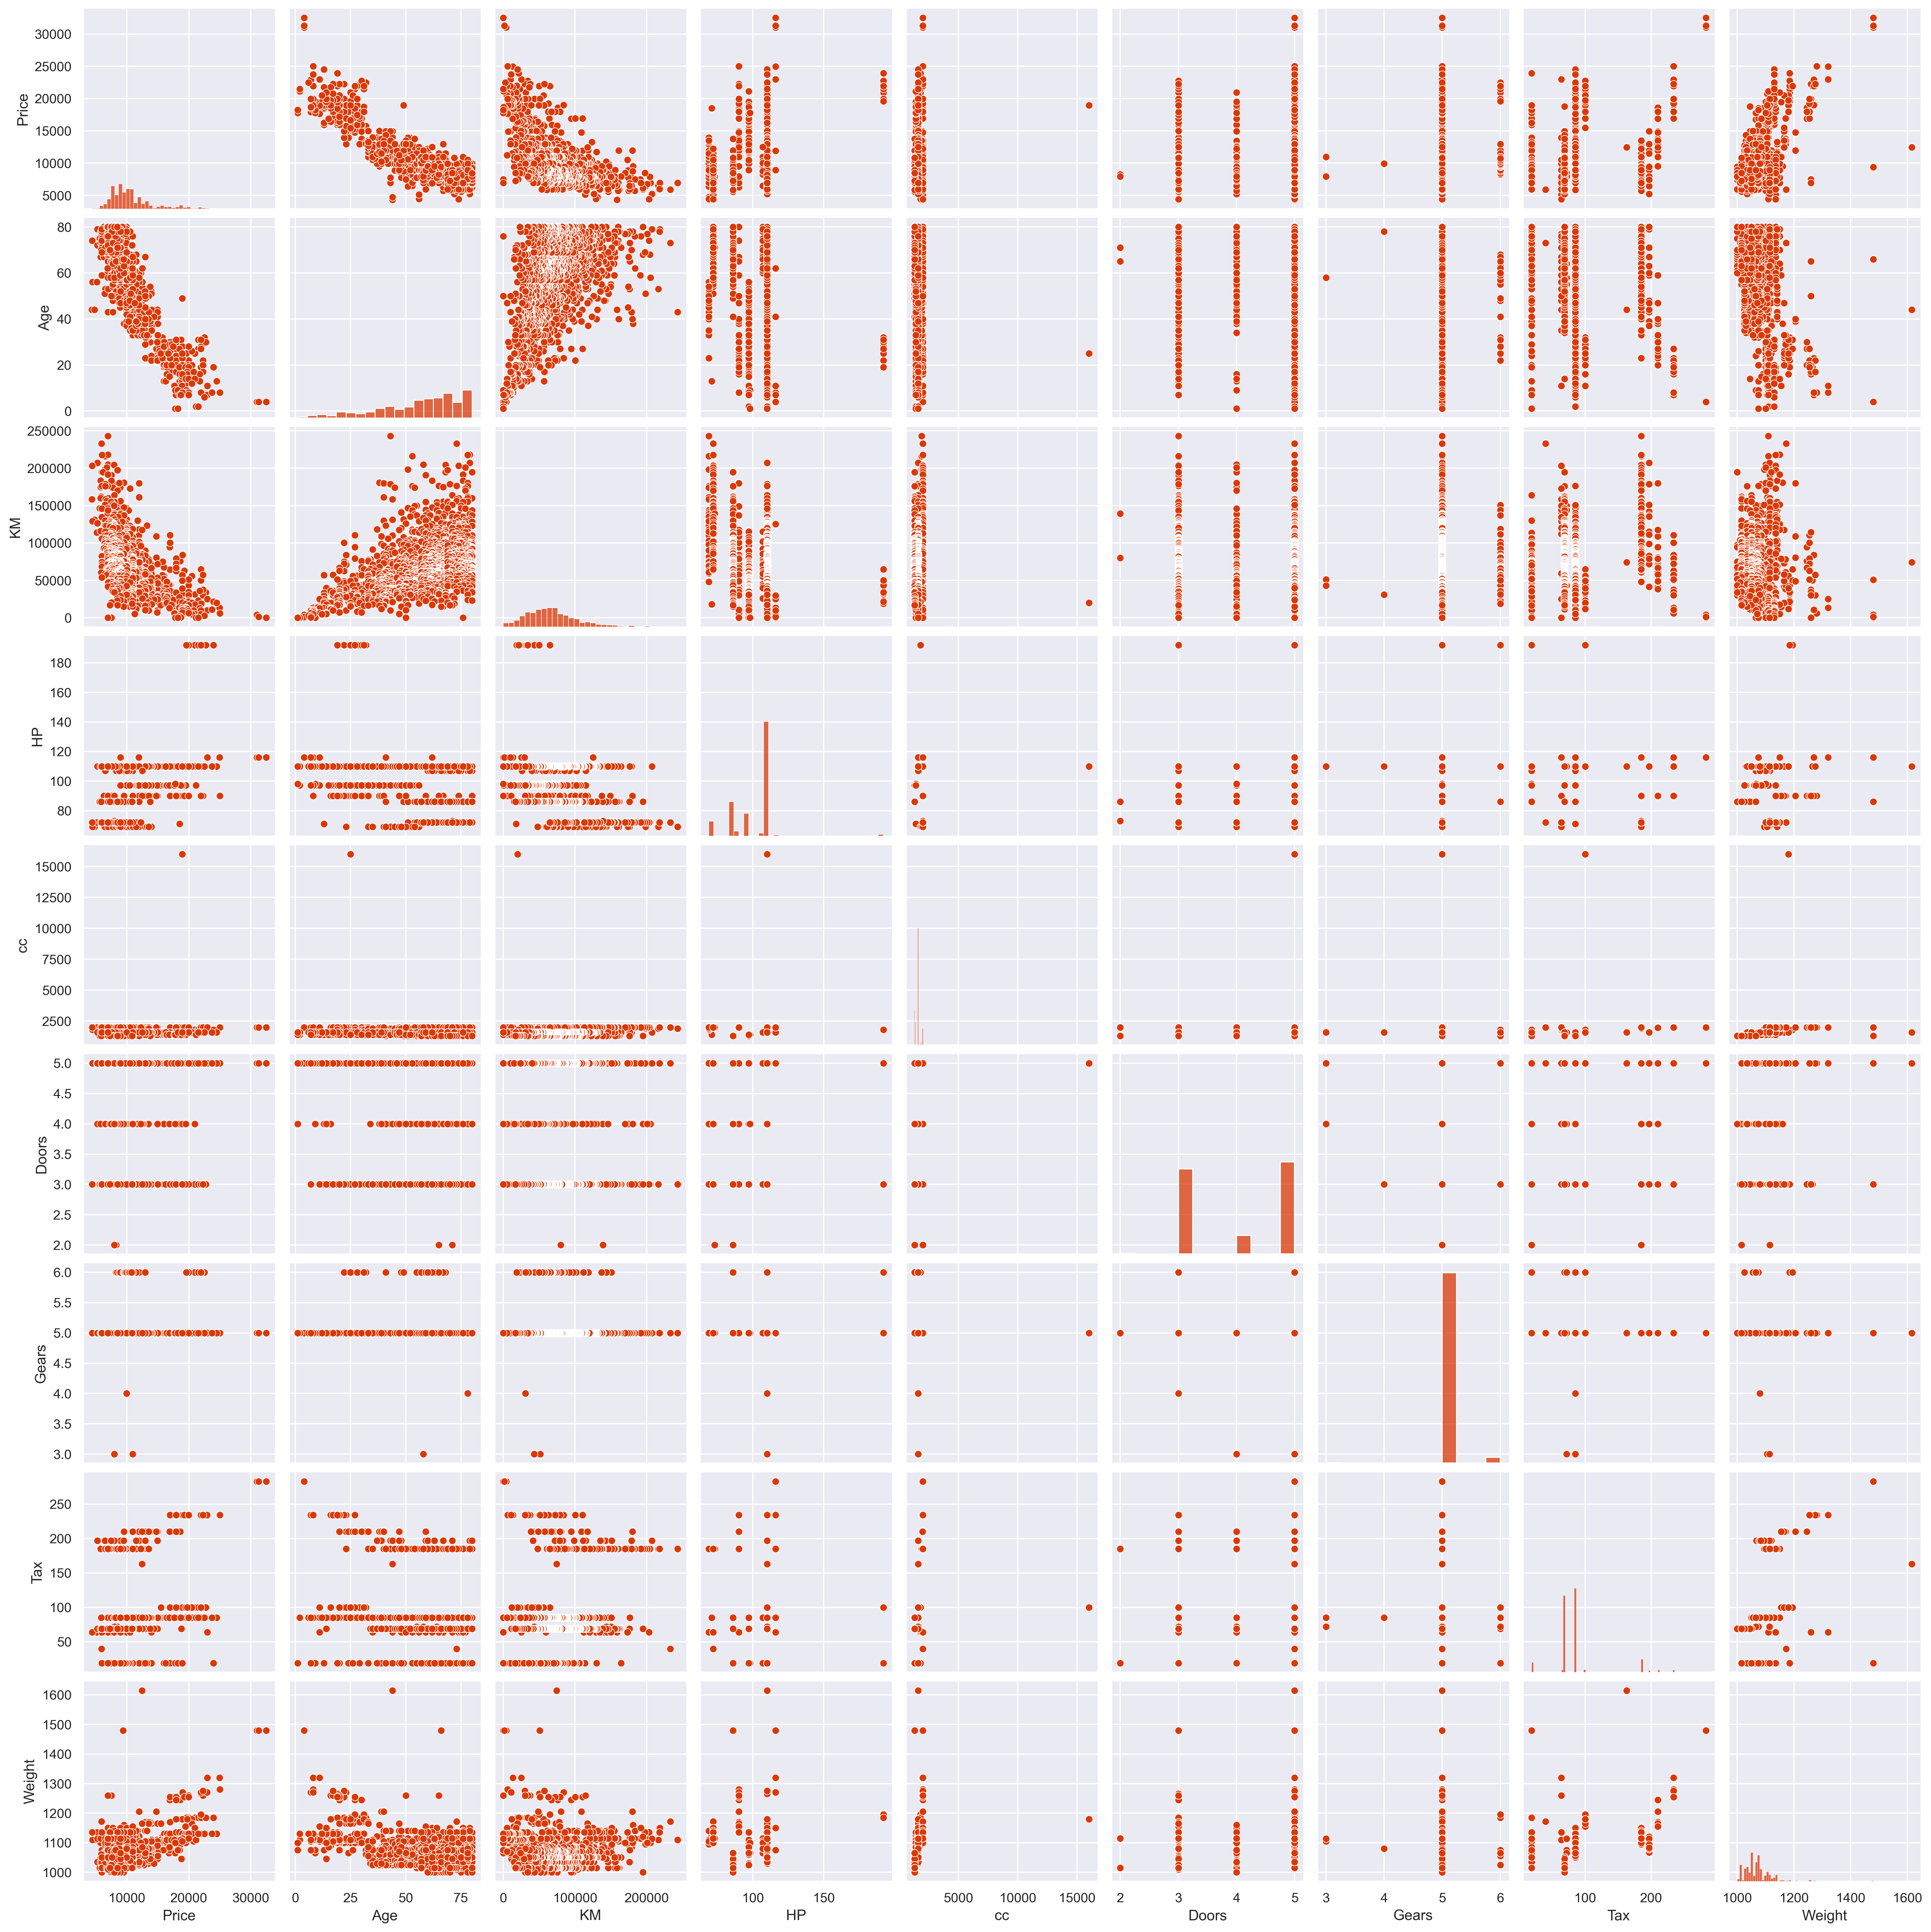

In [22]:
sns.pairplot(df)

# scaling the data

Standrdization(StandardScaler)
  - Uses z scores for scaling
  - scale values in such a way that the mean=0 and sd=1  

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

In [25]:
sc.fit_transform(df)

array([[ 0.77036821, -1.77726827, -0.57595832, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.83966875, -1.77726827,  0.11647404, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.89510918, -1.72337979, -0.71670745, ..., -0.14047507,
         3.00351318,  1.77496405],
       ...,
       [-0.61564265,  0.80937864, -1.37562683, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-0.96214536,  0.75549016, -1.37829506, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-1.04530601,  1.07882103, -1.82962616, ..., -0.14047507,
        -1.66124526,  0.7985824 ]])

In [26]:
df_scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [27]:
df_scaled

Price       Age        KM        HP        cc     Doors     Gears  \
0     0.770368 -1.777268 -0.575958 -0.767351  0.998113 -1.084443 -0.140475   
1     0.839669 -1.777268  0.116474 -0.767351  0.998113 -1.084443 -0.140475   
2     0.895109 -1.723380 -0.716707 -0.767351  0.998113 -1.084443 -0.140475   
3     1.172311 -1.615603 -0.548902 -0.767351  0.998113 -1.084443 -0.140475   
4     0.839669 -1.400049 -0.802384 -0.767351  0.998113 -1.084443 -0.140475   
...        ...       ...       ...       ...       ...       ...       ...   
1430 -0.892845  0.701602 -1.281492 -1.034441 -0.651898 -1.084443 -0.140475   
1431  0.034396  0.863267 -1.322689 -1.034441 -0.651898 -1.084443 -0.140475   
1432 -0.615643  0.809379 -1.375627 -1.034441 -0.651898 -1.084443 -0.140475   
1433 -0.962145  0.755490 -1.378295 -1.034441 -0.651898 -1.084443 -0.140475   
1434 -1.045306  1.078821 -1.829626  0.568103  0.055249  1.015659 -0.140475   

           Tax    Weight  
0     3.003513  1.774964  
1     3.003513  1.774964  
2     3.003513  1.774964  
3     3.003513  1.774964  
4     3.003513  1.870688  
...        ...       ...  
1430 -0.440104 -0.905299  
1431 -0.440104 -1.096747  
1432 -0.440104 -1.096747  
1433 -0.440104 -1.096747  
1434 -1.661245  0.798582  

[1435 rows x 9 columns]

<Axes: >

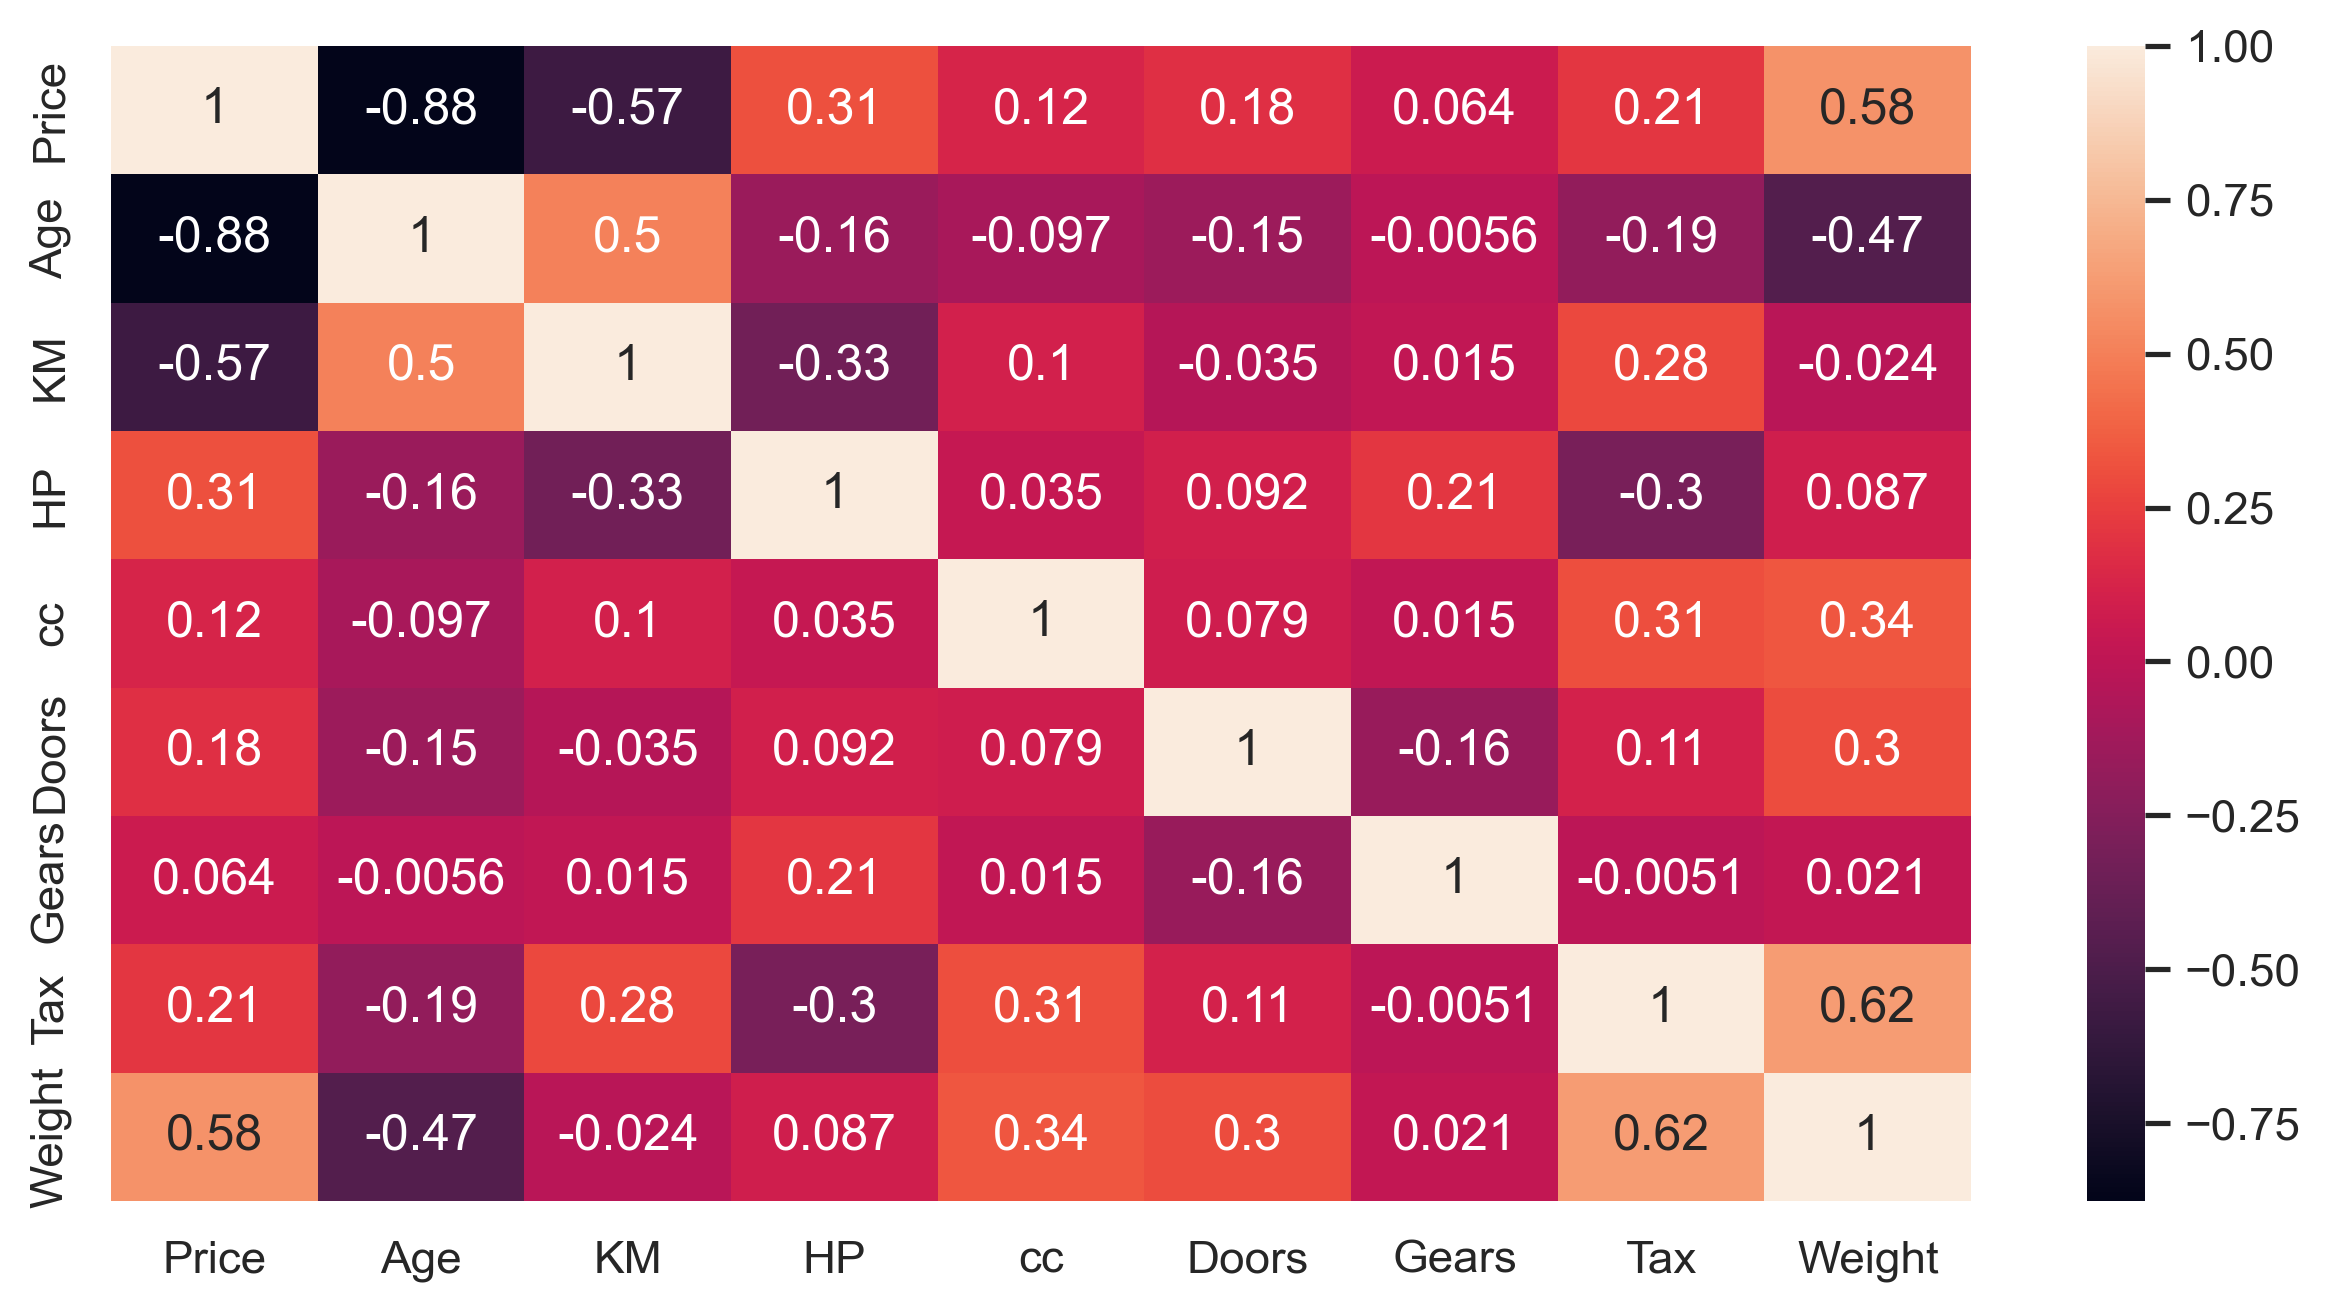

In [28]:
sns.heatmap(df_scaled.corr(),annot=True)

<Axes: >

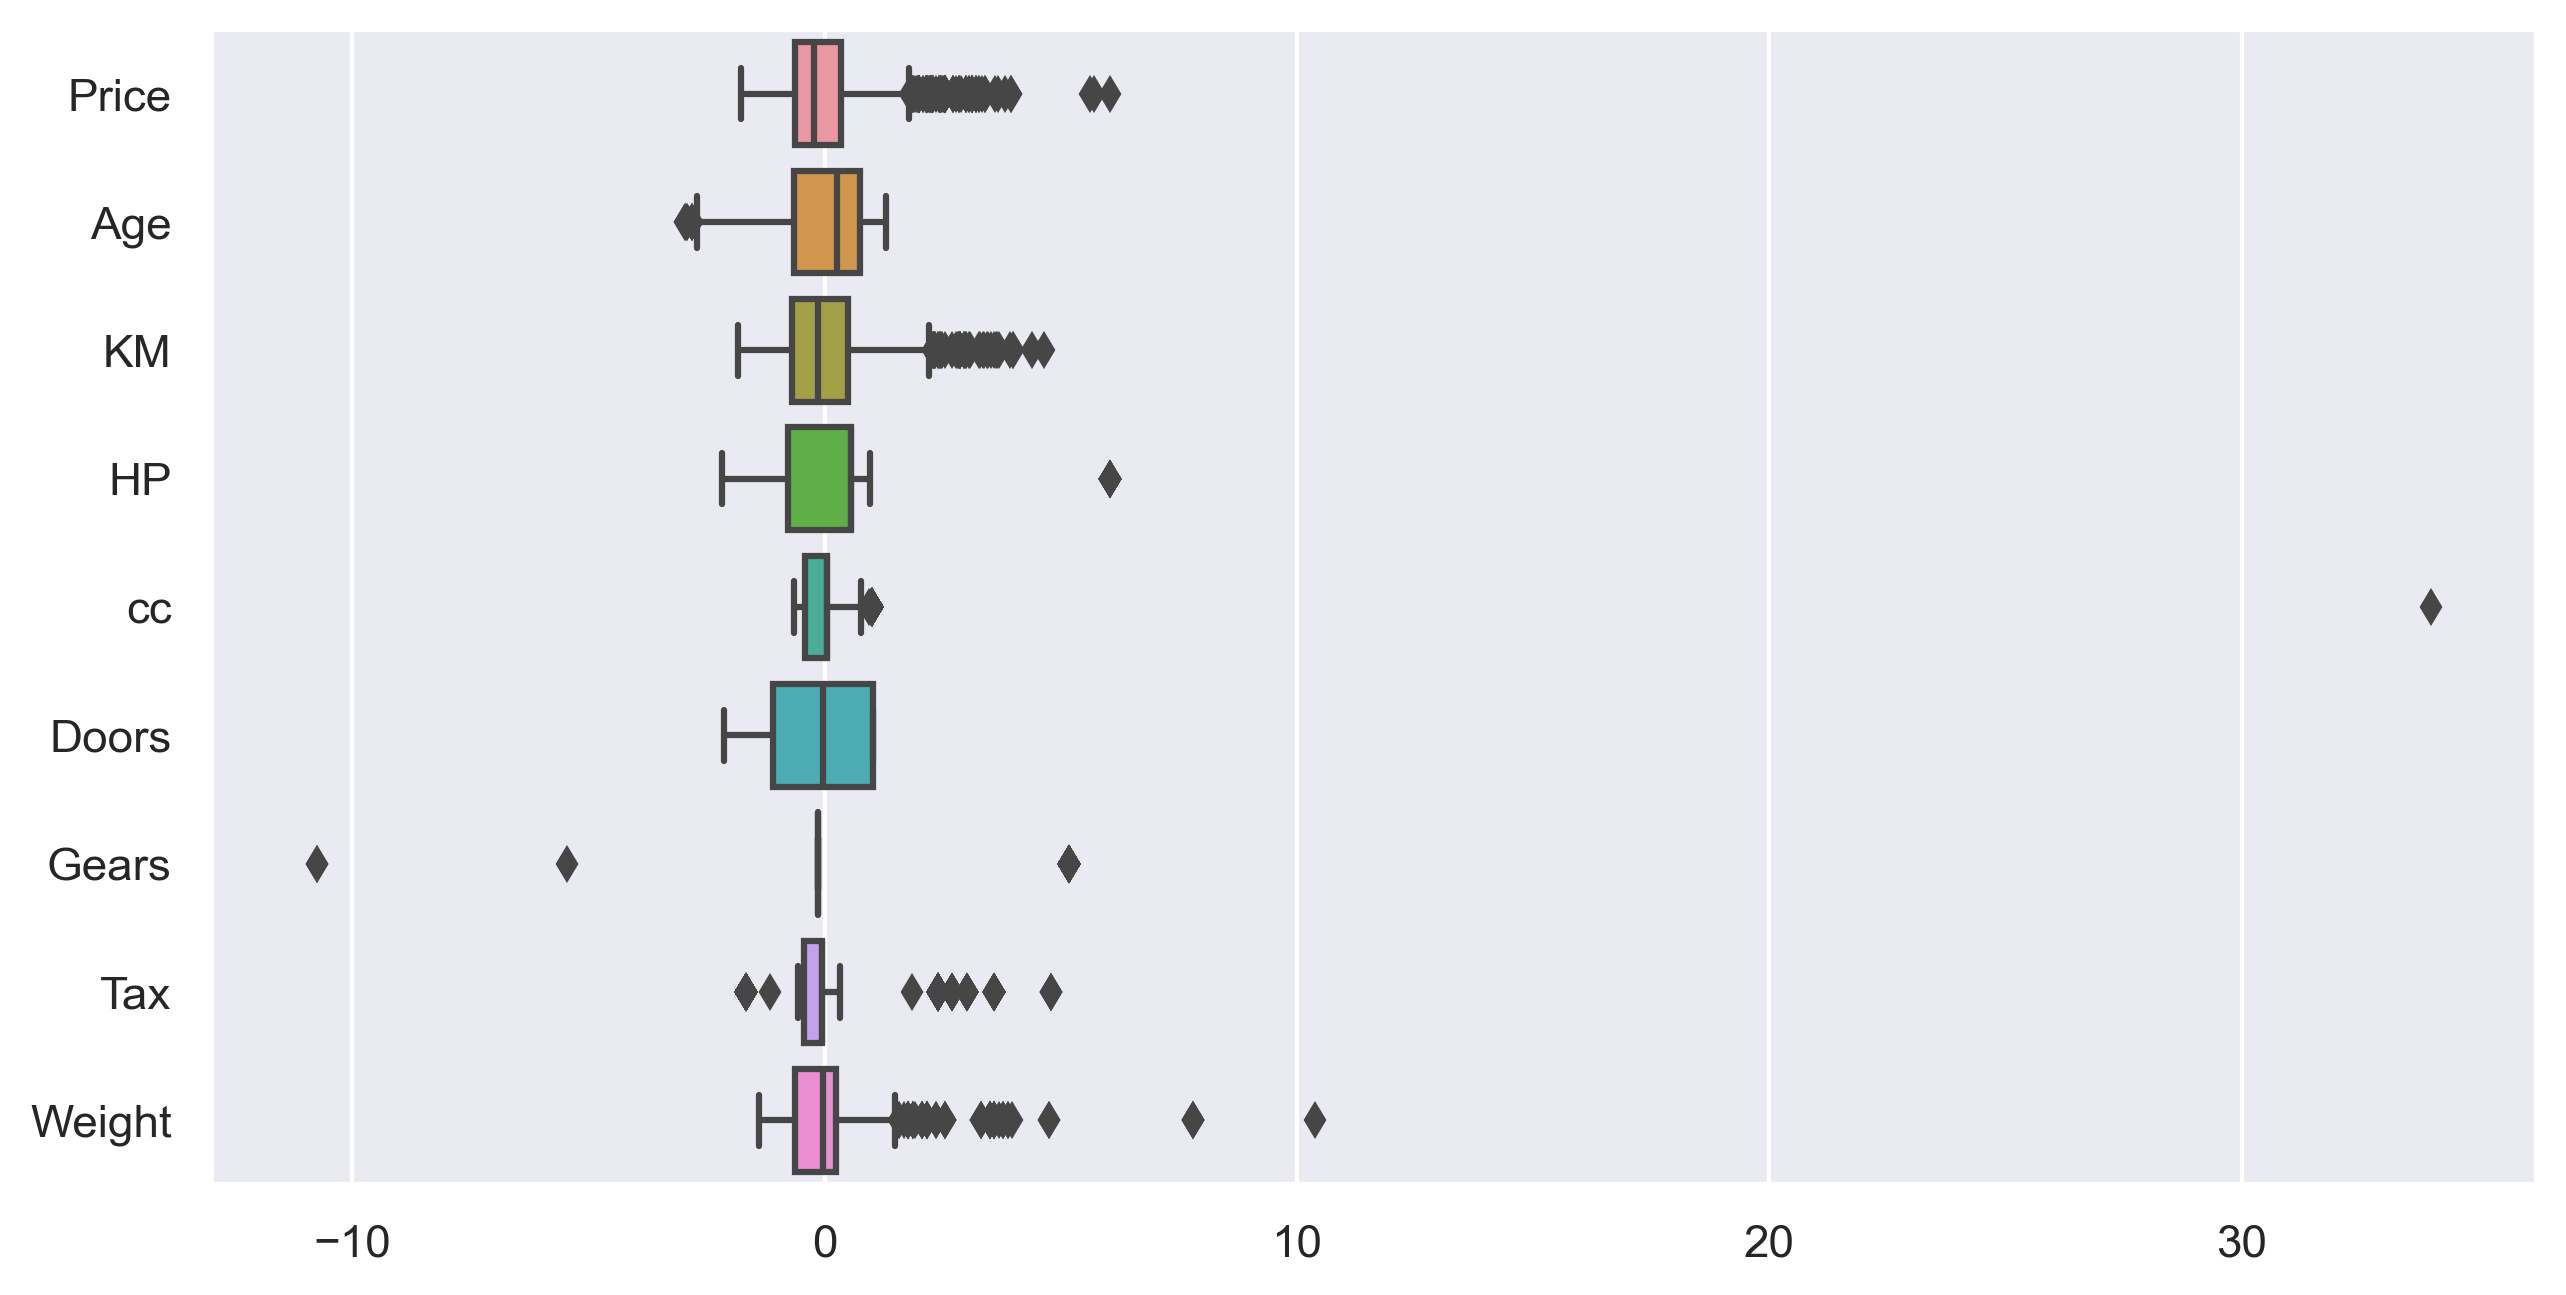

In [29]:
sns.boxplot(df_scaled,orient='h')

# now lets build a MLR model based on this raw scaled data 

In [30]:
df_scaled.head()

Price       Age        KM        HP        cc     Doors     Gears  \
0  0.770368 -1.777268 -0.575958 -0.767351  0.998113 -1.084443 -0.140475   
1  0.839669 -1.777268  0.116474 -0.767351  0.998113 -1.084443 -0.140475   
2  0.895109 -1.723380 -0.716707 -0.767351  0.998113 -1.084443 -0.140475   
3  1.172311 -1.615603 -0.548902 -0.767351  0.998113 -1.084443 -0.140475   
4  0.839669 -1.400049 -0.802384 -0.767351  0.998113 -1.084443 -0.140475   

        Tax    Weight  
0  3.003513  1.774964  
1  3.003513  1.774964  
2  3.003513  1.774964  
3  3.003513  1.774964  
4  3.003513  1.870688

In [31]:
model_raw=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=df_scaled).fit()

In [32]:
model_raw.rsquared

0.8625200256946999

In [33]:
model_raw.pvalues.round(2)

Intercept    1.00
Age          0.00
KM           0.00
HP           0.00
cc           0.19
Doors        0.98
Gears        0.00
Tax          0.00
Weight       0.00
dtype: float64

#observation:
-'cc','Doors'columns pvalue > alpha value(0.05)
- lets build two diffrent models
  1.model_raw with Doors removed-->model_cc 
  2.model_raw with cc removed-->model_Doors  
    

In [34]:
model_cc=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df_scaled).fit()
model_Doors=smf.ols('Price~Age+KM+HP+Doors+Gears+Tax+Weight',data=df_scaled).fit()

In [35]:
model_cc.rsquared,model_Doors.rsquared

(0.8625199746430148, 0.8623529476715985)

In [36]:
model_cc.pvalues.round(2),model_Doors.pvalues.round(2)

(Intercept    1.00
 Age          0.00
 KM           0.00
 HP           0.00
 cc           0.19
 Gears        0.00
 Tax          0.00
 Weight       0.00
 dtype: float64,
 Intercept    1.00
 Age          0.00
 KM           0.00
 HP           0.00
 Doors        1.00
 Gears        0.00
 Tax          0.01
 Weight       0.00
 dtype: float64)

# observation:
- pvalues remained with both models
- lets build a model without the two columns(cc,Doors)

In [37]:
model_without_cc_and_Doors=smf.ols('Price~Age+KM+HP+Gears+Tax+Weight',data=df_scaled).fit()

In [38]:
model_without_cc_and_Doors.rsquared.round(2),model_raw.rsquared.round(2)

(0.86, 0.86)

In [39]:
[model_without_cc_and_Doors.pvalues.round(2),model_raw.pvalues.round(2)]

[Intercept    1.0
 Age          0.0
 KM           0.0
 HP           0.0
 Gears        0.0
 Tax          0.0
 Weight       0.0
 dtype: float64,
 Intercept    1.00
 Age          0.00
 KM           0.00
 HP           0.00
 cc           0.19
 Doors        0.98
 Gears        0.00
 Tax          0.00
 Weight       0.00
 dtype: float64]

#now lets build a models with df
- buy replacing outlier with mean in 'Price' column which is our dependent column-->model_mean_replaced
- buy replacing outlier with median in 'Price' column which is our dependent column-->model_median
- buy replacing outlier with capping in 'Price' column which is our dependent column-->model_cap
- buy removing outliers in 'Price' column-->model_outliers removed

In [40]:
#Outlier function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1
    
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    
    return print("lower:",lower,"upper:",upper)

In [41]:
outlier_detection(df,'Price')

lower: 3200.0 upper: 17200.0


In [42]:
df[(df['Price']>17200.0) | (df['Price']<3200.0)]

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
7    18600   30  75889   90  2000      3      5  210    1245
8    21500   27  19700  192  1800      3      5  100    1185
10   20950   25  31461  192  1800      3      6  100    1185
11   19950   22  43610  192  1800      3      6  100    1185
12   19600   25  32189  192  1800      3      6  100    1185
..     ...  ...    ...  ...   ...    ...    ...  ...     ...
182  21125    2    225   97  1400      5      5   85    1110
183  21500    2     15  110  1600      5      5   85    1130
184  17795    1      1   98  1400      4      5   19    1100
185  18245    1      1  110  1600      5      5   19    1075
523  18950   49  49568  110  1600      3      5   19    1105

[109 rows x 9 columns]

In [43]:
df_mean_replaced=df.copy()
df_mean_replaced.loc[(df['Price']>17200.0) | (df['Price']<3200.00),'Price']=df_mean_replaced['Price'].mean()

In [44]:
df_mean_replaced

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
0     13500.0   23  46986   90  2000      3      5  210    1165
1     13750.0   23  72937   90  2000      3      5  210    1165
2     13950.0   24  41711   90  2000      3      5  210    1165
3     14950.0   26  48000   90  2000      3      5  210    1165
4     13750.0   30  38500   90  2000      3      5  210    1170
...       ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500.0   69  20544   86  1300      3      5   69    1025
1432  10845.0   72  19000   86  1300      3      5   69    1015
1433   8500.0   71  17016   86  1300      3      5   69    1015
1434   7250.0   70  16916   86  1300      3      5   69    1015
1435   6950.0   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [45]:
outlier_detection(df_mean_replaced,'Price')

lower: 4700.0 upper: 14700.0


In [46]:
df_mean_replaced[(df_mean_replaced['Price']>14700.0) | (df_mean_replaced['Price']<4700.0)]

Price  Age      KM   HP    cc  Doors  Gears  Tax  Weight
3     14950.0   26   48000   90  2000      3      5  210    1165
6     16900.0   27   94612   90  2000      3      5  210    1245
18    16750.0   24   25563  110  1600      3      5   19    1065
19    16950.0   30   64359  110  1600      3      5   85    1105
20    15950.0   30   67660  110  1600      3      5   85    1105
...       ...  ...     ...  ...   ...    ...    ...  ...     ...
345   14950.0   41   28571  110  1600      5      5   85    1090
354   14950.0   43   25228  110  1600      3      5   69    1045
357   14990.0   33   24650  110  1600      3      5   85    1055
393    4450.0   56  129155   69  1800      5      5   64    1110
1048   4400.0   74  203254   72  2000      3      5   64    1135

[79 rows x 9 columns]

<Axes: >

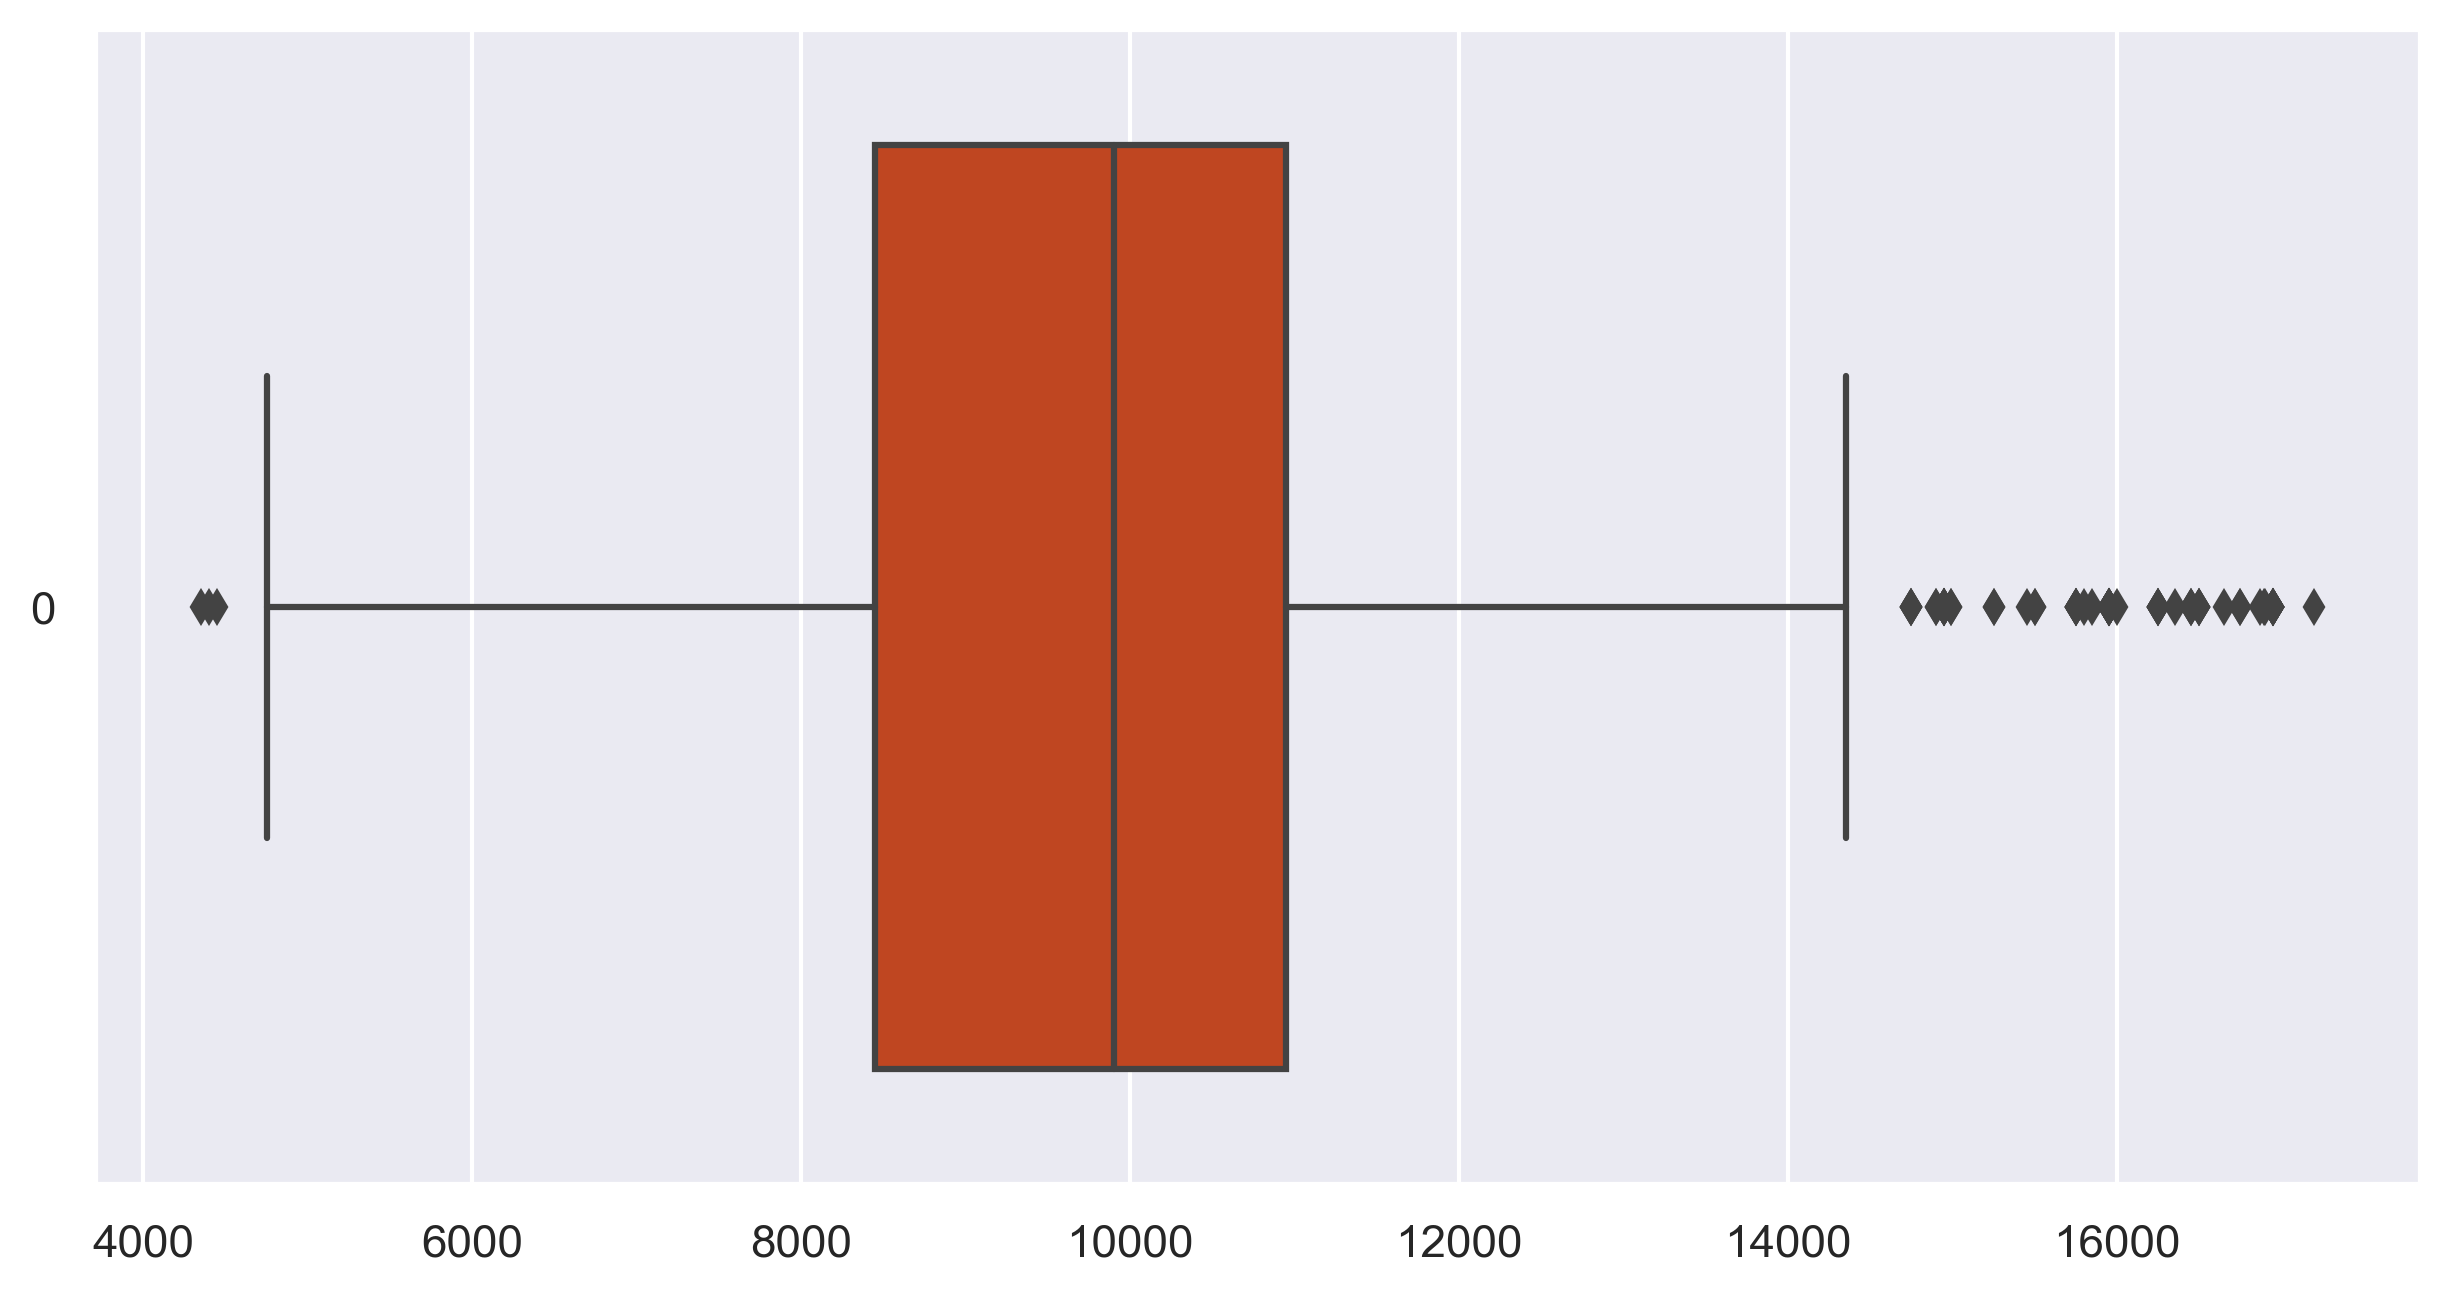

In [47]:
sns.boxplot(df_mean_replaced['Price'],orient='h')

#observation: replacing mean does not remove all outliers 
#lests try next model

In [48]:
df_median_replaced=df.copy()
df_median_replaced.loc[(df_median_replaced['Price']<3200.00) | (df_median_replaced['Price']>17200.0),'Price']=df_median_replaced['Price'].median()

In [49]:
df_median_replaced

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

<Axes: >

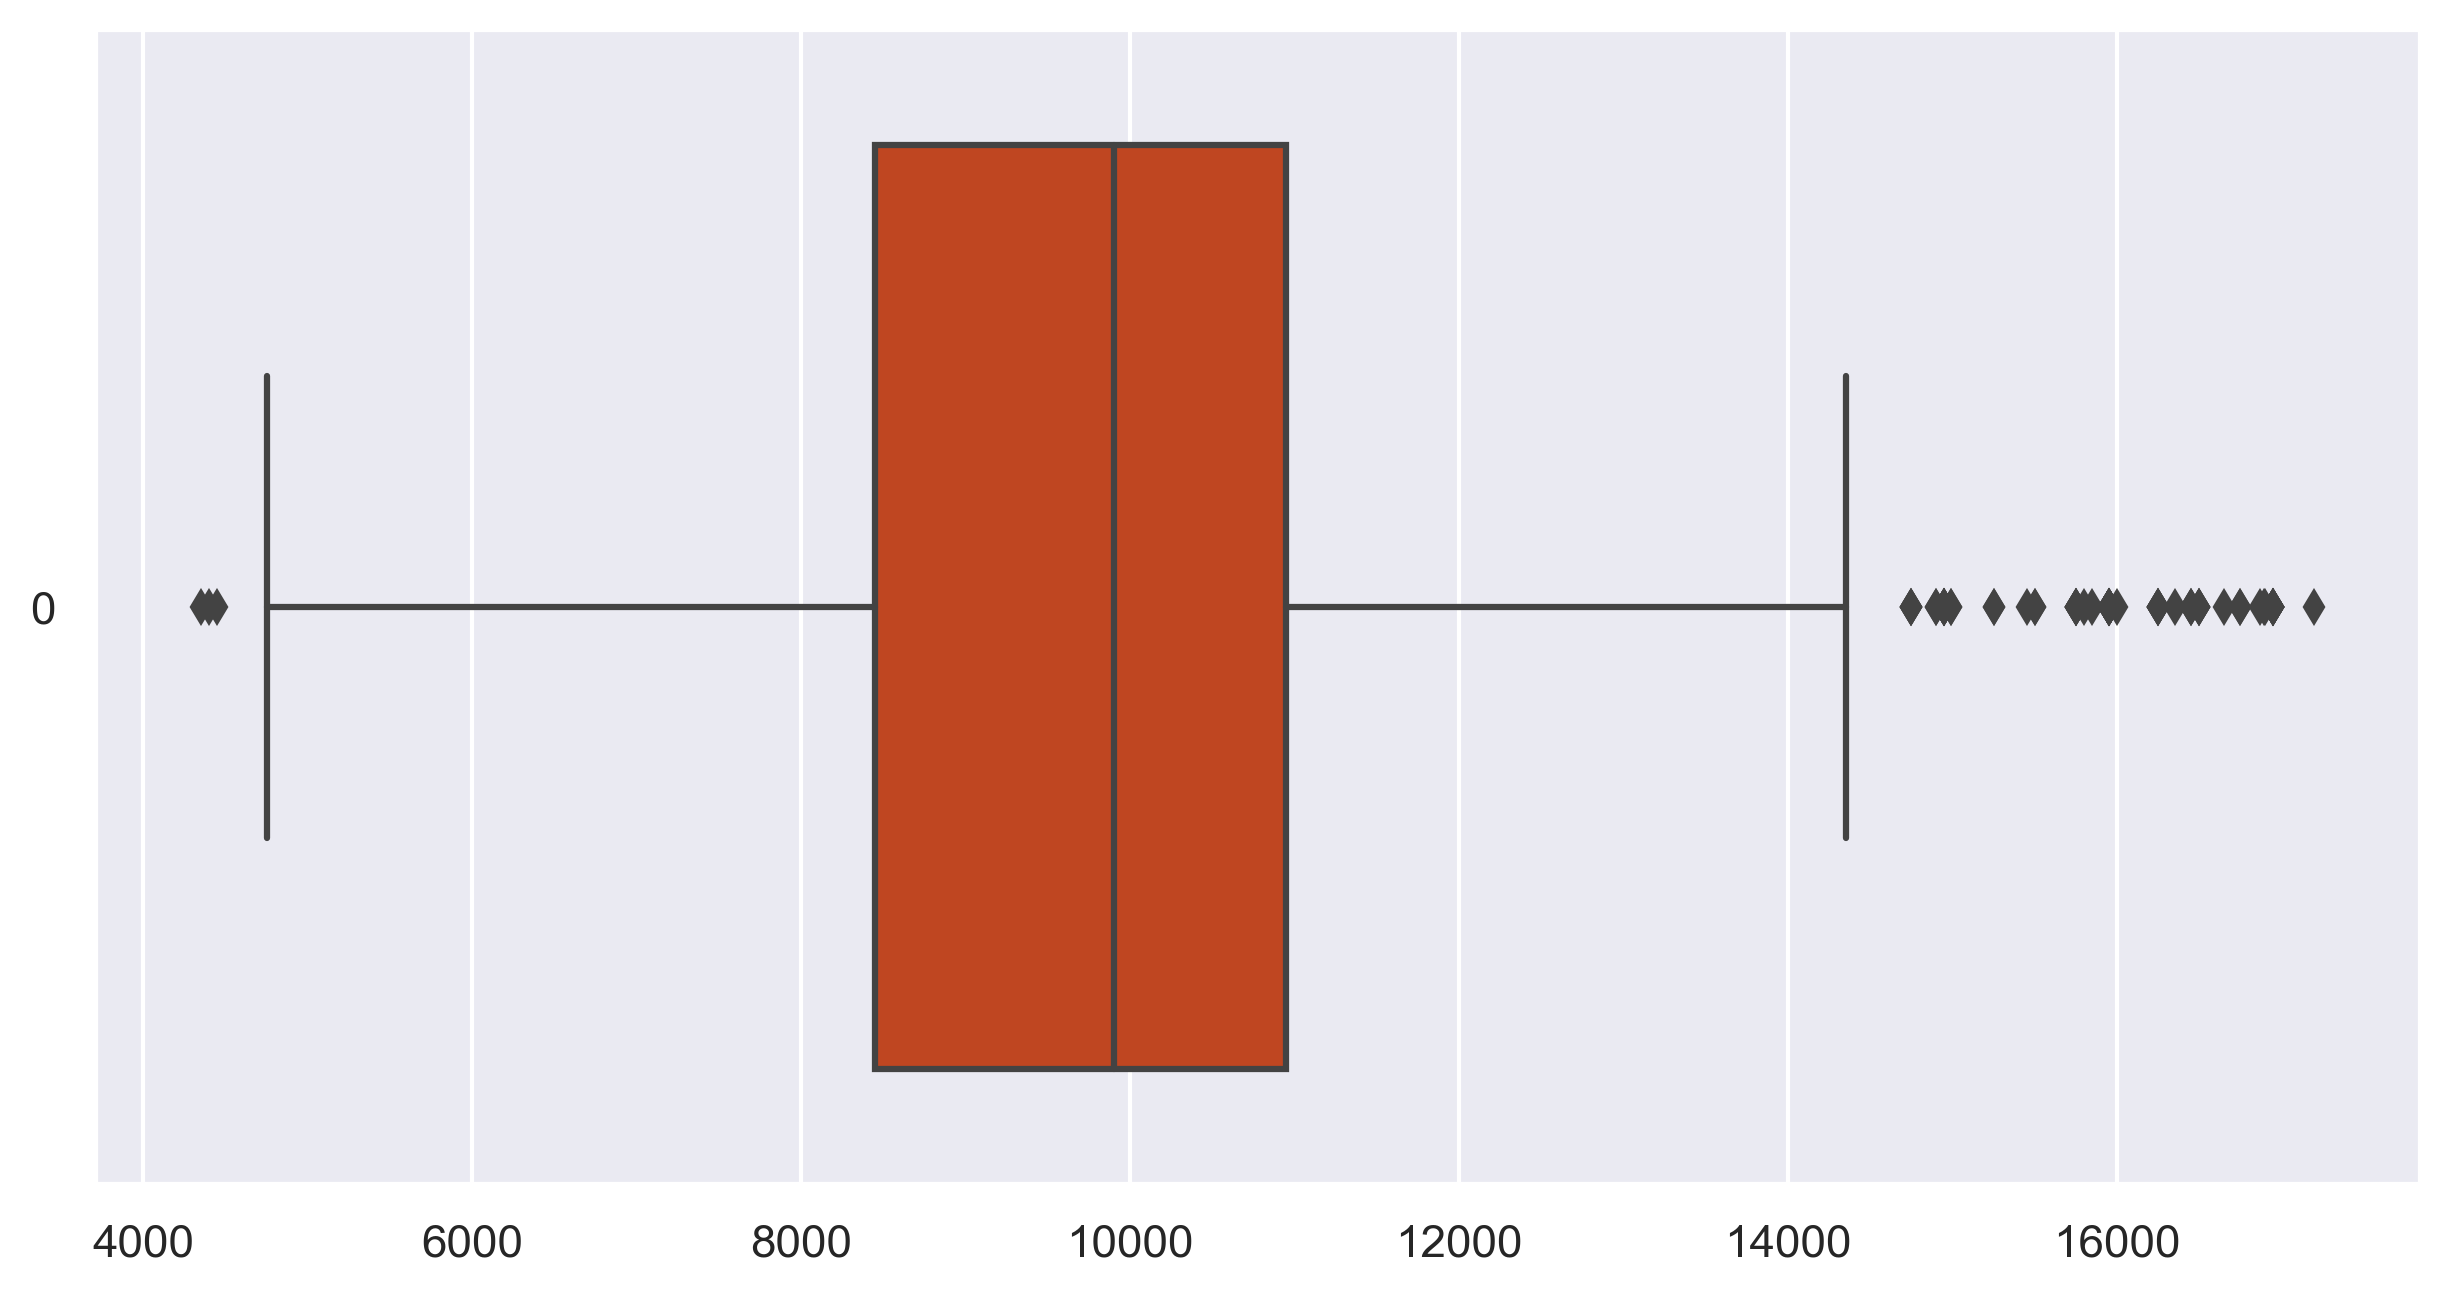

In [50]:
sns.boxplot(df_median_replaced['Price'],orient='h')

In [51]:
outlier_detection(df_median_replaced,'Price')

lower: 4700.0 upper: 14700.0


In [52]:
df_median_replaced[(df_median_replaced['Price']>14700.0) | (df_median_replaced['Price']<4700.0)]

Price  Age      KM   HP    cc  Doors  Gears  Tax  Weight
3     14950   26   48000   90  2000      3      5  210    1165
6     16900   27   94612   90  2000      3      5  210    1245
18    16750   24   25563  110  1600      3      5   19    1065
19    16950   30   64359  110  1600      3      5   85    1105
20    15950   30   67660  110  1600      3      5   85    1105
...     ...  ...     ...  ...   ...    ...    ...  ...     ...
345   14950   41   28571  110  1600      5      5   85    1090
354   14950   43   25228  110  1600      3      5   69    1045
357   14990   33   24650  110  1600      3      5   85    1055
393    4450   56  129155   69  1800      5      5   64    1110
1048   4400   74  203254   72  2000      3      5   64    1135

[79 rows x 9 columns]

In [53]:
df_median_replaced[df_median_replaced['Price']==df_median_replaced['Price'].median()]

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
7      9900   30  75889   90  2000      3      5  210    1245
8      9900   27  19700  192  1800      3      5  100    1185
10     9900   25  31461  192  1800      3      6  100    1185
11     9900   22  43610  192  1800      3      6  100    1185
12     9900   25  32189  192  1800      3      6  100    1185
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
976    9900   59  46929   86  1300      3      5   69    1025
998    9900   64  41200  110  1600      5      5   85    1070
1027   9900   57  31307  110  1600      5      5   85    1070
1182   9900   80  92255  107  1600      5      5   85    1105
1360   9900   73  59240  110  1600      3      5   69    1050

[128 rows x 9 columns]

In [54]:
#observation replacing outliers with median does not remove all the outliers
#lests try next model capping

In [55]:
df_capped=df.copy()
df_capped.loc[(df_capped['Price']<3200.00),'Price']=3200.00
df_capped.loc[(df_capped['Price']>17200.00),'Price']=17200.00           

In [56]:
df_capped=pd.DataFrame(sc.fit_transform(df_capped),columns=df_capped.columns)
df_capped

Price       Age        KM        HP        cc     Doors     Gears  \
0     1.009230 -1.777268 -0.575958 -0.767351  0.998113 -1.084443 -0.140475   
1     1.093220 -1.777268  0.116474 -0.767351  0.998113 -1.084443 -0.140475   
2     1.160412 -1.723380 -0.716707 -0.767351  0.998113 -1.084443 -0.140475   
3     1.496370 -1.615603 -0.548902 -0.767351  0.998113 -1.084443 -0.140475   
4     1.093220 -1.400049 -0.802384 -0.767351  0.998113 -1.084443 -0.140475   
...        ...       ...       ...       ...       ...       ...       ...   
1430 -1.006519  0.701602 -1.281492 -1.034441 -0.651898 -1.084443 -0.140475   
1431  0.117261  0.863267 -1.322689 -1.034441 -0.651898 -1.084443 -0.140475   
1432 -0.670561  0.809379 -1.375627 -1.034441 -0.651898 -1.084443 -0.140475   
1433 -1.090508  0.755490 -1.378295 -1.034441 -0.651898 -1.084443 -0.140475   
1434 -1.191296  1.078821 -1.829626  0.568103  0.055249  1.015659 -0.140475   

           Tax    Weight  
0     3.003513  1.774964  
1     3.003513  1.774964  
2     3.003513  1.774964  
3     3.003513  1.774964  
4     3.003513  1.870688  
...        ...       ...  
1430 -0.440104 -0.905299  
1431 -0.440104 -1.096747  
1432 -0.440104 -1.096747  
1433 -0.440104 -1.096747  
1434 -1.661245  0.798582  

[1435 rows x 9 columns]

<Axes: >

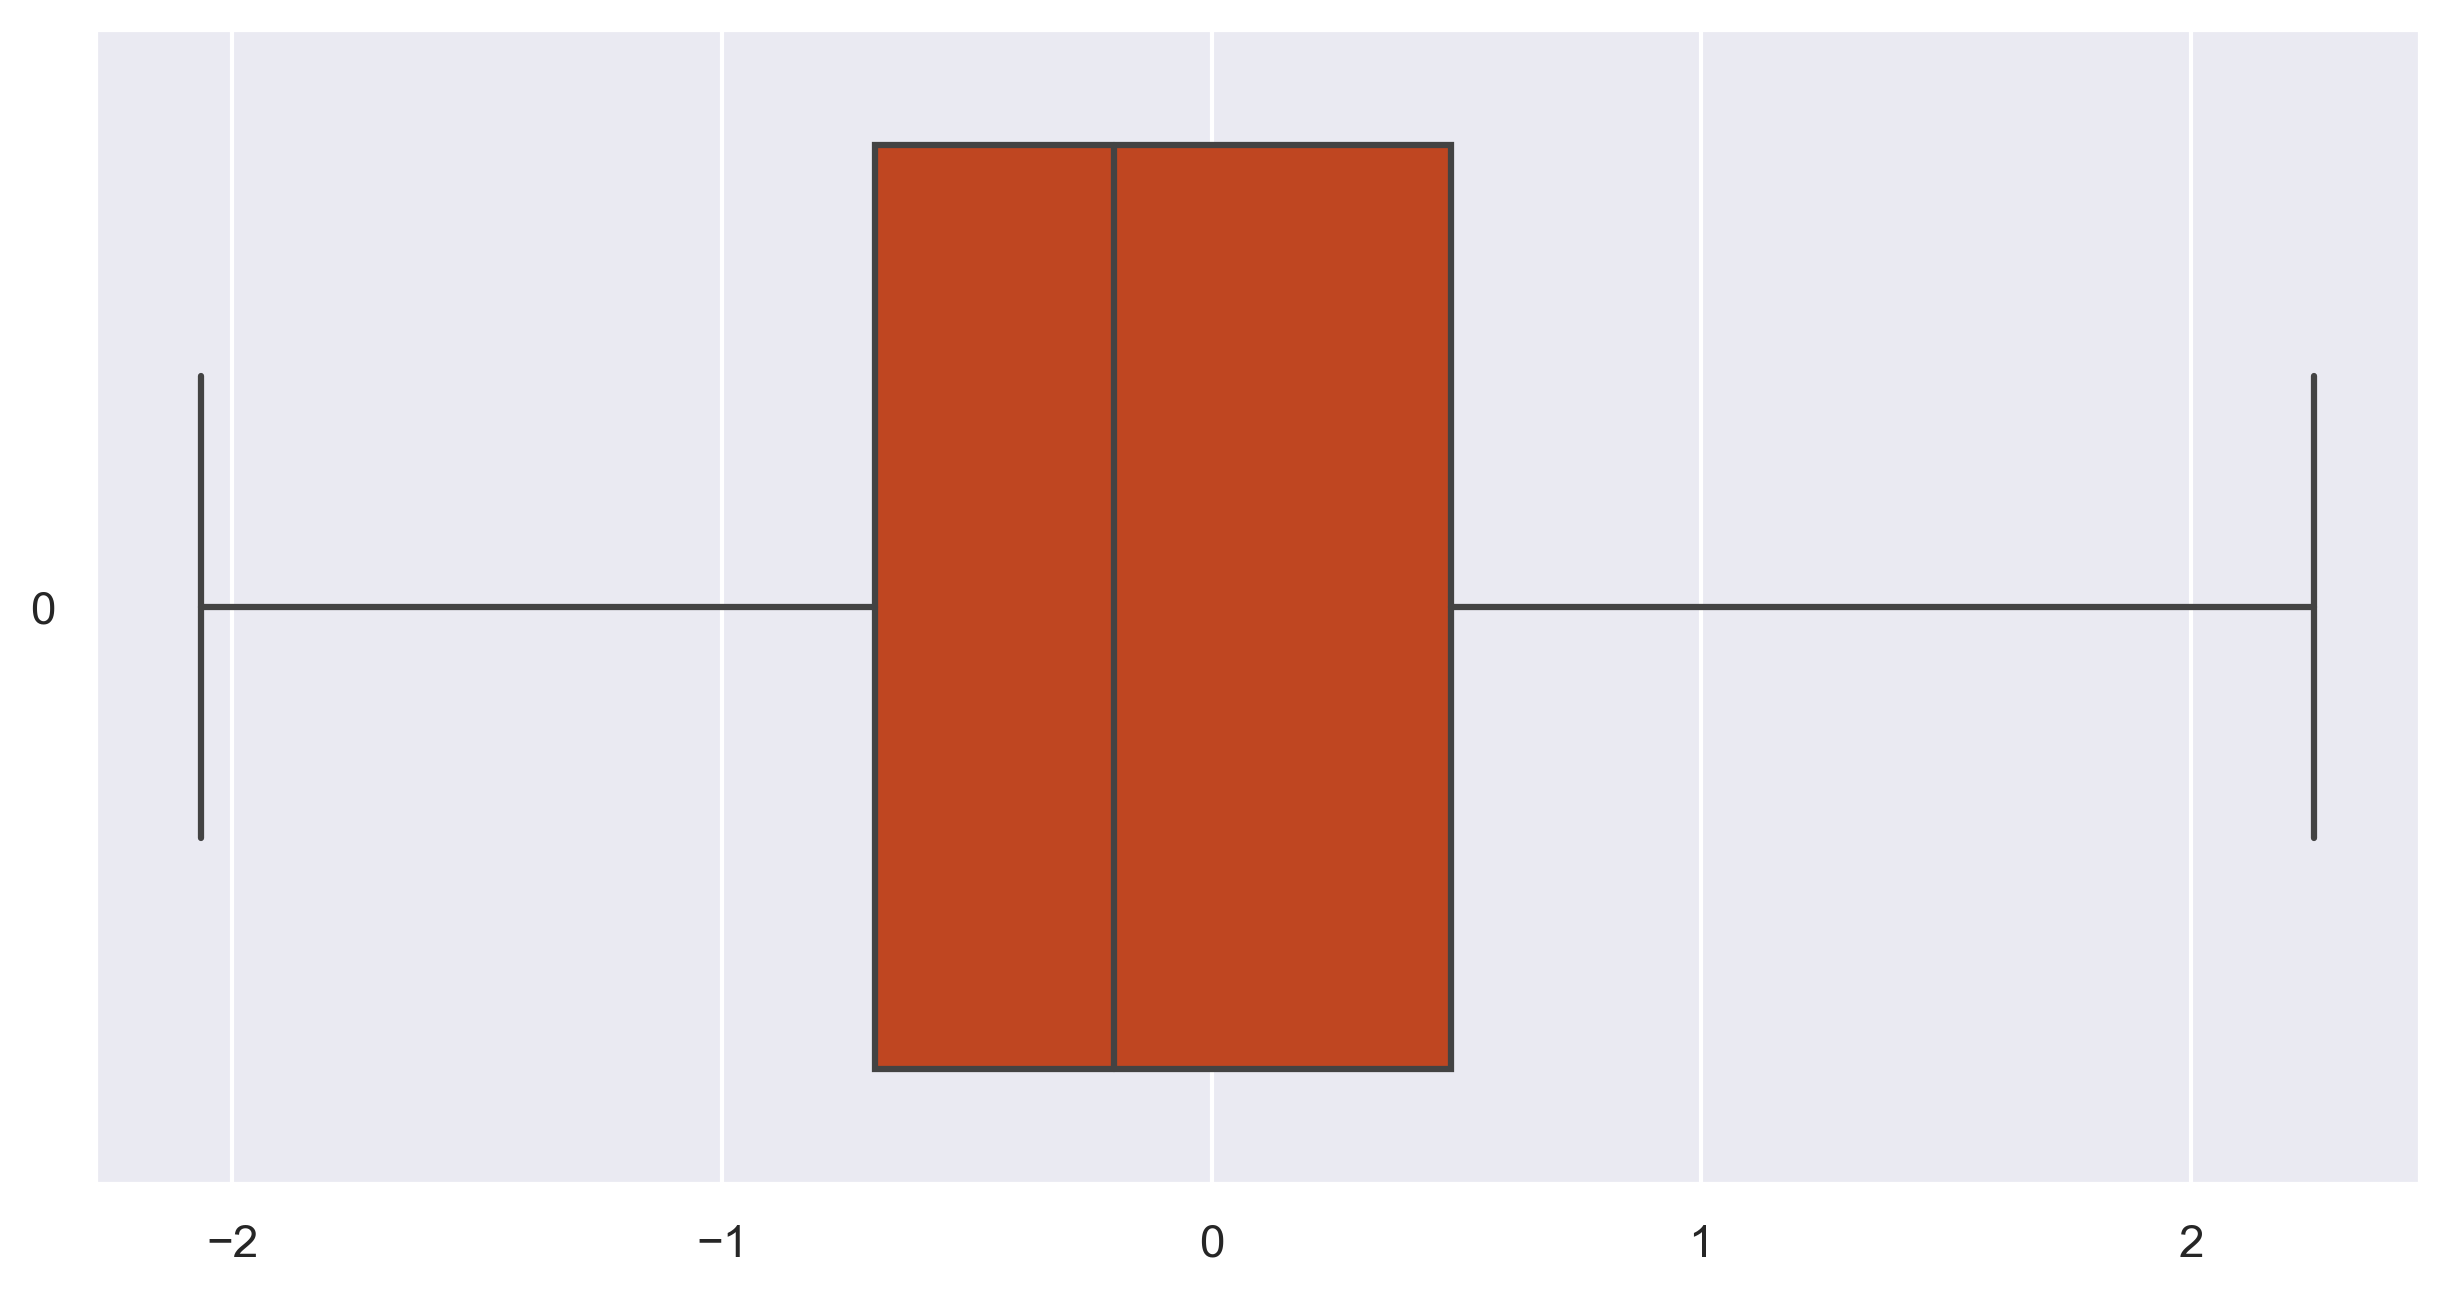

In [57]:
sns.boxplot(df_capped['Price'],orient='h')

In [58]:
#observation capping the outliers removed the outliers completely
#lets build a model on this-->model_capped

In [59]:
df_capped.head()

Price       Age        KM        HP        cc     Doors     Gears  \
0  1.009230 -1.777268 -0.575958 -0.767351  0.998113 -1.084443 -0.140475   
1  1.093220 -1.777268  0.116474 -0.767351  0.998113 -1.084443 -0.140475   
2  1.160412 -1.723380 -0.716707 -0.767351  0.998113 -1.084443 -0.140475   
3  1.496370 -1.615603 -0.548902 -0.767351  0.998113 -1.084443 -0.140475   
4  1.093220 -1.400049 -0.802384 -0.767351  0.998113 -1.084443 -0.140475   

        Tax    Weight  
0  3.003513  1.774964  
1  3.003513  1.774964  
2  3.003513  1.774964  
3  3.003513  1.774964  
4  3.003513  1.870688

In [60]:
model_capped=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=df_capped).fit()

In [61]:
model_capped.rsquared.round(3),model_raw.rsquared.round(3),model_without_cc_and_Doors.rsquared.round(3)

(0.856, 0.863, 0.862)

In [62]:
model_capped.pvalues.round(2)

Intercept    1.00
Age          0.00
KM           0.00
HP           0.00
cc           0.81
Doors        0.01
Gears        0.00
Tax          0.03
Weight       0.00
dtype: float64

#observation:
- capped data has only one 'cc' column p value>alpha (0.05)
- lets build a model withou 'cc'

In [63]:
model_capped_without_cc=smf.ols('Price~Age+KM+HP+Doors+Gears+Tax+Weight',data=df_capped).fit()

In [64]:
model_capped_without_cc.rsquared.round(3)

0.856

In [65]:
model_capped_without_cc.pvalues.round(2)

Intercept    1.00
Age          0.00
KM           0.00
HP           0.00
Doors        0.01
Gears        0.00
Tax          0.02
Weight       0.00
dtype: float64

In [66]:
r_square_table=pd.DataFrame()
r_square_table['models']=('model_capped','model_capped_without_cc','model_cc','model_Doors','model_raw','model_without_cc_and_Doors')
r_square_table['r_square_values']=(model_capped.rsquared.round(3),model_capped_without_cc.rsquared.round(3),model_cc.rsquared.round(3),model_Doors.rsquared.round(3),model_raw.rsquared.round(3),model_without_cc_and_Doors.rsquared.round(3))

In [67]:
r_square_table

models  r_square_values
0                model_capped            0.856
1     model_capped_without_cc            0.856
2                    model_cc            0.863
3                 model_Doors            0.862
4                   model_raw            0.863
5  model_without_cc_and_Doors            0.862

In [68]:
#now lets build models according to correlation 

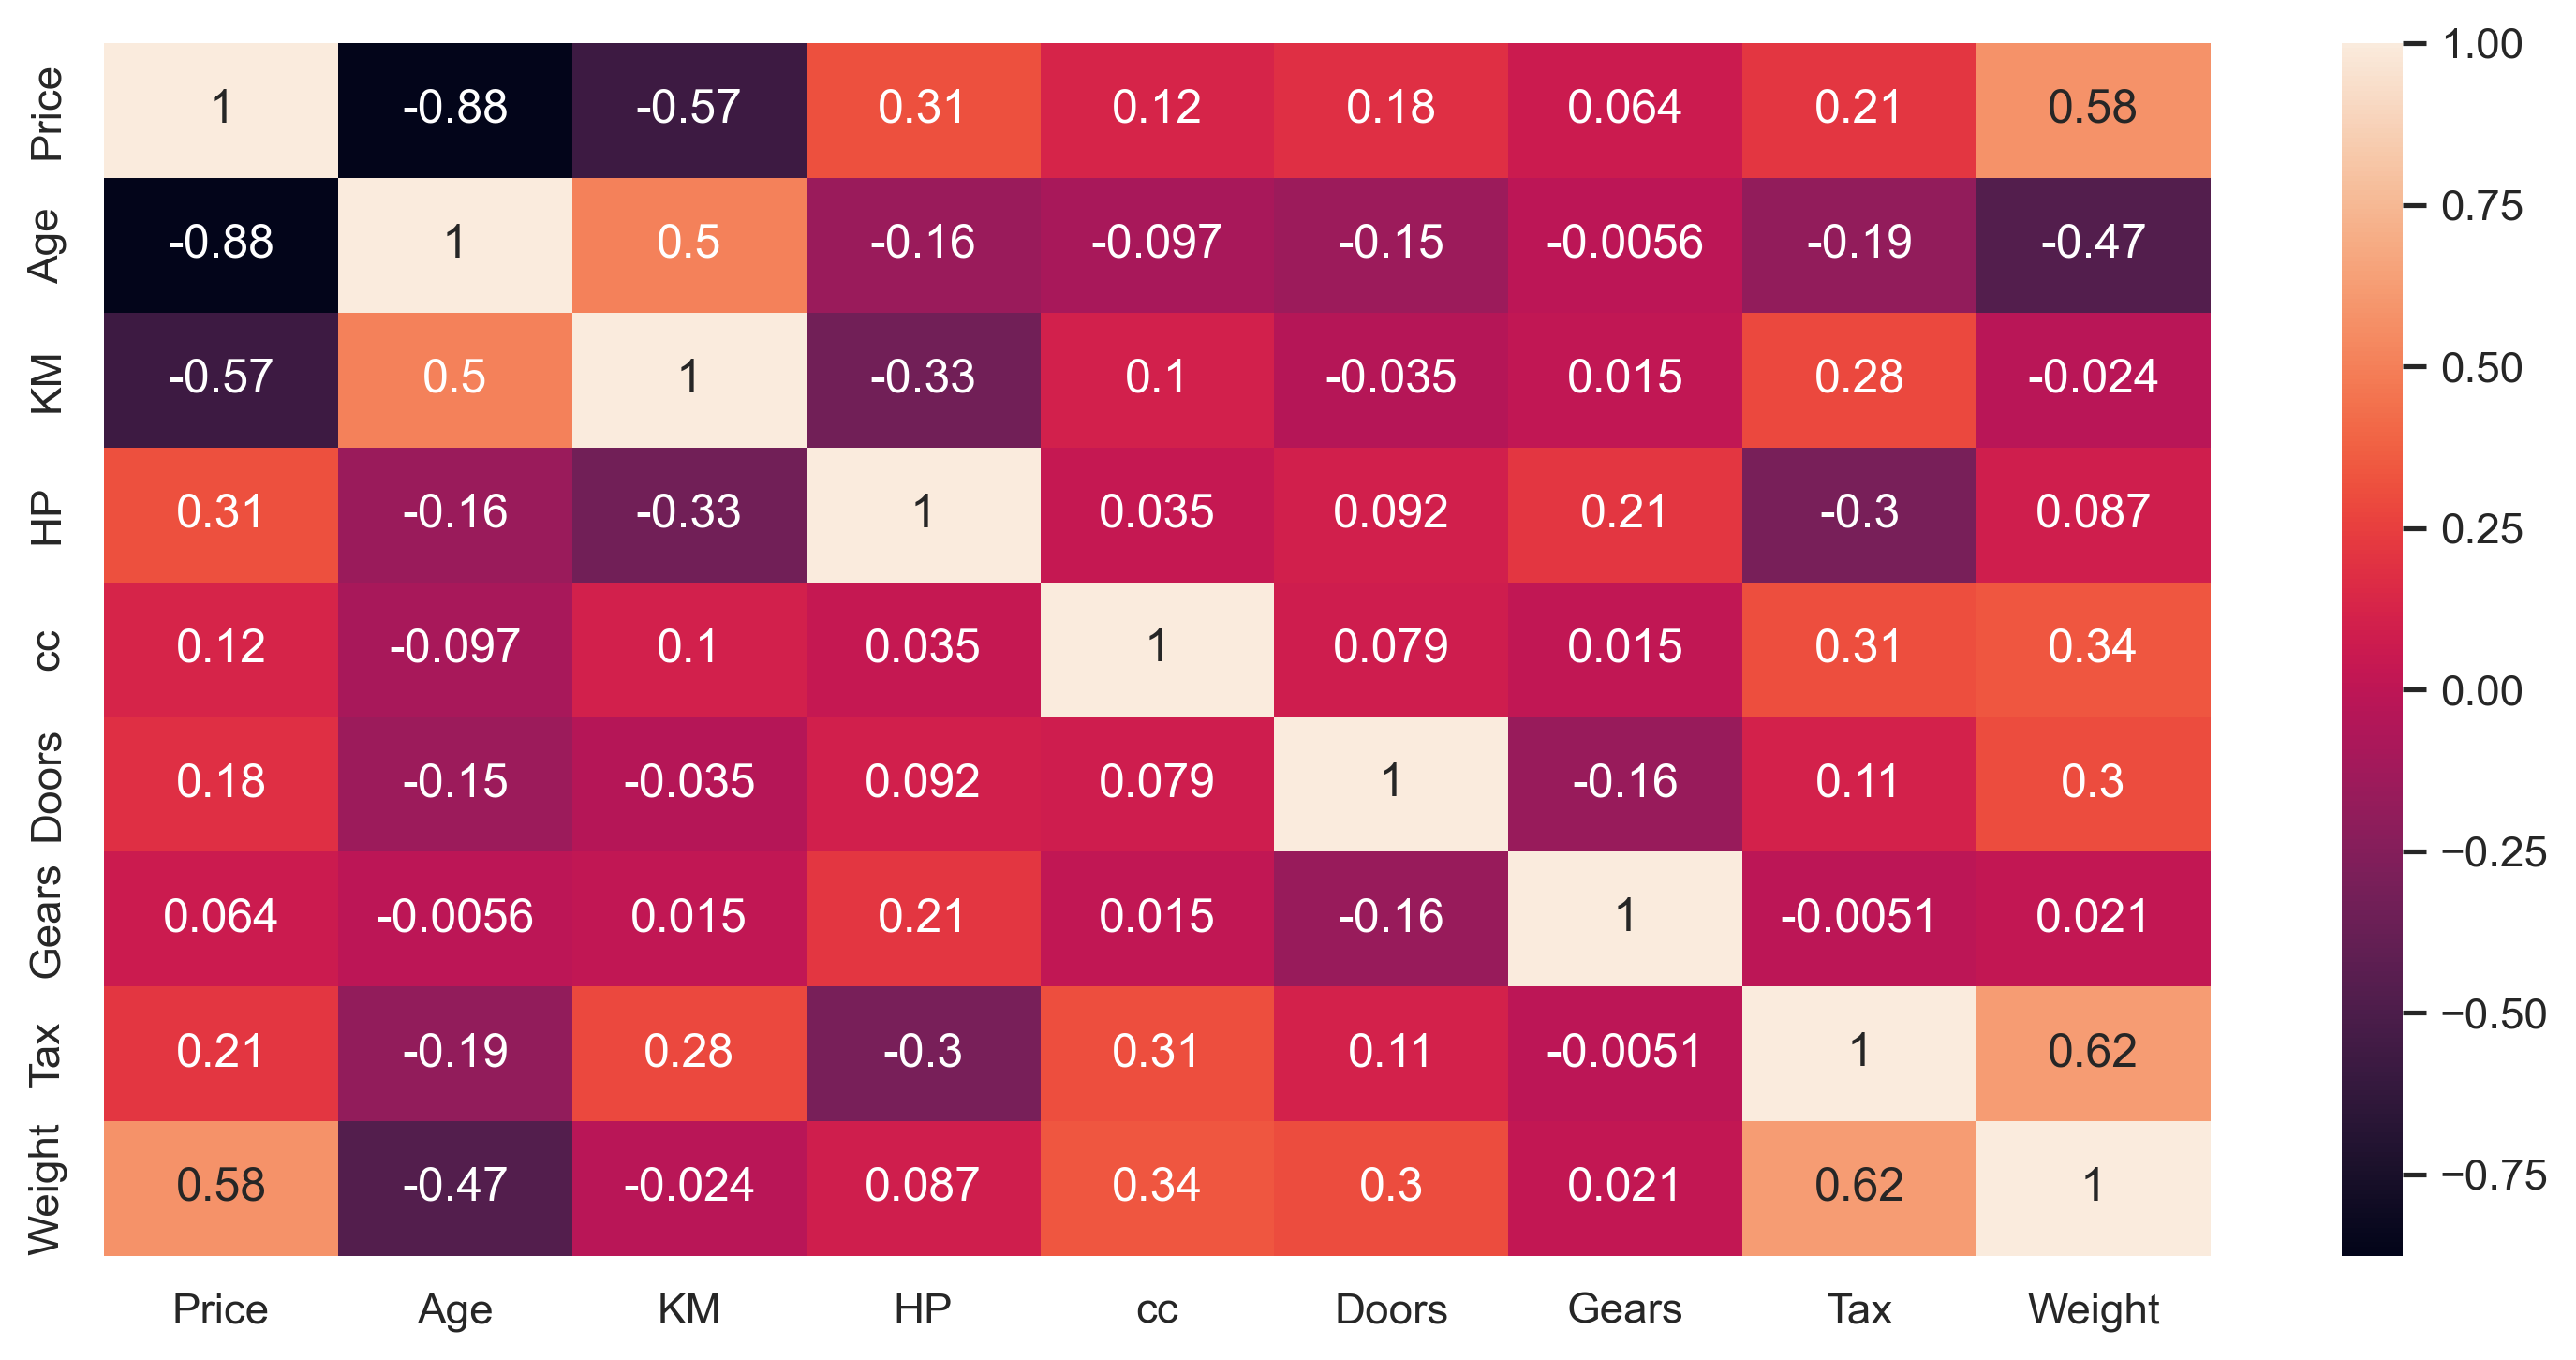

In [69]:
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

In [70]:
model_Age=smf.ols('Price~Age',data=df).fit()

model_Age_Weight=smf.ols('Price~Weight+Age',data=df).fit()

model_Age_Weight_KM=smf.ols('Price~Weight+Age+KM',data=df).fit()

model_Age_Weight_KM_HP=smf.ols('Price~Weight+Age+KM+HP',data=df).fit()

model_Age_Weight_KM_HP_Tax=smf.ols('Price~Weight+Age+KM+HP+Tax',data=df).fit()

model_Age_Weight_KM_HP_Tax_Doors=smf.ols('Price~Weight+Age+KM+HP+Tax+Doors',data=df).fit()

model_Age_Weight_KM_HP_Tax_Doors_cc=smf.ols('Price~Weight+Age+KM+HP+Tax+Doors+cc',data=df).fit()

model_Age_Weight_KM_HP_Tax_Doors_cc_Gears=smf.ols('Price~Weight+Age+KM+HP+Tax+Doors+cc+Gears',data=df).fit()

In [116]:
r_square_table=pd.DataFrame()
r_square_table['models']=('model_capped','model_capped_without_cc','model_cc','model_Doors','model_raw','model_without_cc_and_Doors','model_Age','model_Age_Weight','model_Age_Weight_KM','model_Age_Weight_KM_HP','model_Age_Weight_KM_HP_Tax','model_Age_Weight_KM_HP_Tax_Doors','model_Age_Weight_KM_HP_Tax_Doors_cc','model_Age_Weight_KM_HP_Tax_Doors_cc_Gears','final_model_without_cc_and_Doors')
r_square_table['r_square_values']=(model_capped.rsquared.round(3),model_capped_without_cc.rsquared.round(3),model_cc.rsquared.round(3),model_Doors.rsquared.round(3),model_raw.rsquared.round(3),model_without_cc_and_Doors.rsquared.round(3),model_Age.rsquared.round(3),model_Age_Weight.rsquared.round(3),model_Age_Weight_KM.rsquared.round(3),model_Age_Weight_KM_HP.rsquared.round(3),model_Age_Weight_KM_HP_Tax.rsquared.round(3),model_Age_Weight_KM_HP_Tax_Doors.rsquared.round(3),model_Age_Weight_KM_HP_Tax_Doors_cc.rsquared.round(3),model_Age_Weight_KM_HP_Tax_Doors_cc_Gears.rsquared.round(3),final_model_without_cc_and_Doors.rsquared.round(3))

In [117]:
r_square_table

models  r_square_values
0                                model_capped            0.856
1                     model_capped_without_cc            0.856
2                                    model_cc            0.863
3                                 model_Doors            0.862
4                                   model_raw            0.863
5                  model_without_cc_and_Doors            0.862
6                                   model_Age            0.768
7                            model_Age_Weight            0.804
8                         model_Age_Weight_KM            0.847
9                      model_Age_Weight_KM_HP            0.861
10                 model_Age_Weight_KM_HP_Tax            0.861
11           model_Age_Weight_KM_HP_Tax_Doors            0.861
12        model_Age_Weight_KM_HP_Tax_Doors_cc            0.862
13  model_Age_Weight_KM_HP_Tax_Doors_cc_Gears            0.863
14           final_model_without_cc_and_Doors            0.862

In [ ]:
#after observerving all the models I am choosing model_without_cc_and_Doors and performing model validation techniques

In [ ]:
# Residual Analysis
# Q-Q plot
To check normality of errors

In [82]:
model_without_cc_and_Doors.resid

0      -0.915362
1      -0.696043
2      -0.787364
3      -0.406304
4      -0.681910
          ...   
1430   -0.356281
1431    0.709385
1432    0.014126
1433   -0.366706
1434   -0.958785
Length: 1435, dtype: float64

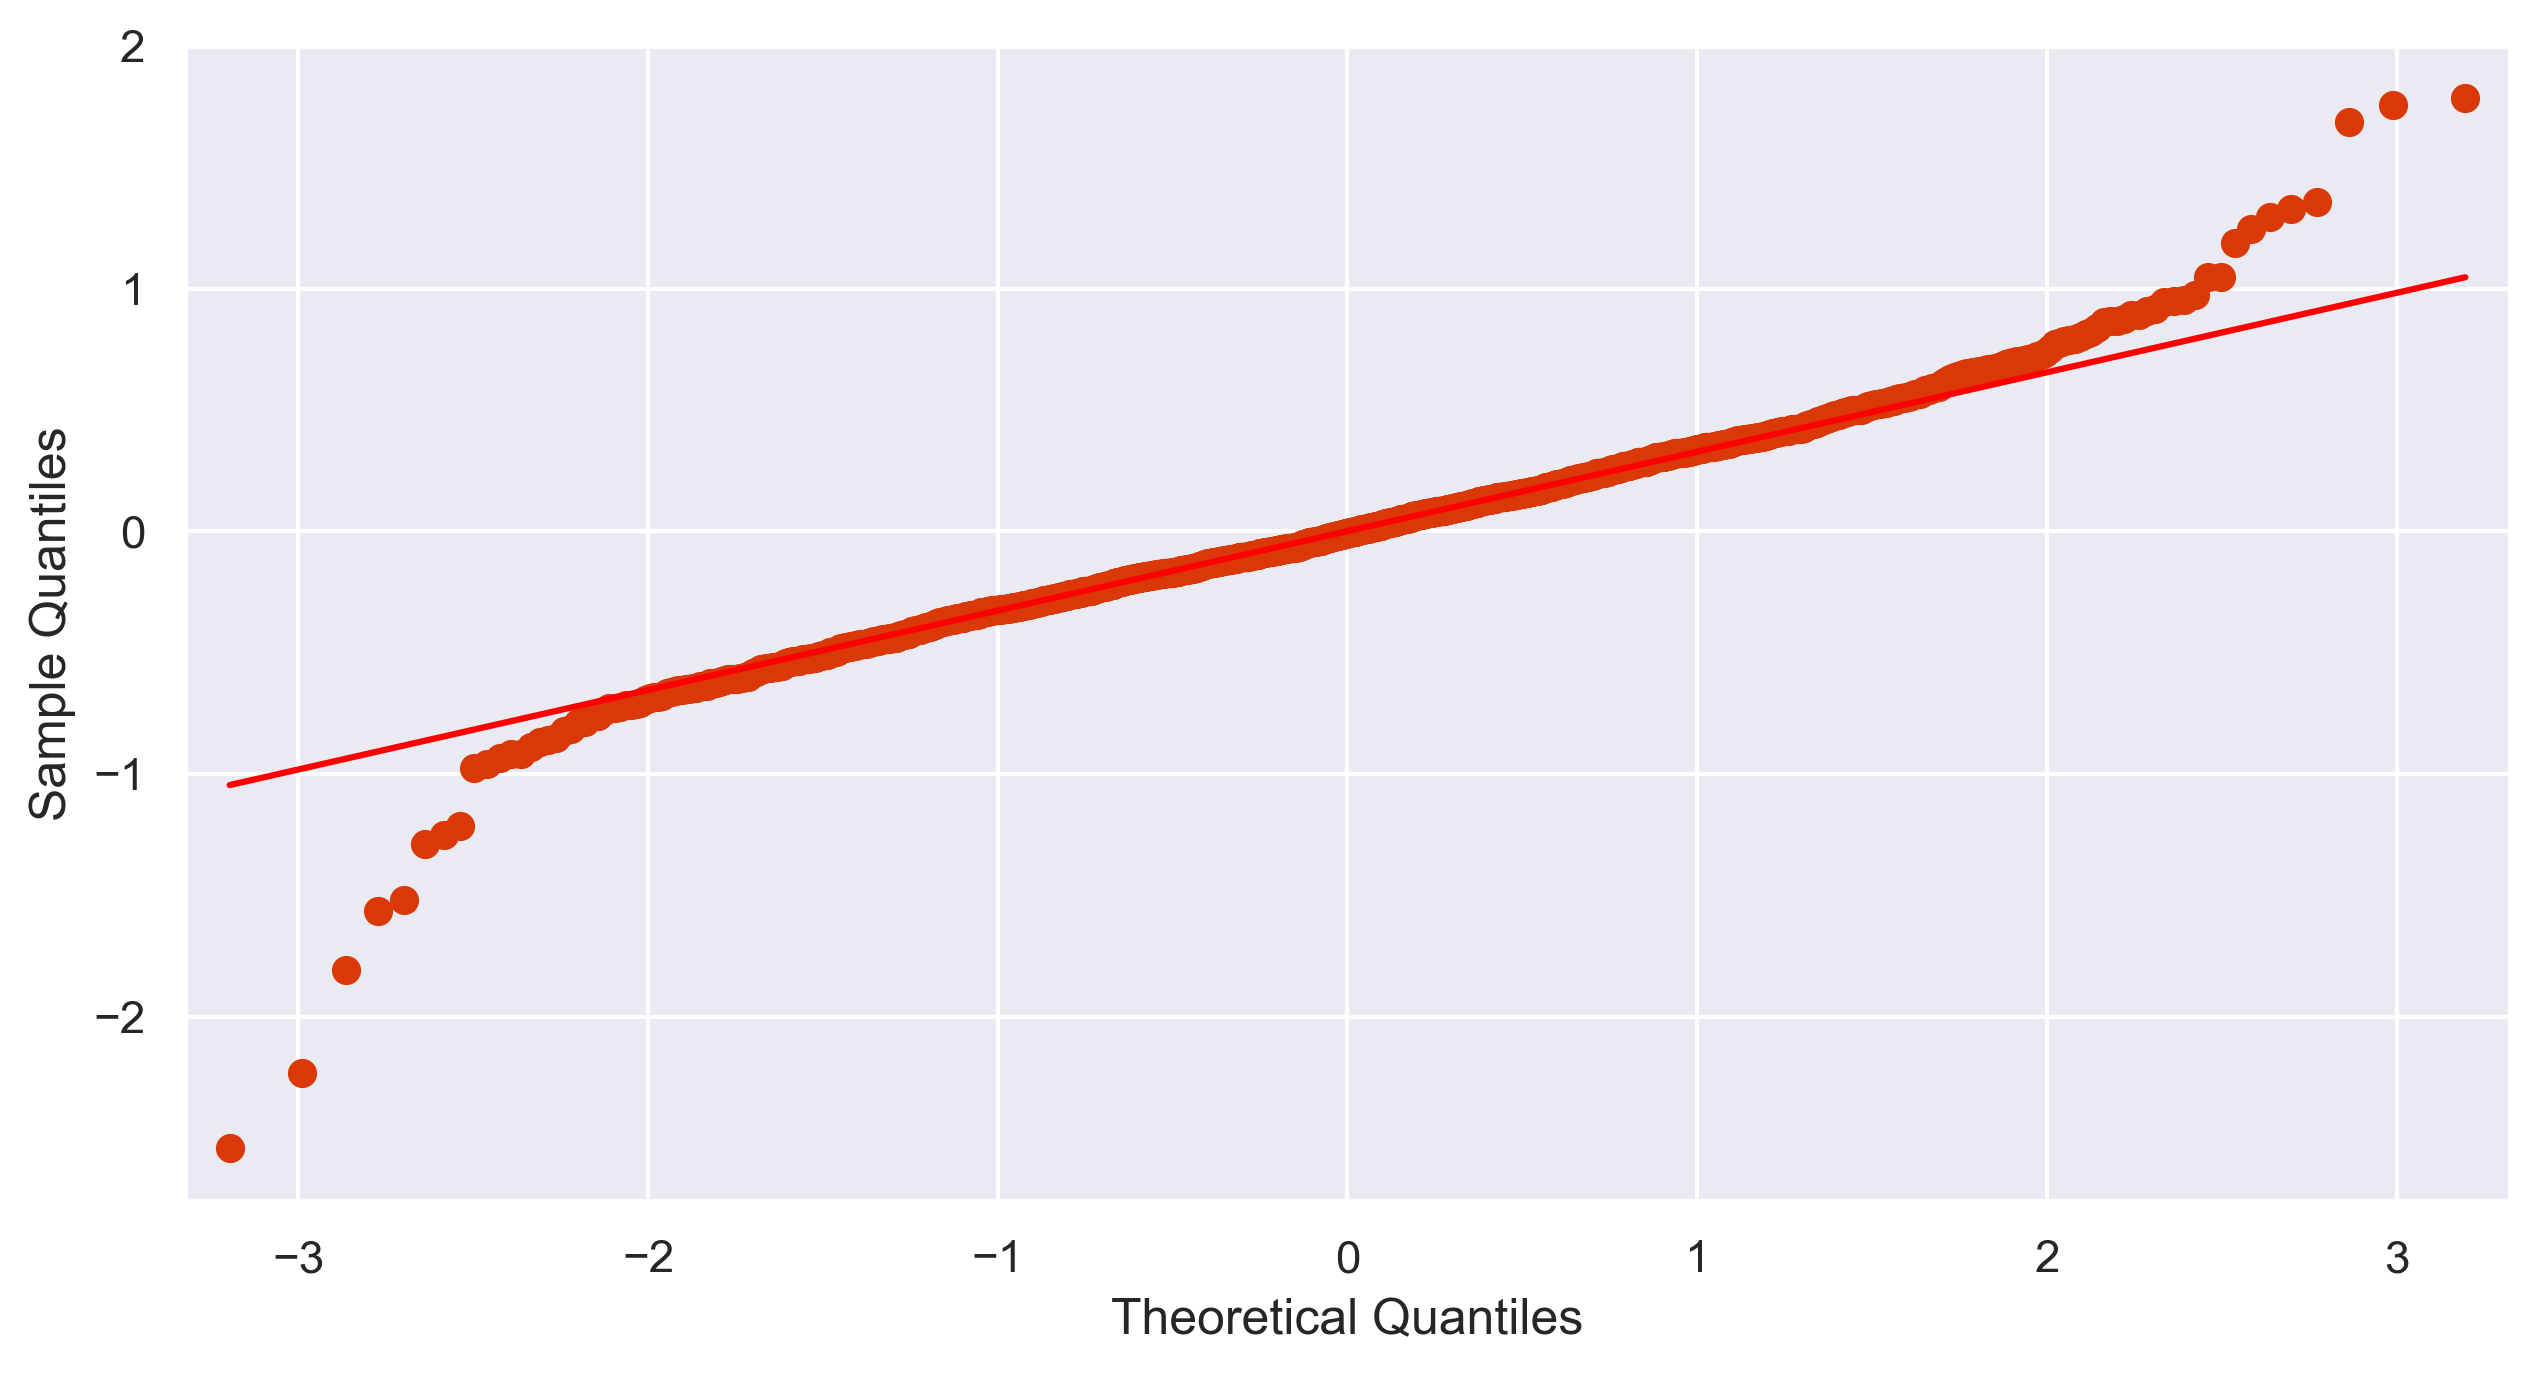

In [86]:
sm.qqplot(model_without_cc_and_Doors.resid,line='q');#errors has noraml distrubution 

In [ ]:
# 2. Residual plot of homoscedasticity
To check to check if there is any pattern

<Axes: >

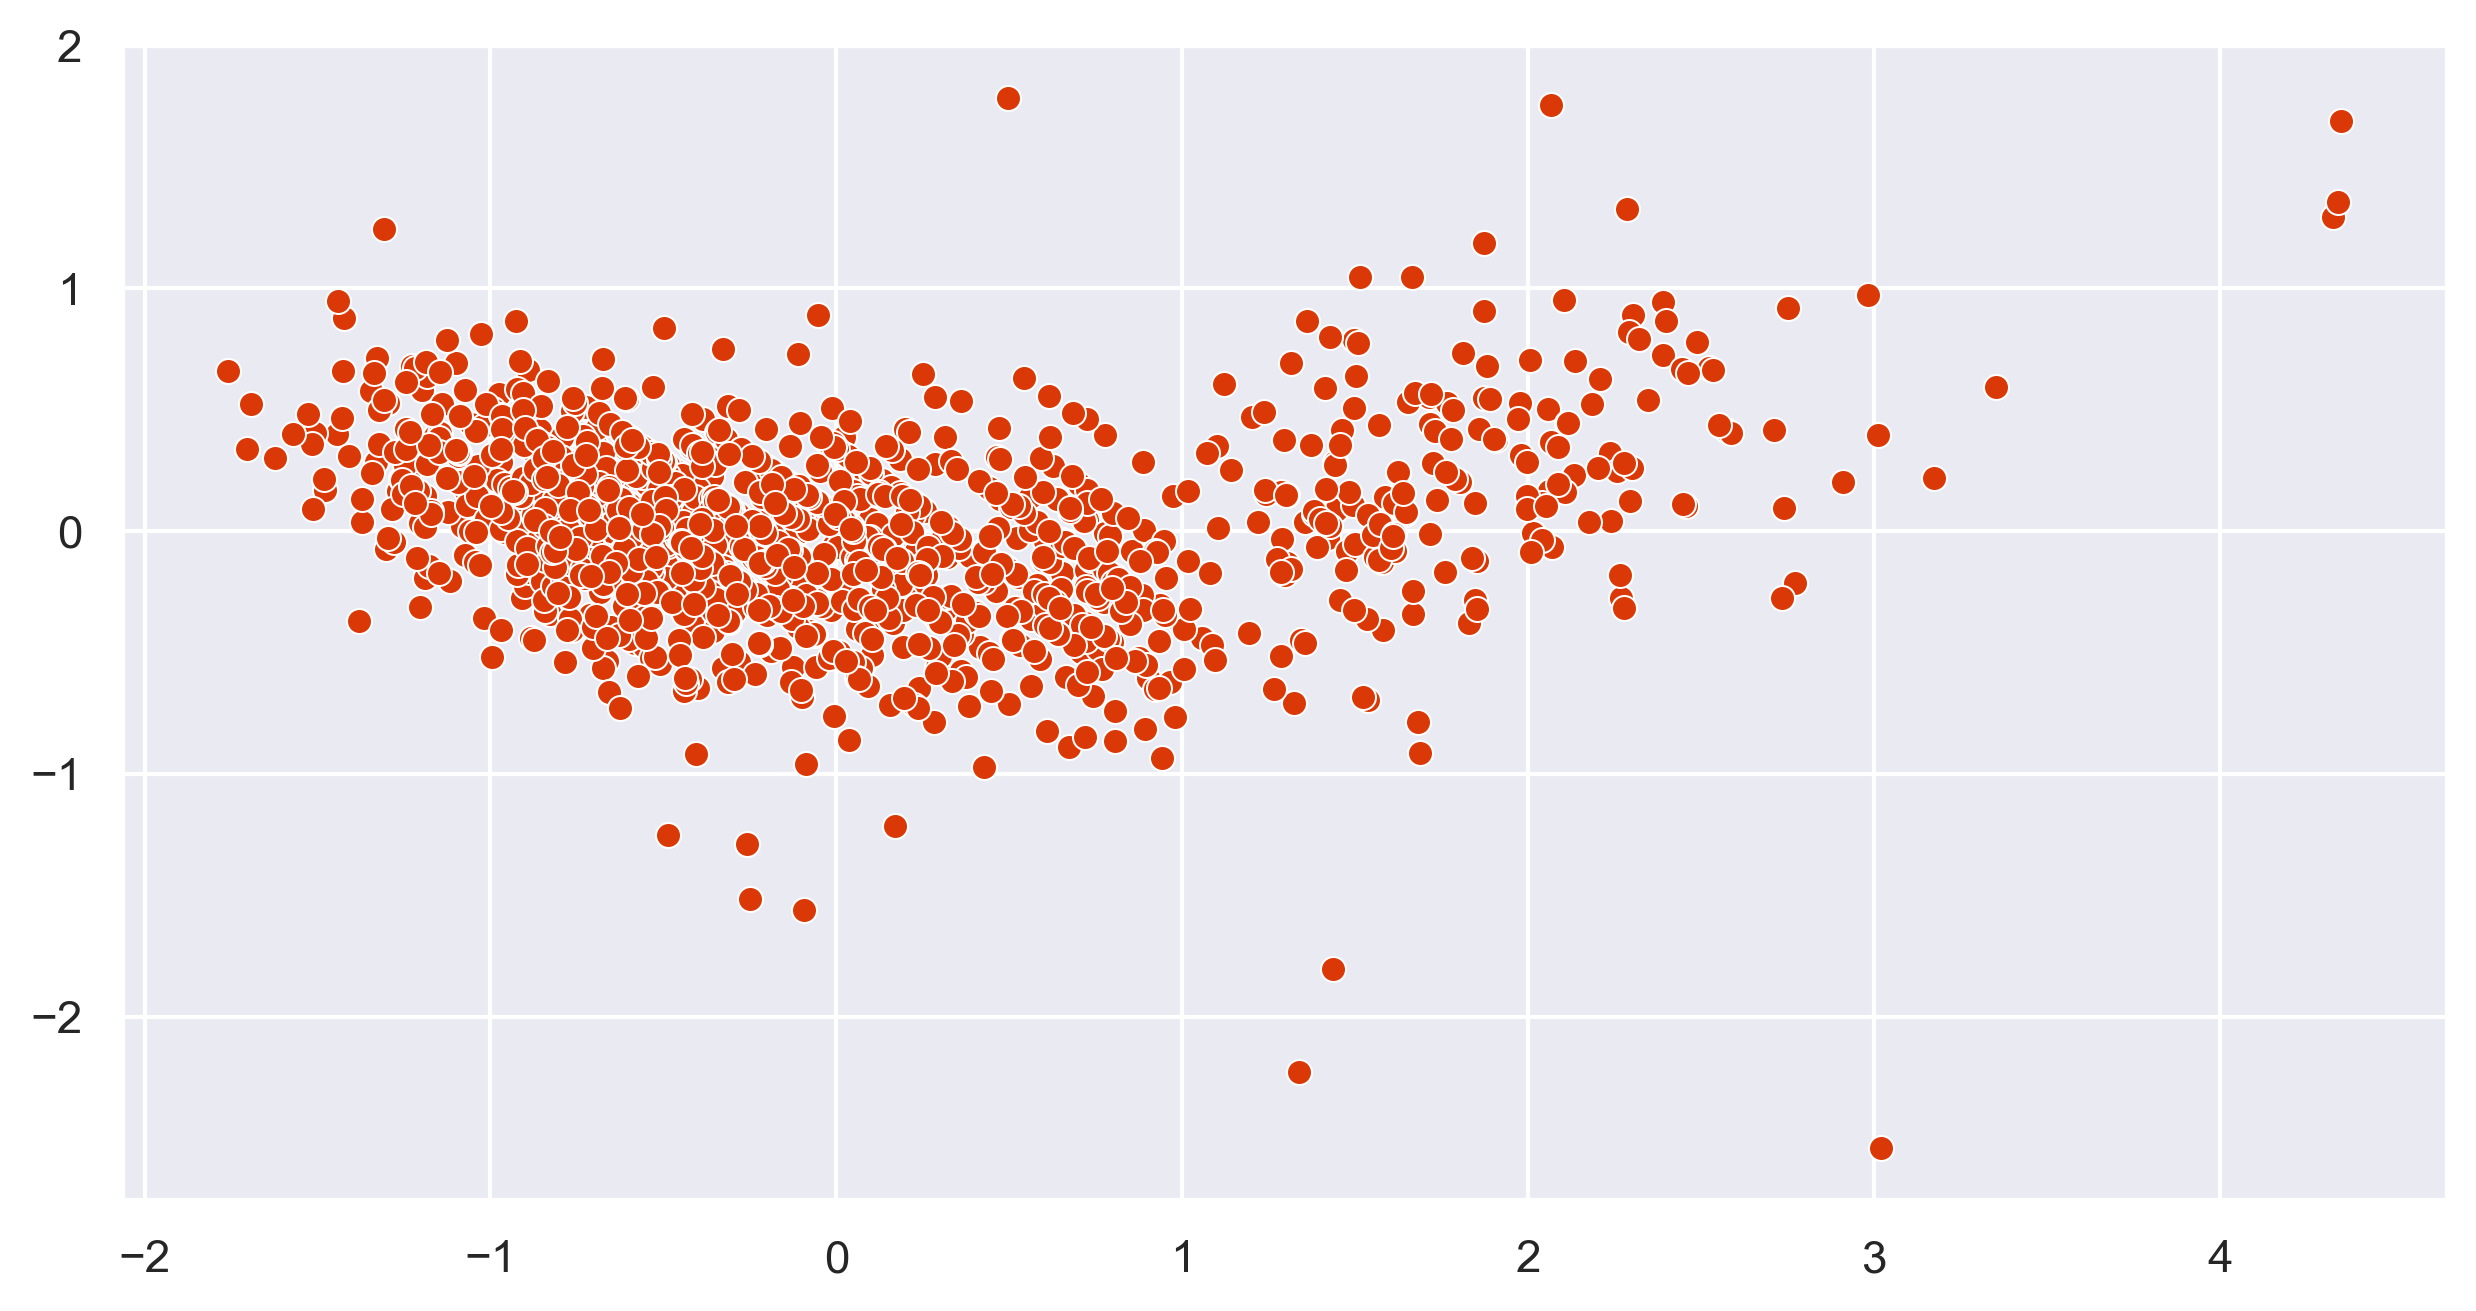

In [87]:
sns.scatterplot(x=model_without_cc_and_Doors.fittedvalues,y=model_without_cc_and_Doors.resid)# no pattern

In [ ]:
# 3.Residual vs Regressor
Weather erros are independent of our features

In [88]:
df.head()

Price  Age     KM  HP    cc  Doors  Gears  Tax  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

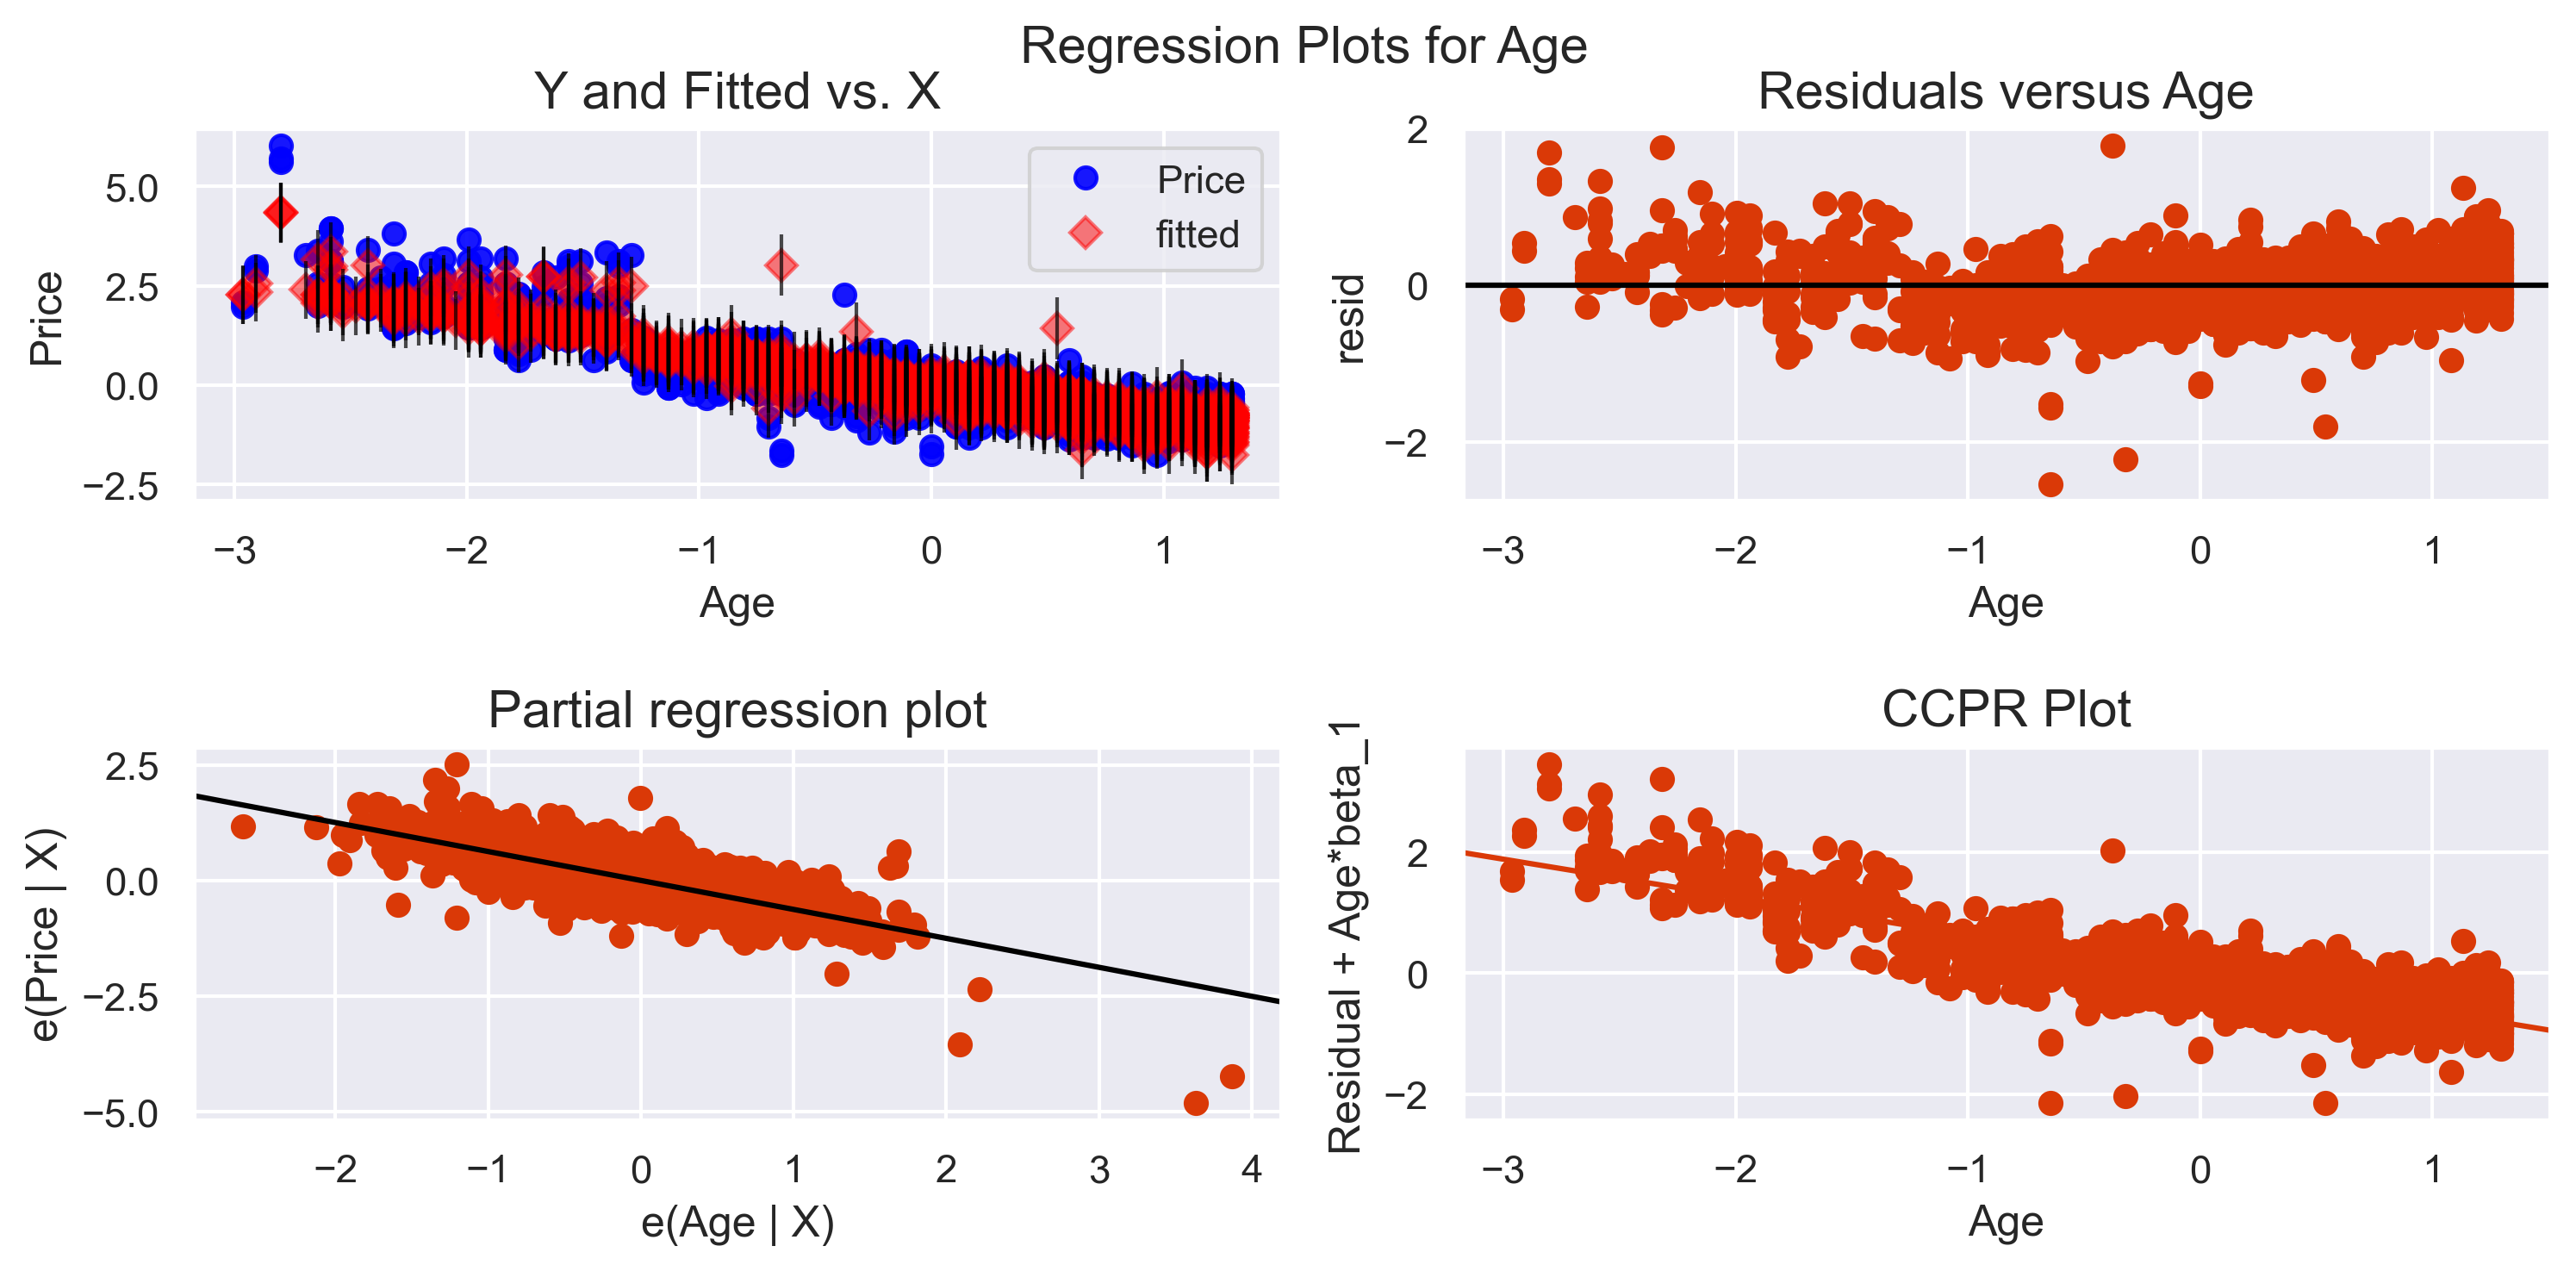

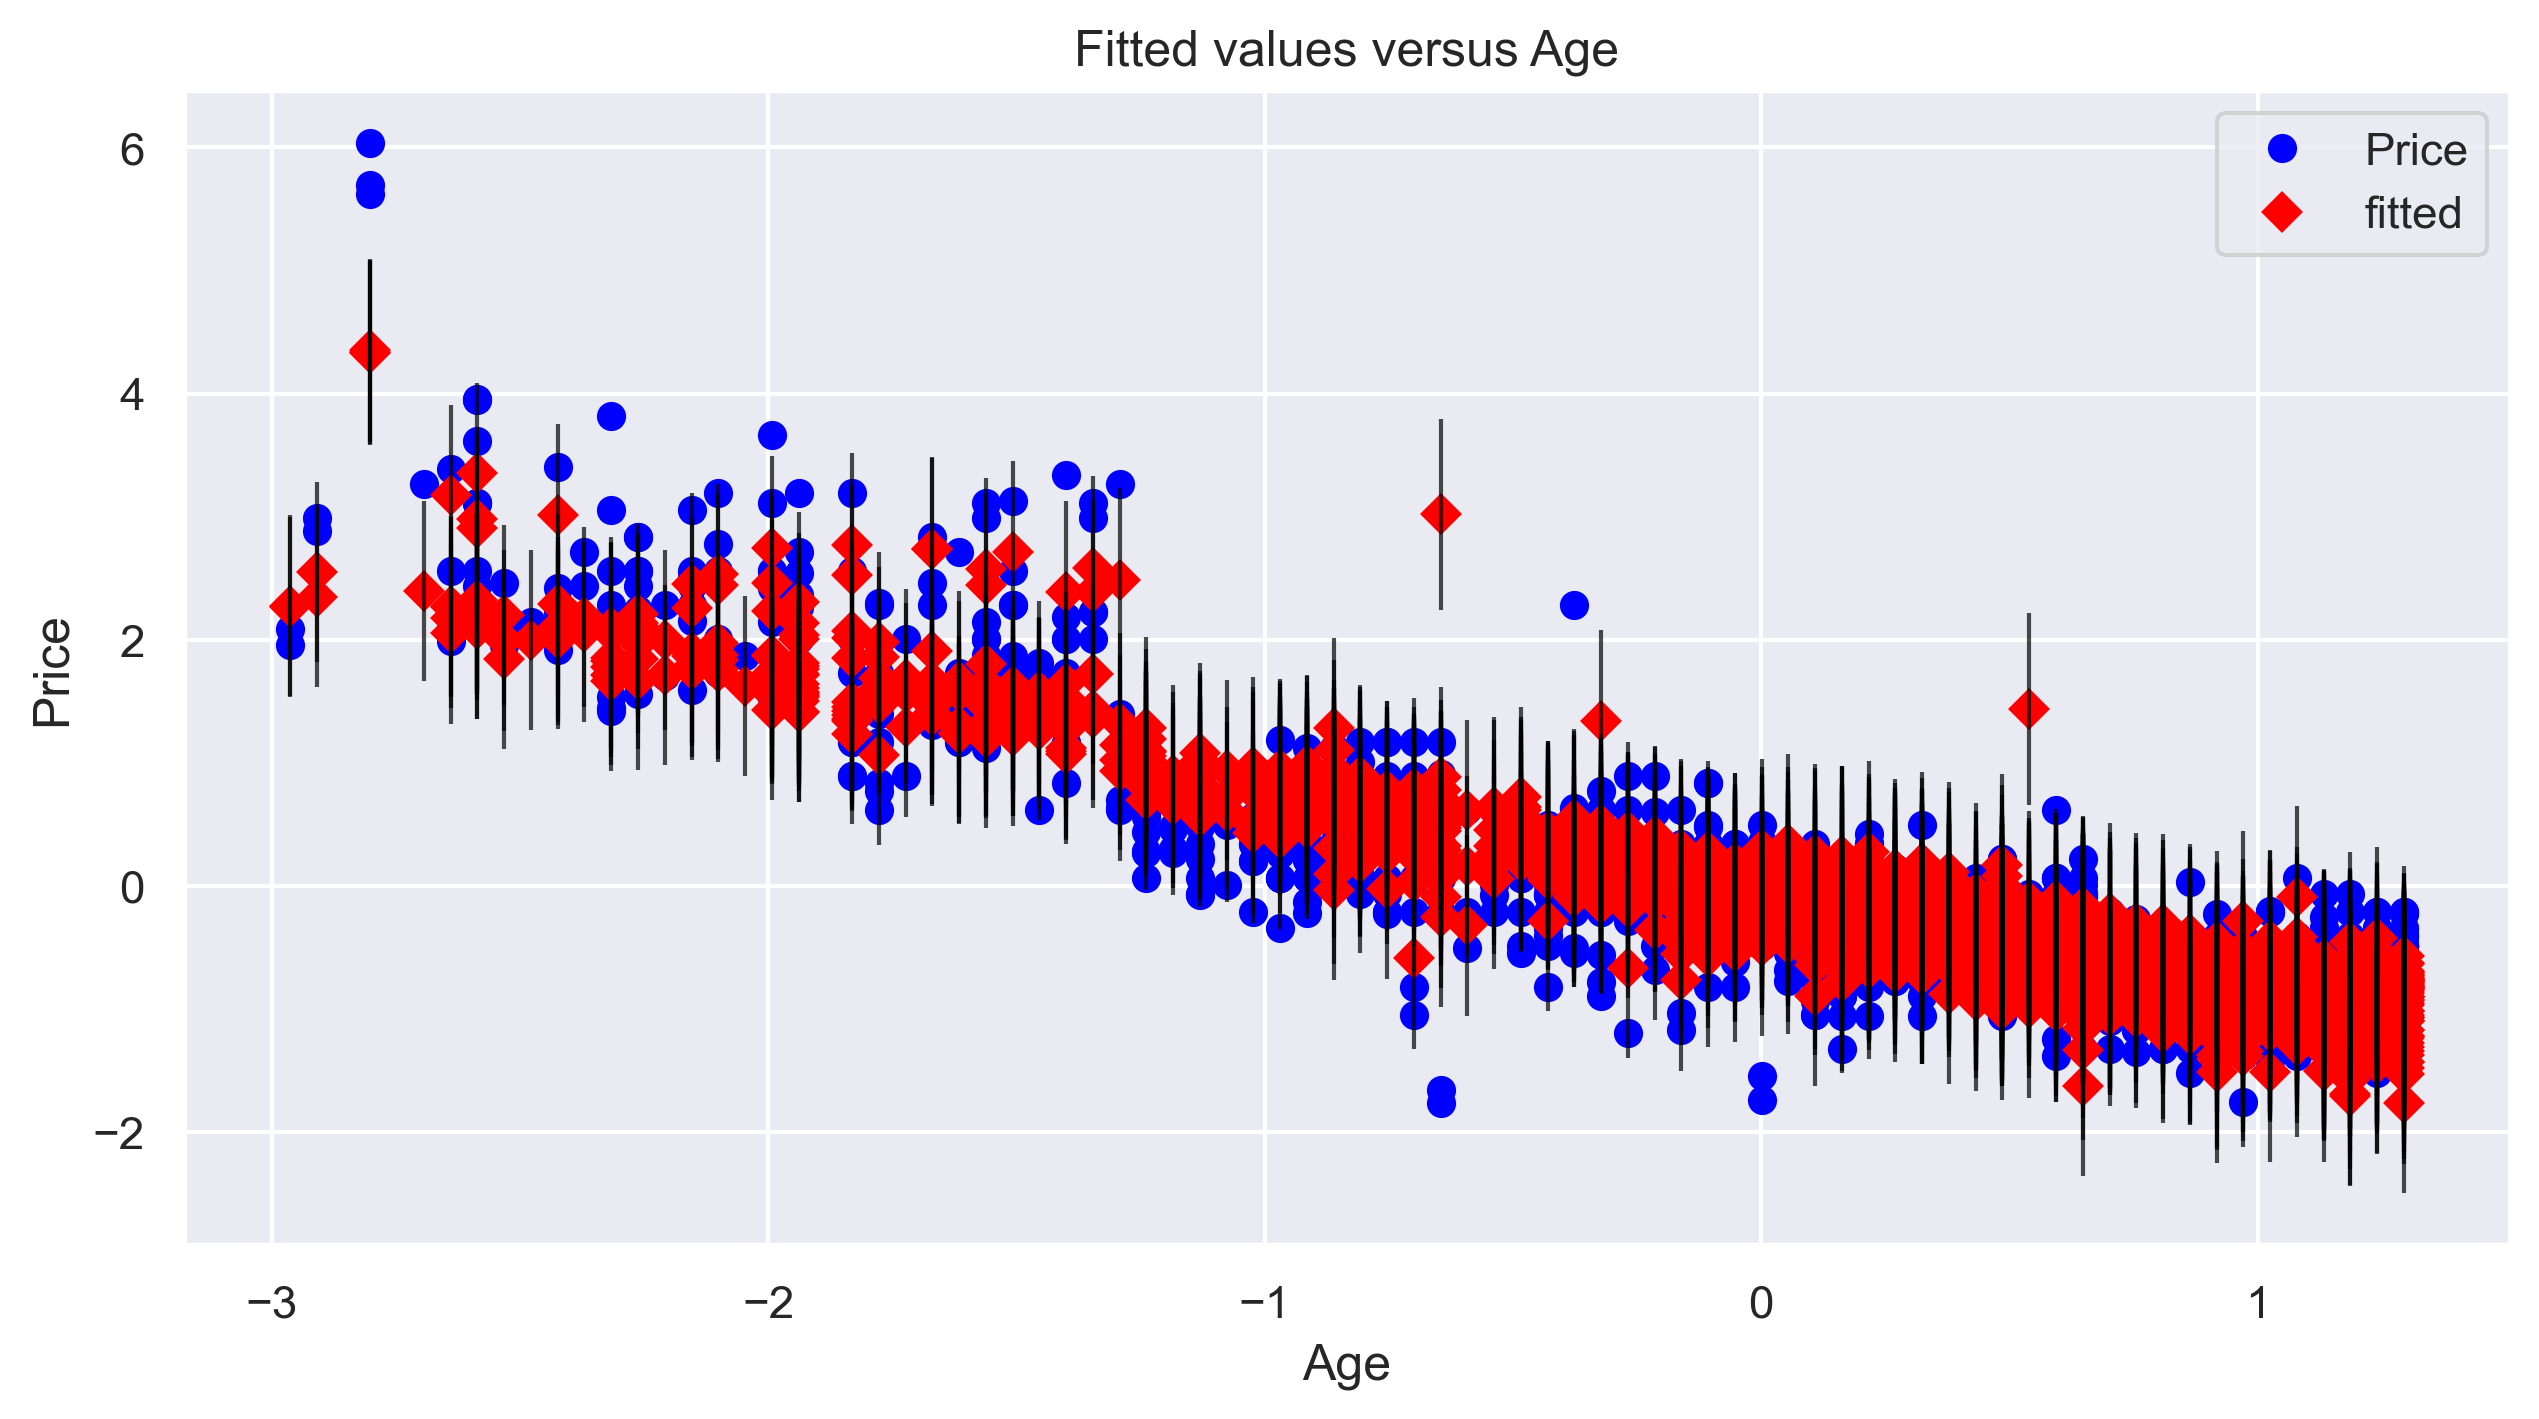

In [90]:
sm.graphics.plot_regress_exog(model_without_cc_and_Doors,'Age'),sm.graphics.plot_fit(model_without_cc_and_Doors,'Age')

(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

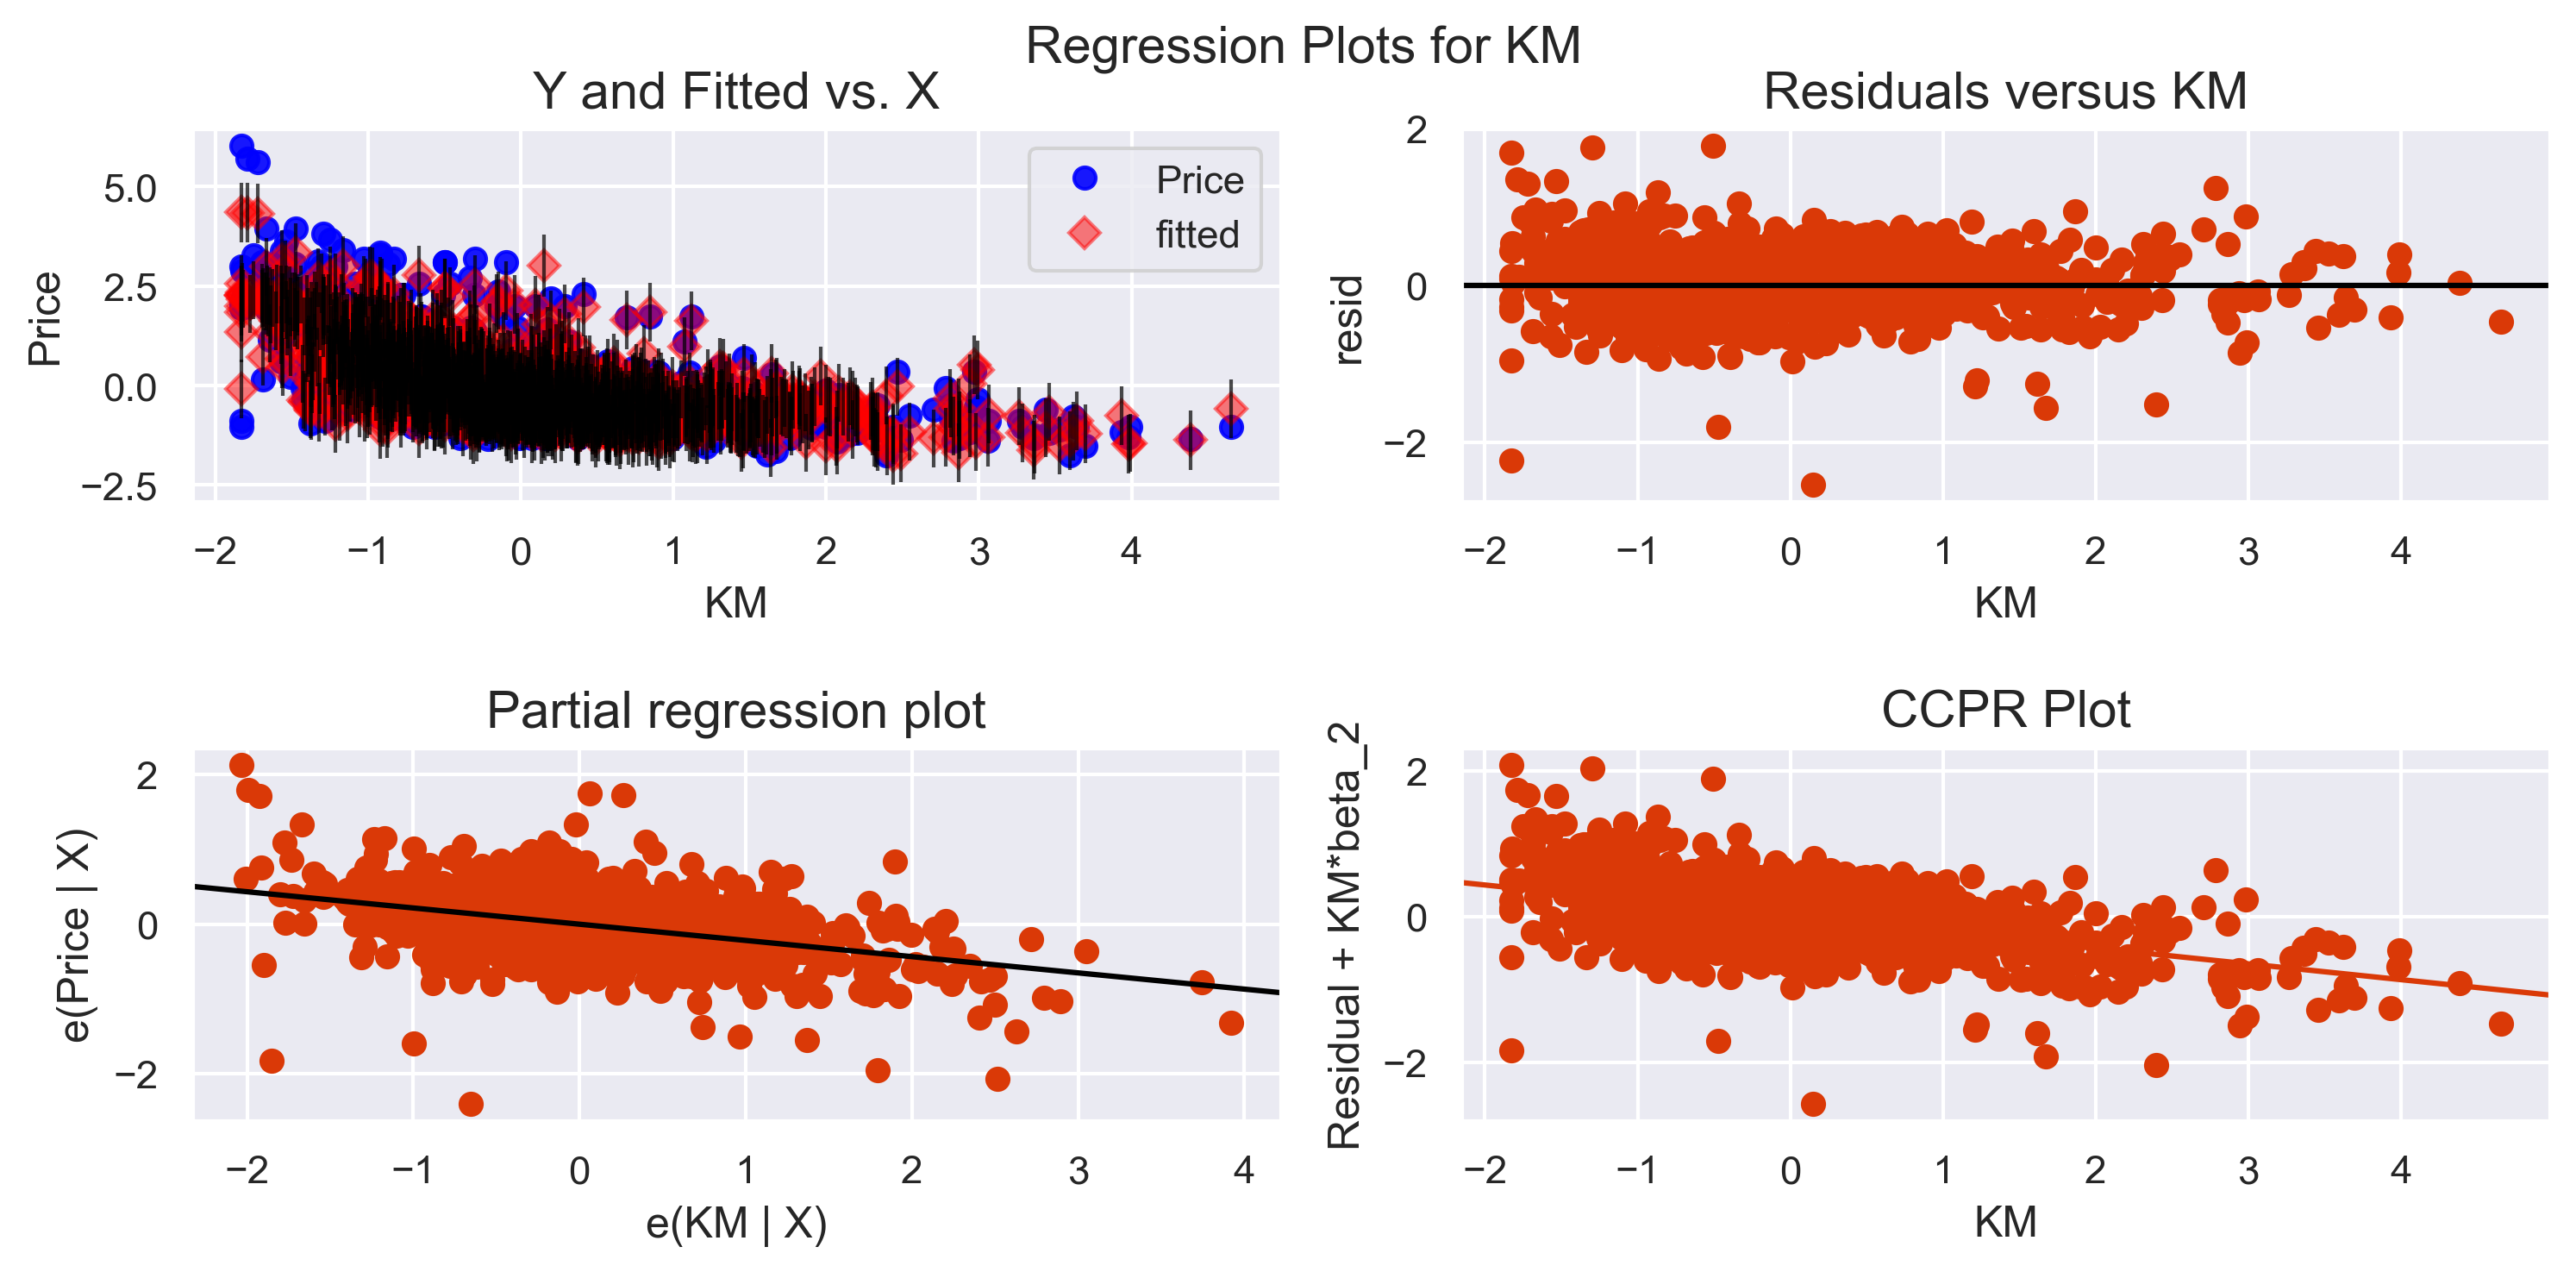

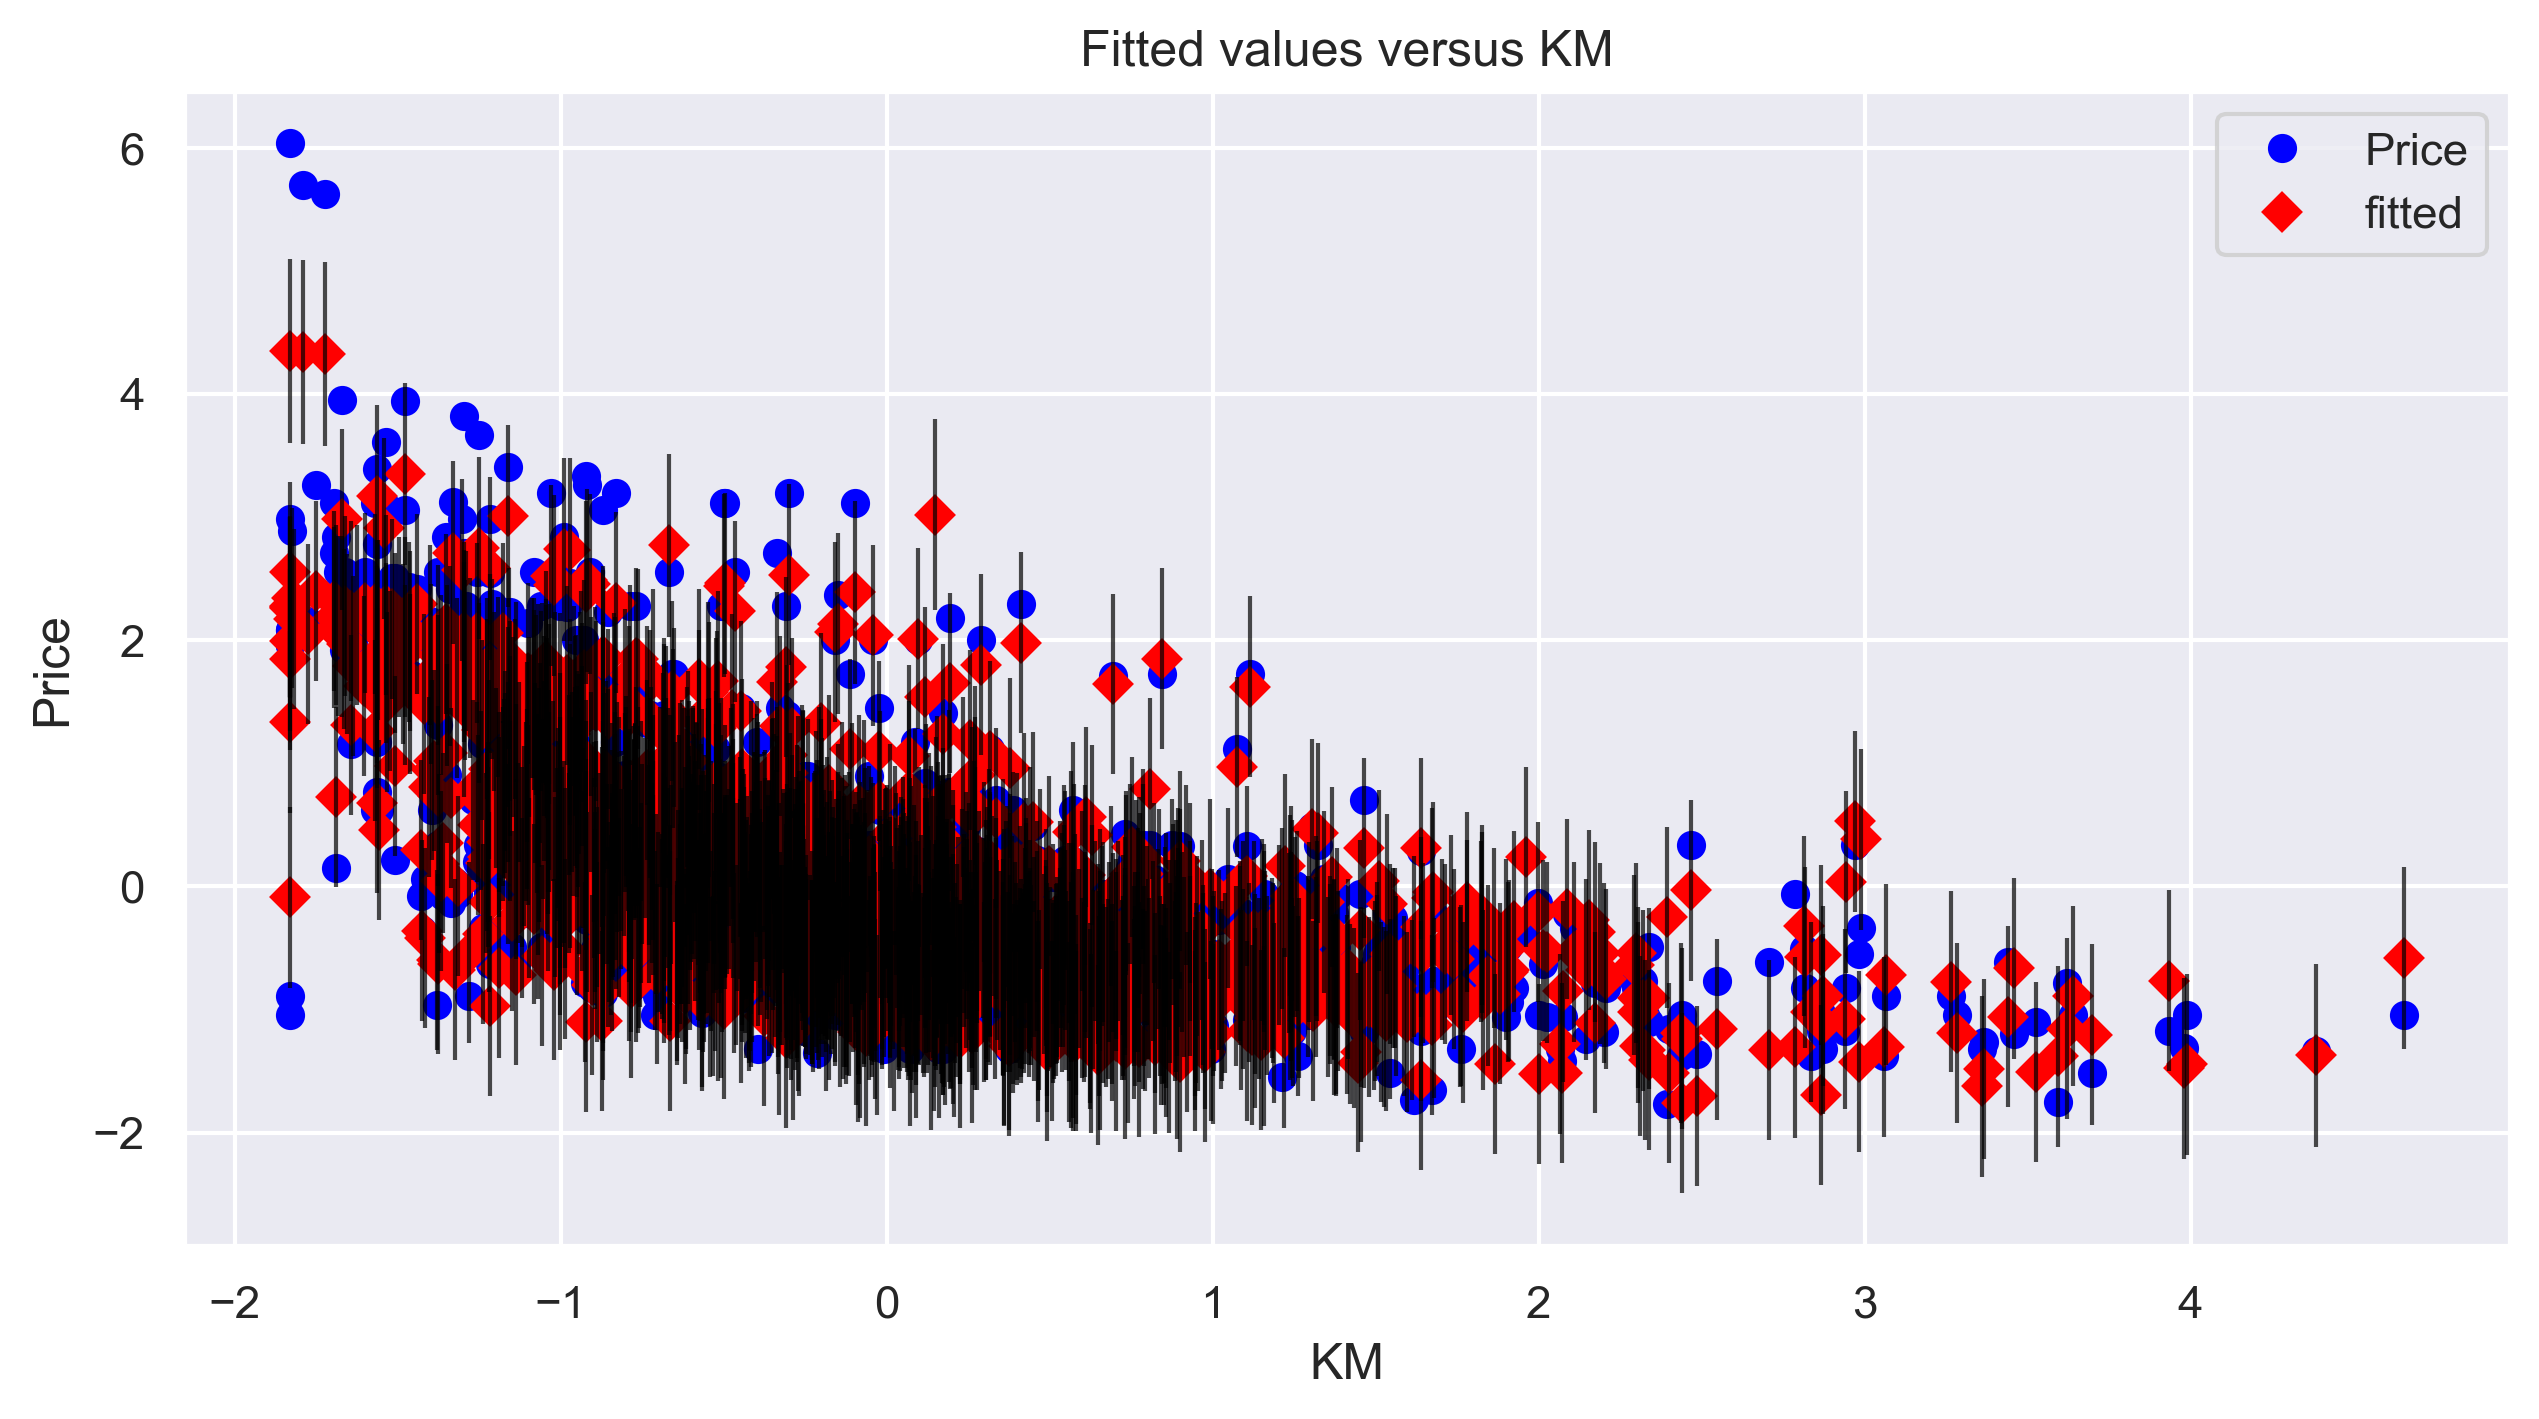

In [91]:
sm.graphics.plot_regress_exog(model_without_cc_and_Doors,'KM'),sm.graphics.plot_fit(model_without_cc_and_Doors,'KM')

(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

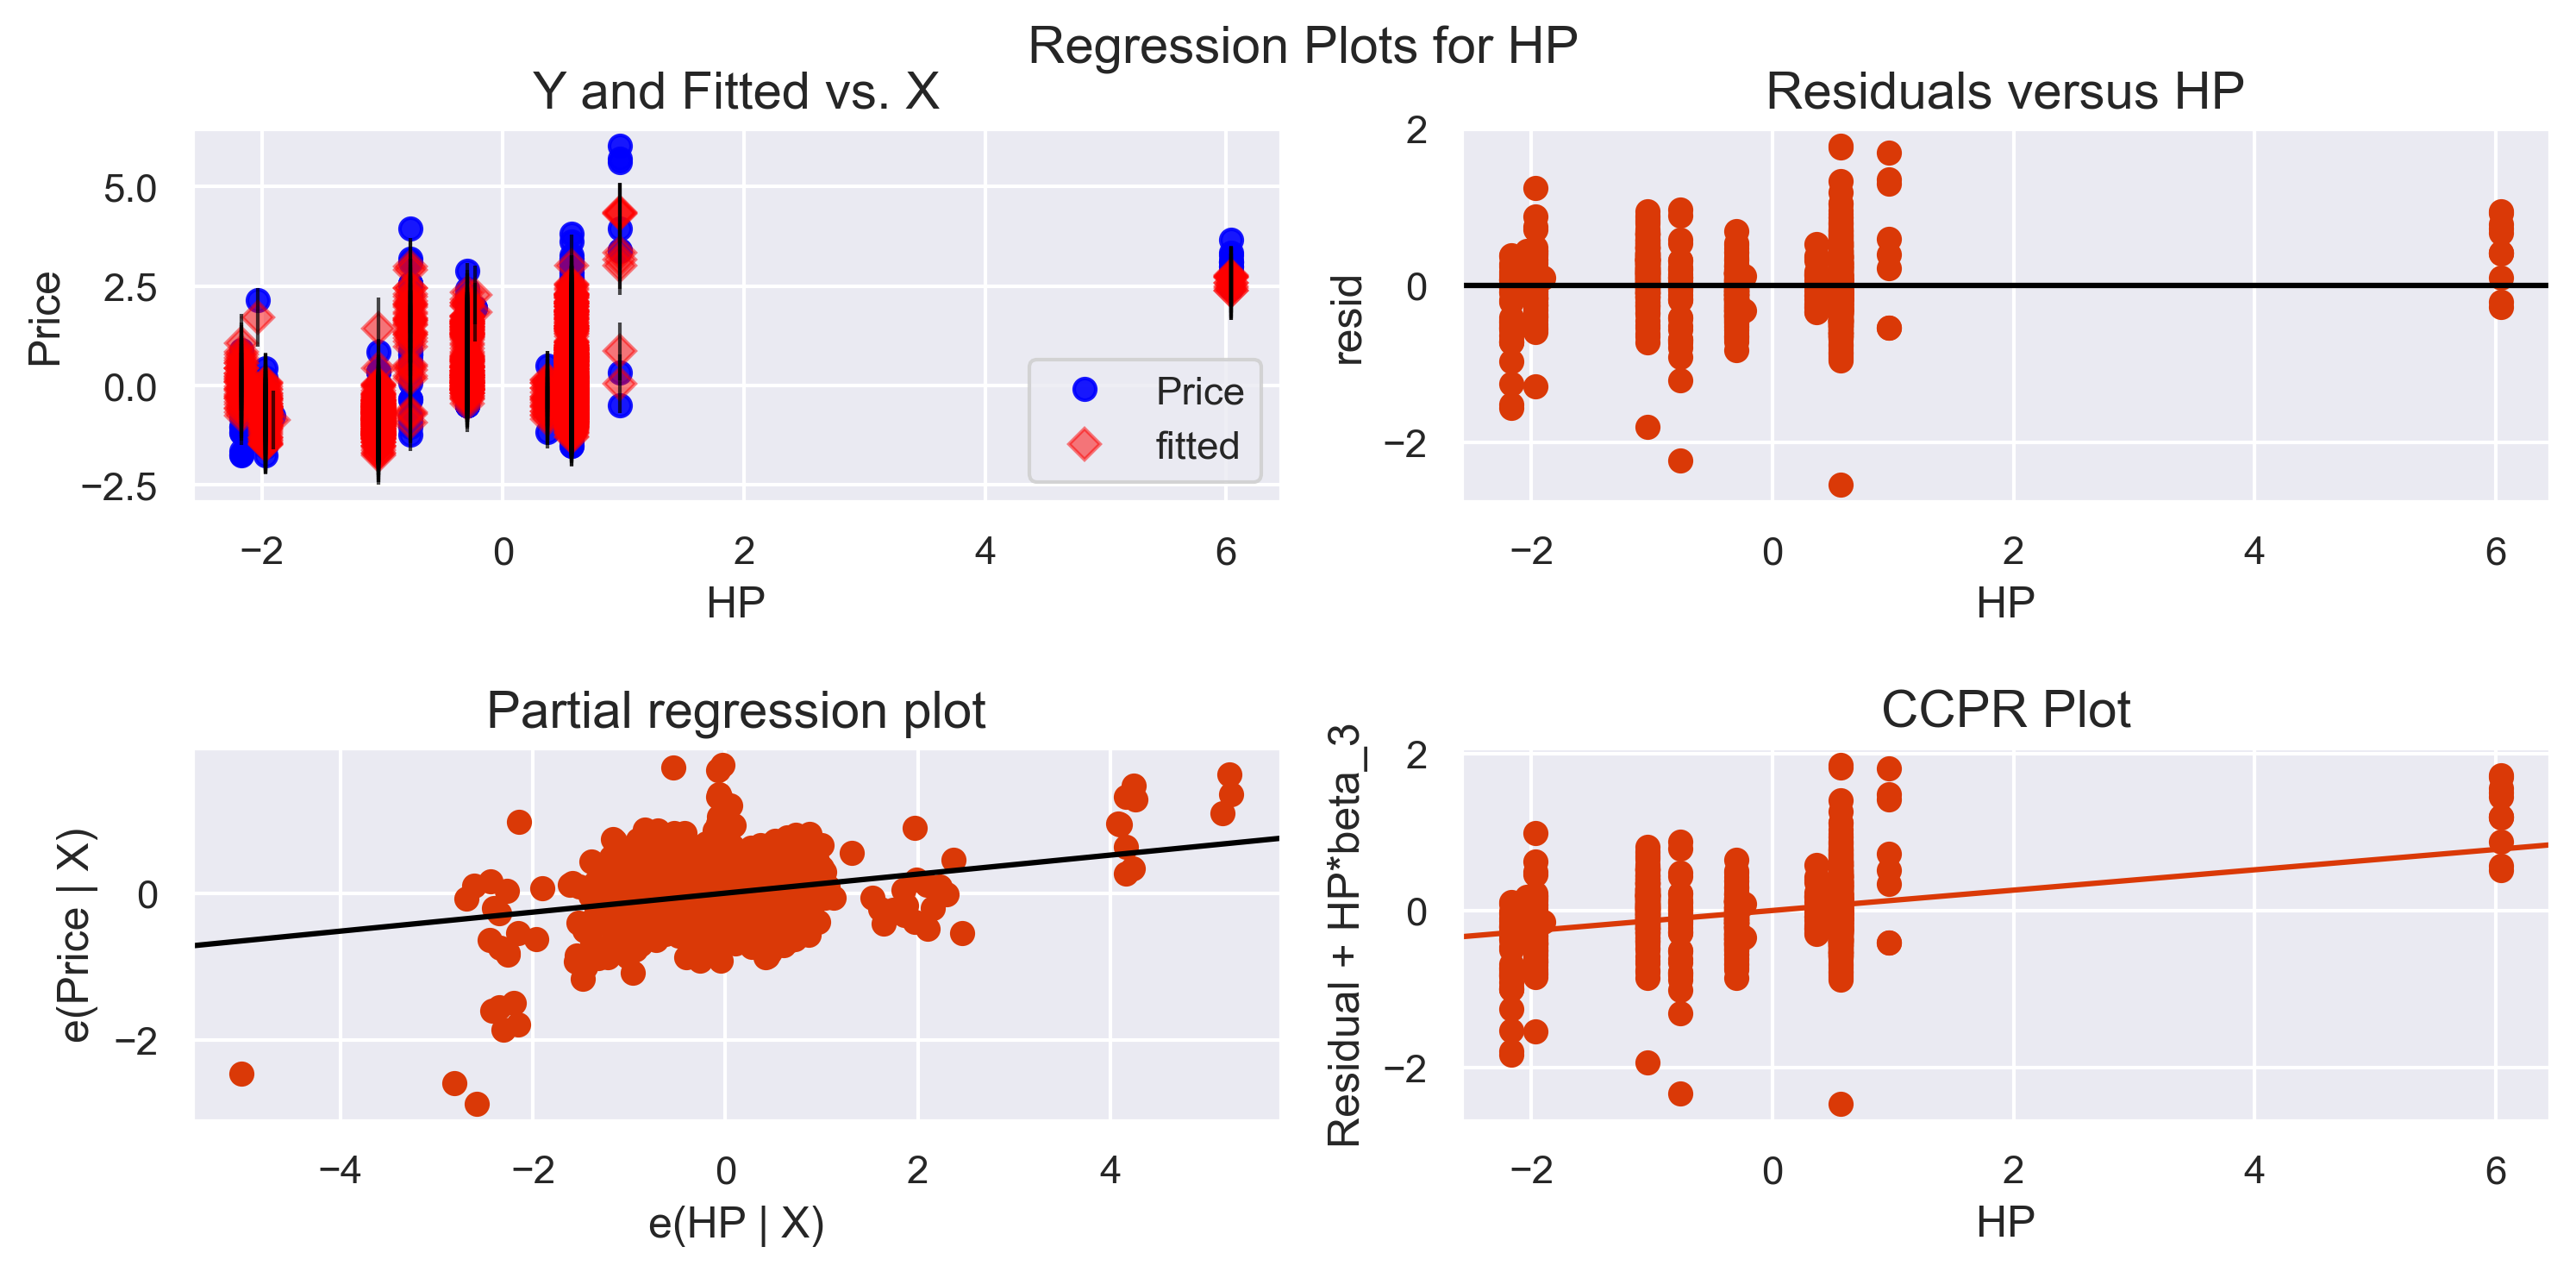

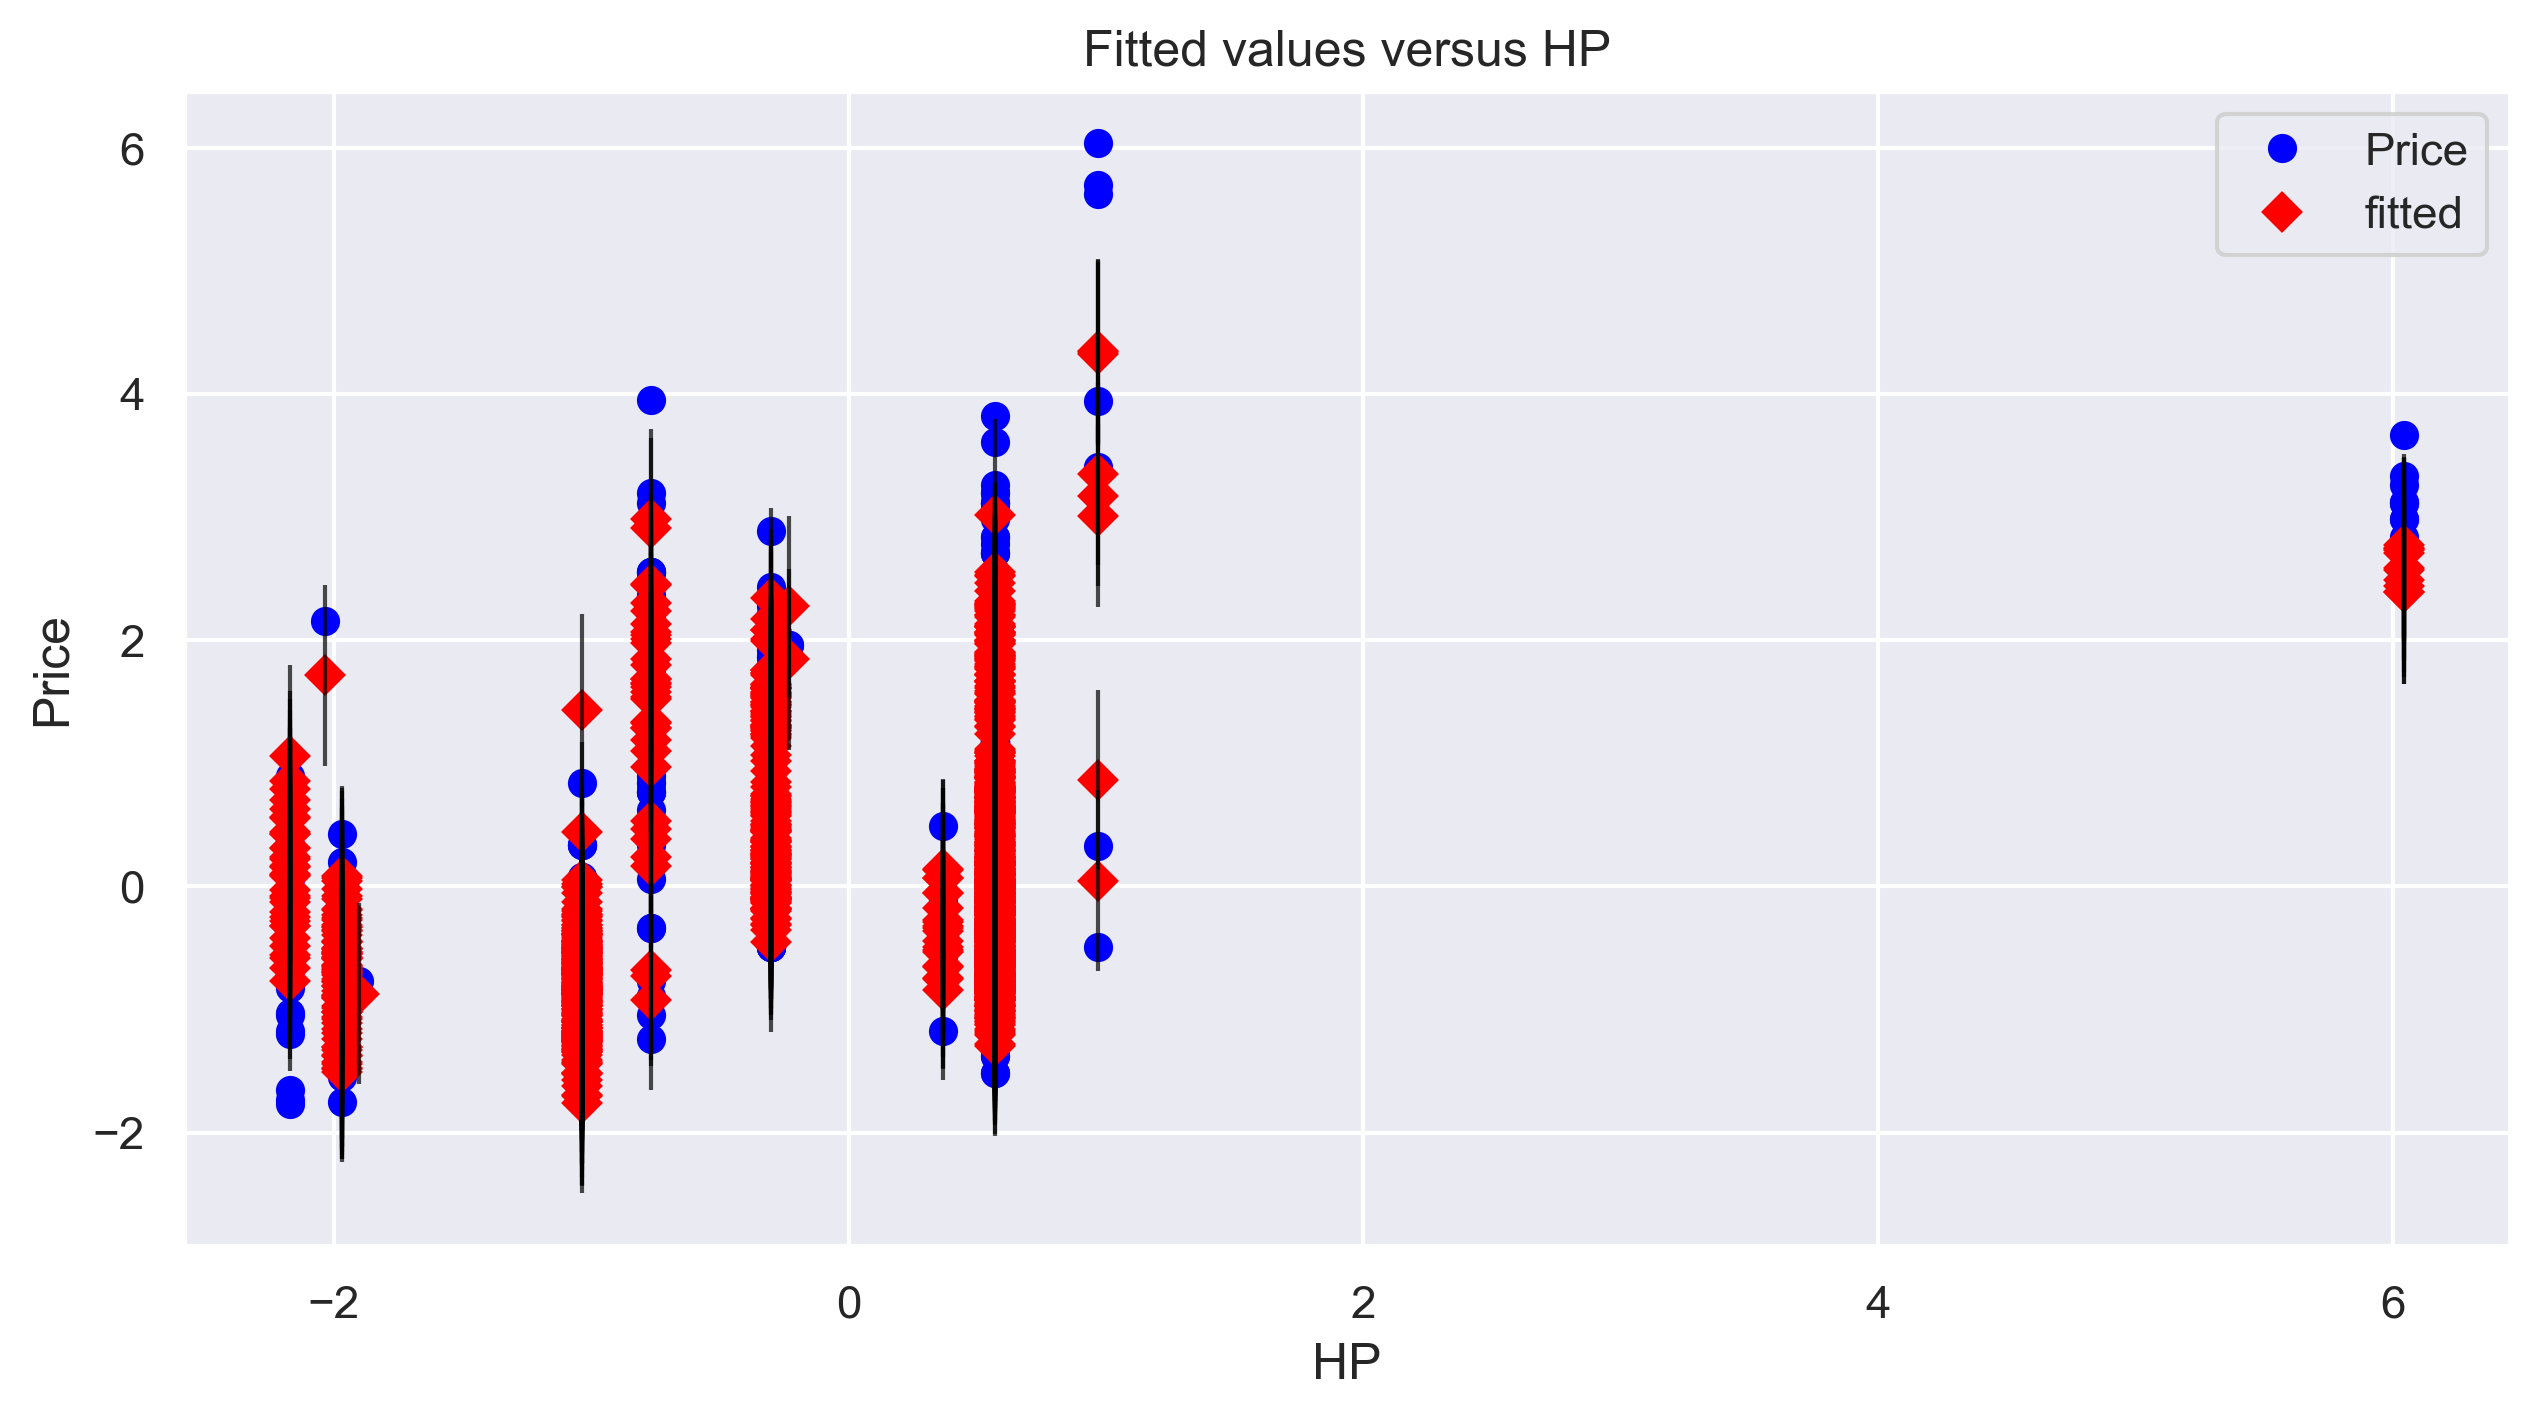

In [92]:
sm.graphics.plot_regress_exog(model_without_cc_and_Doors,'HP'),sm.graphics.plot_fit(model_without_cc_and_Doors,'HP')

(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

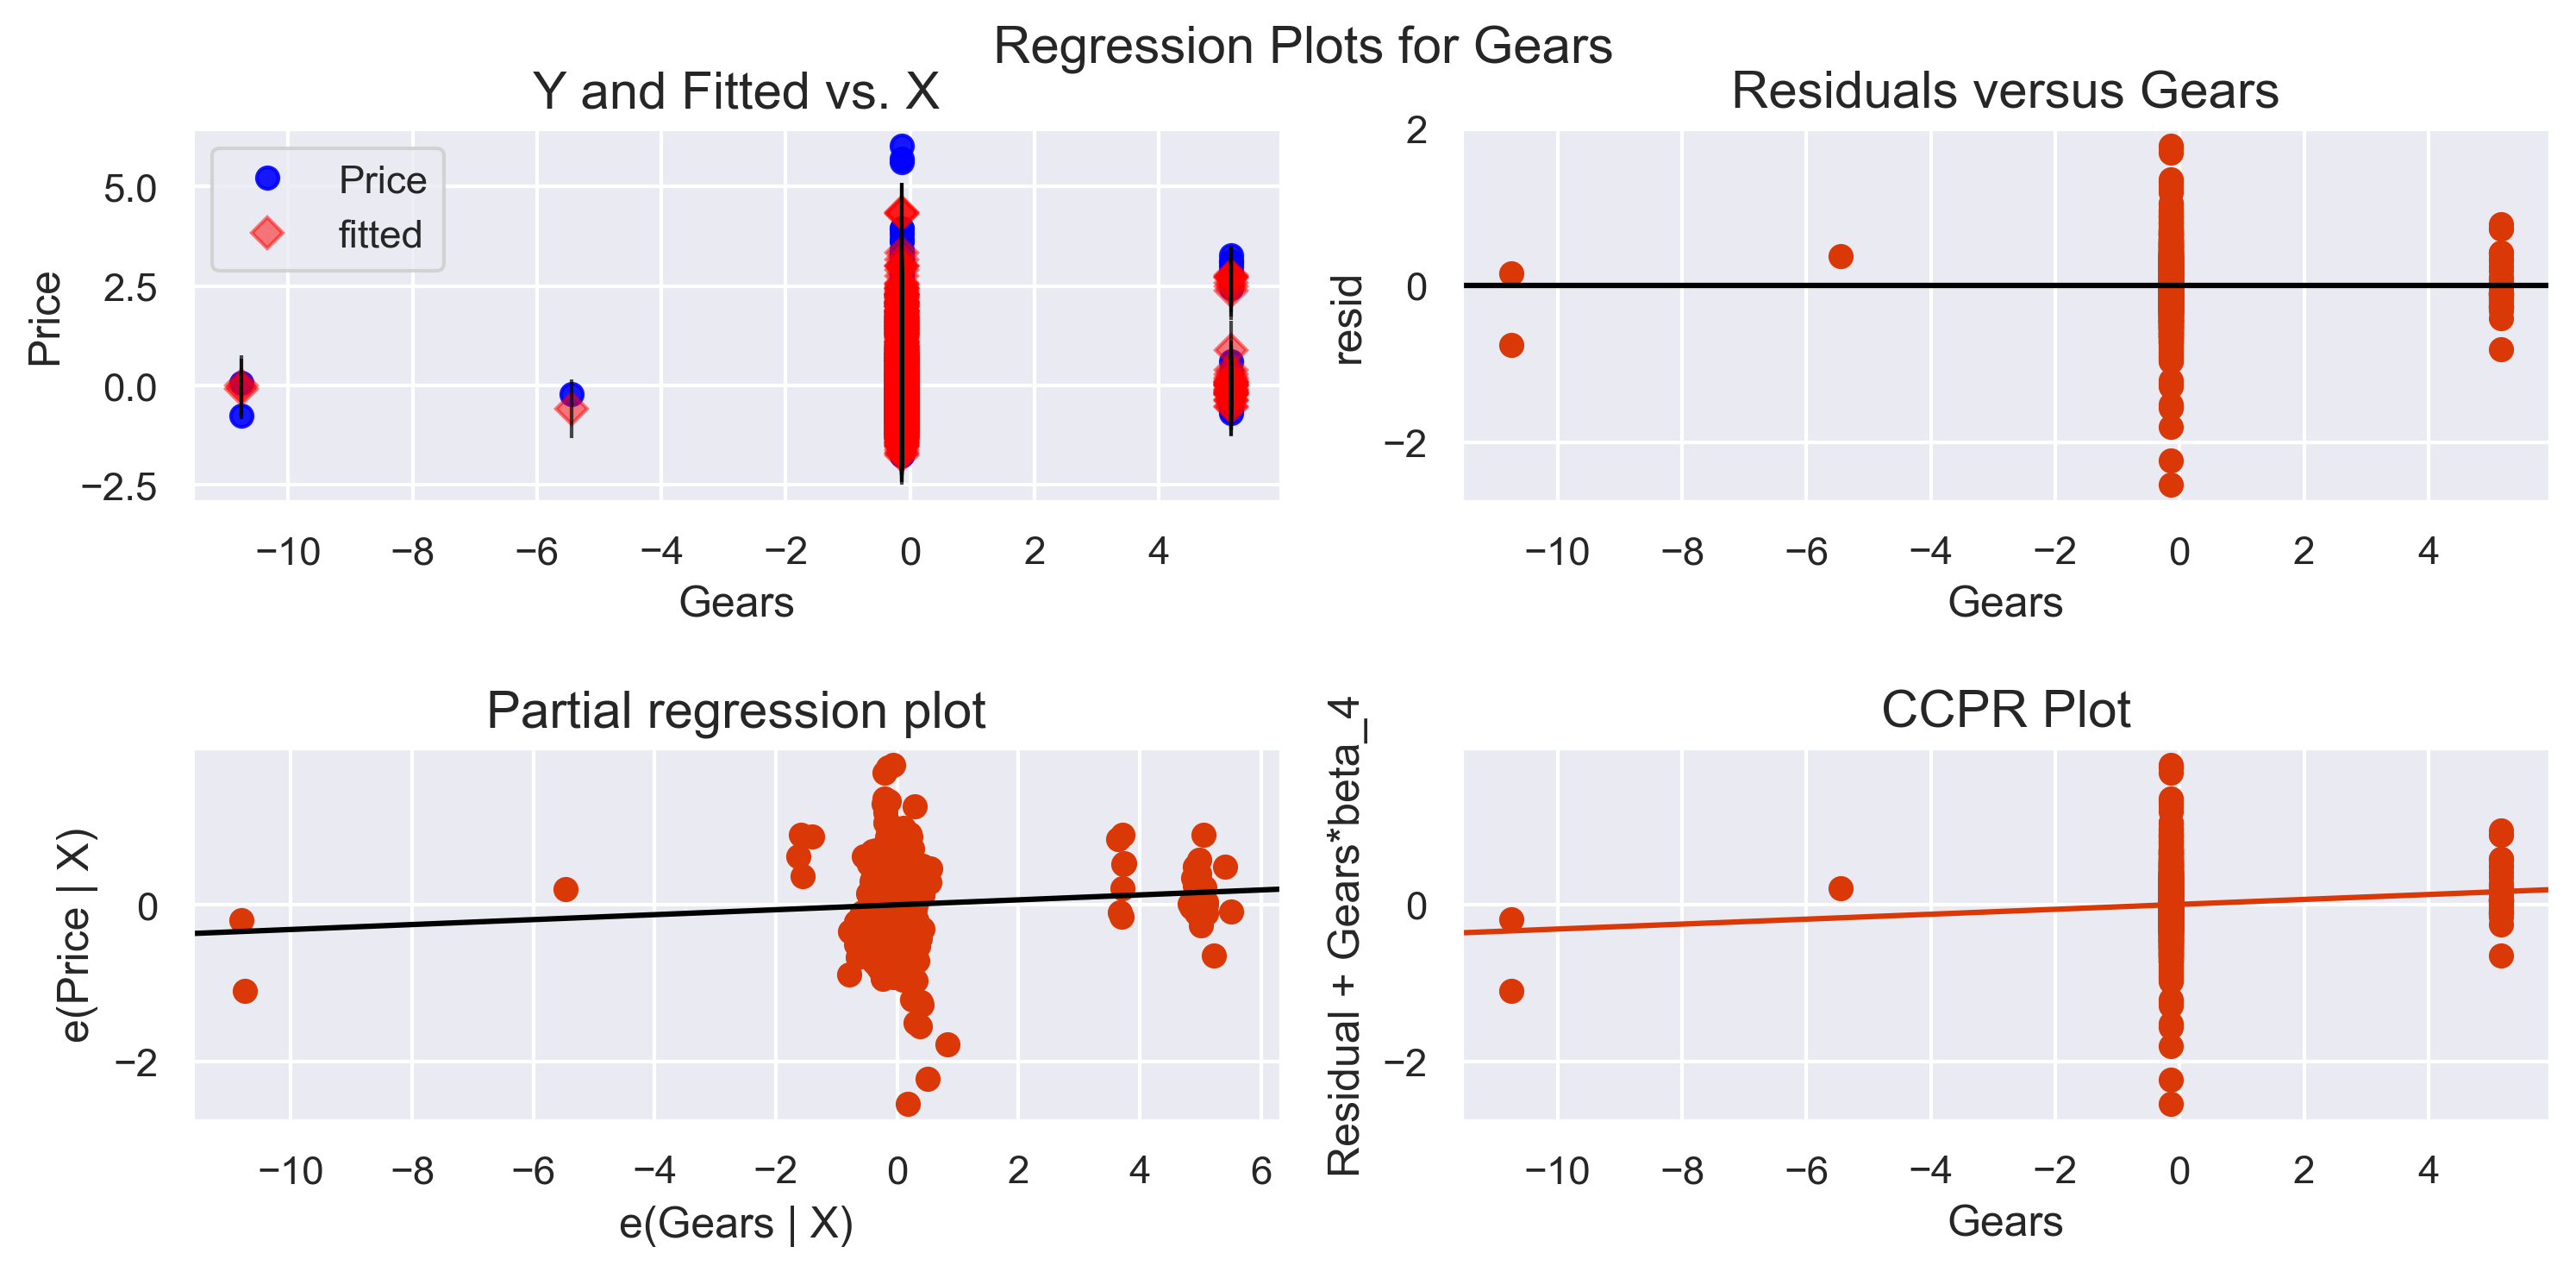

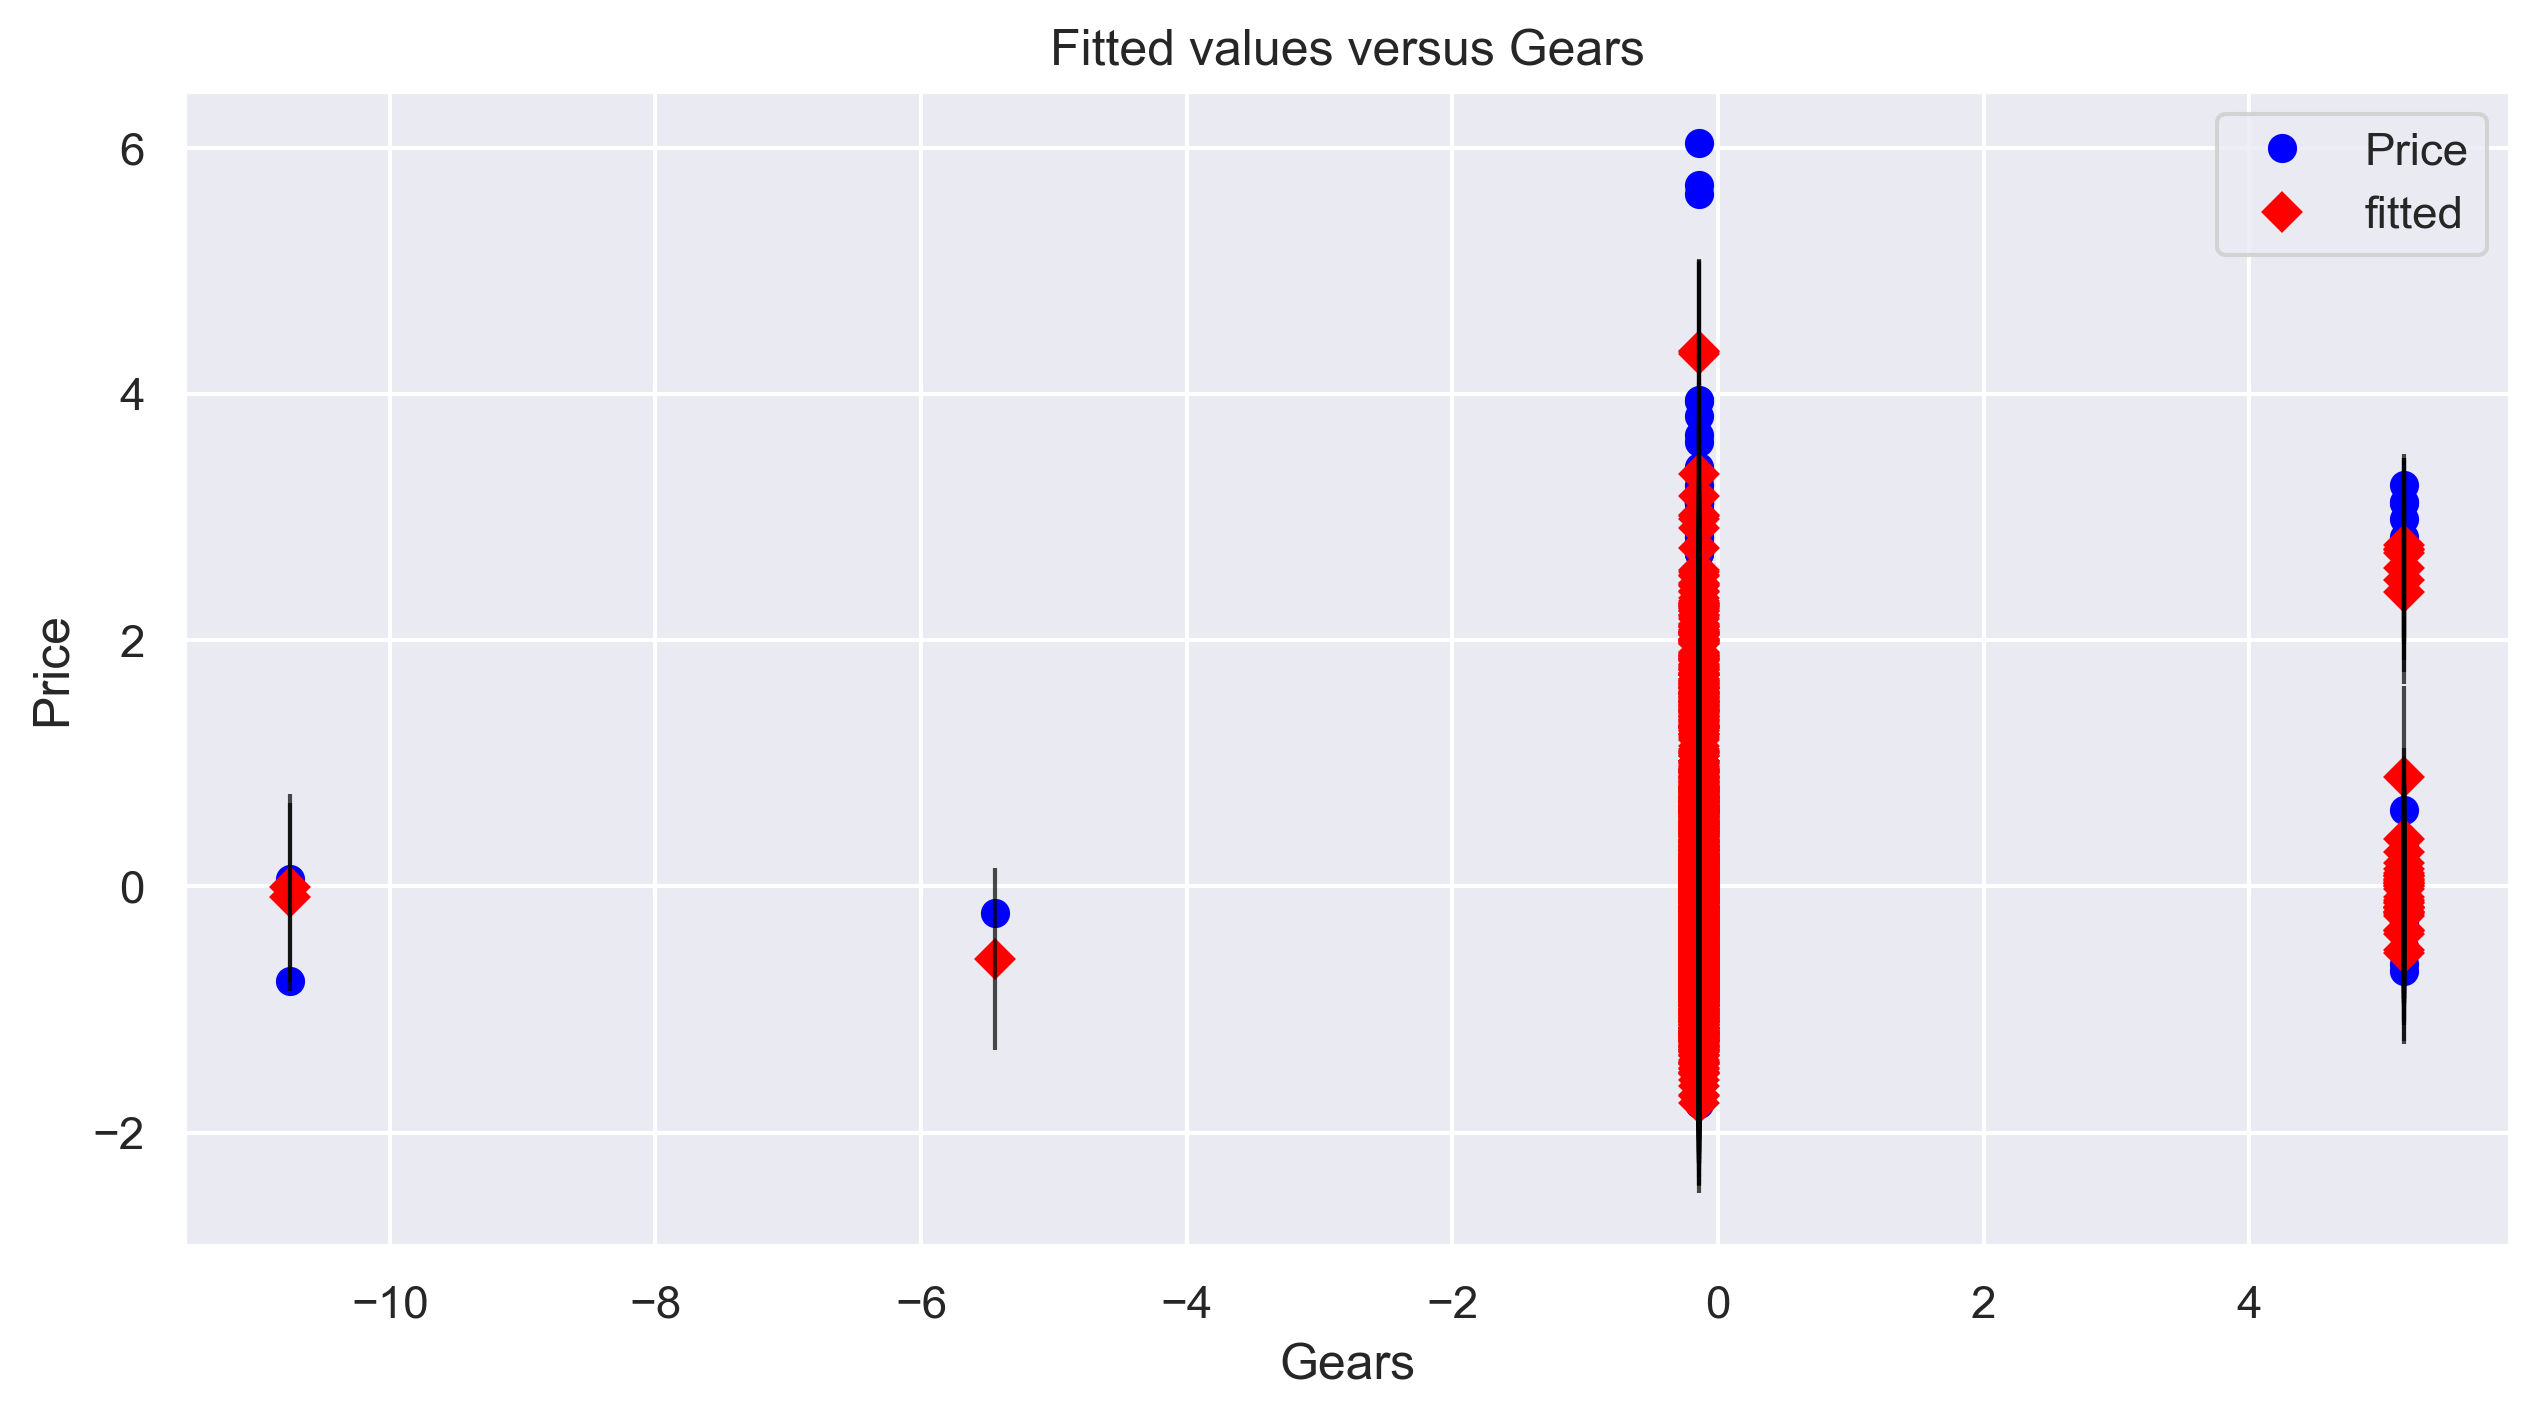

In [93]:
sm.graphics.plot_regress_exog(model_without_cc_and_Doors,'Gears'),sm.graphics.plot_fit(model_without_cc_and_Doors,'Gears')

(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

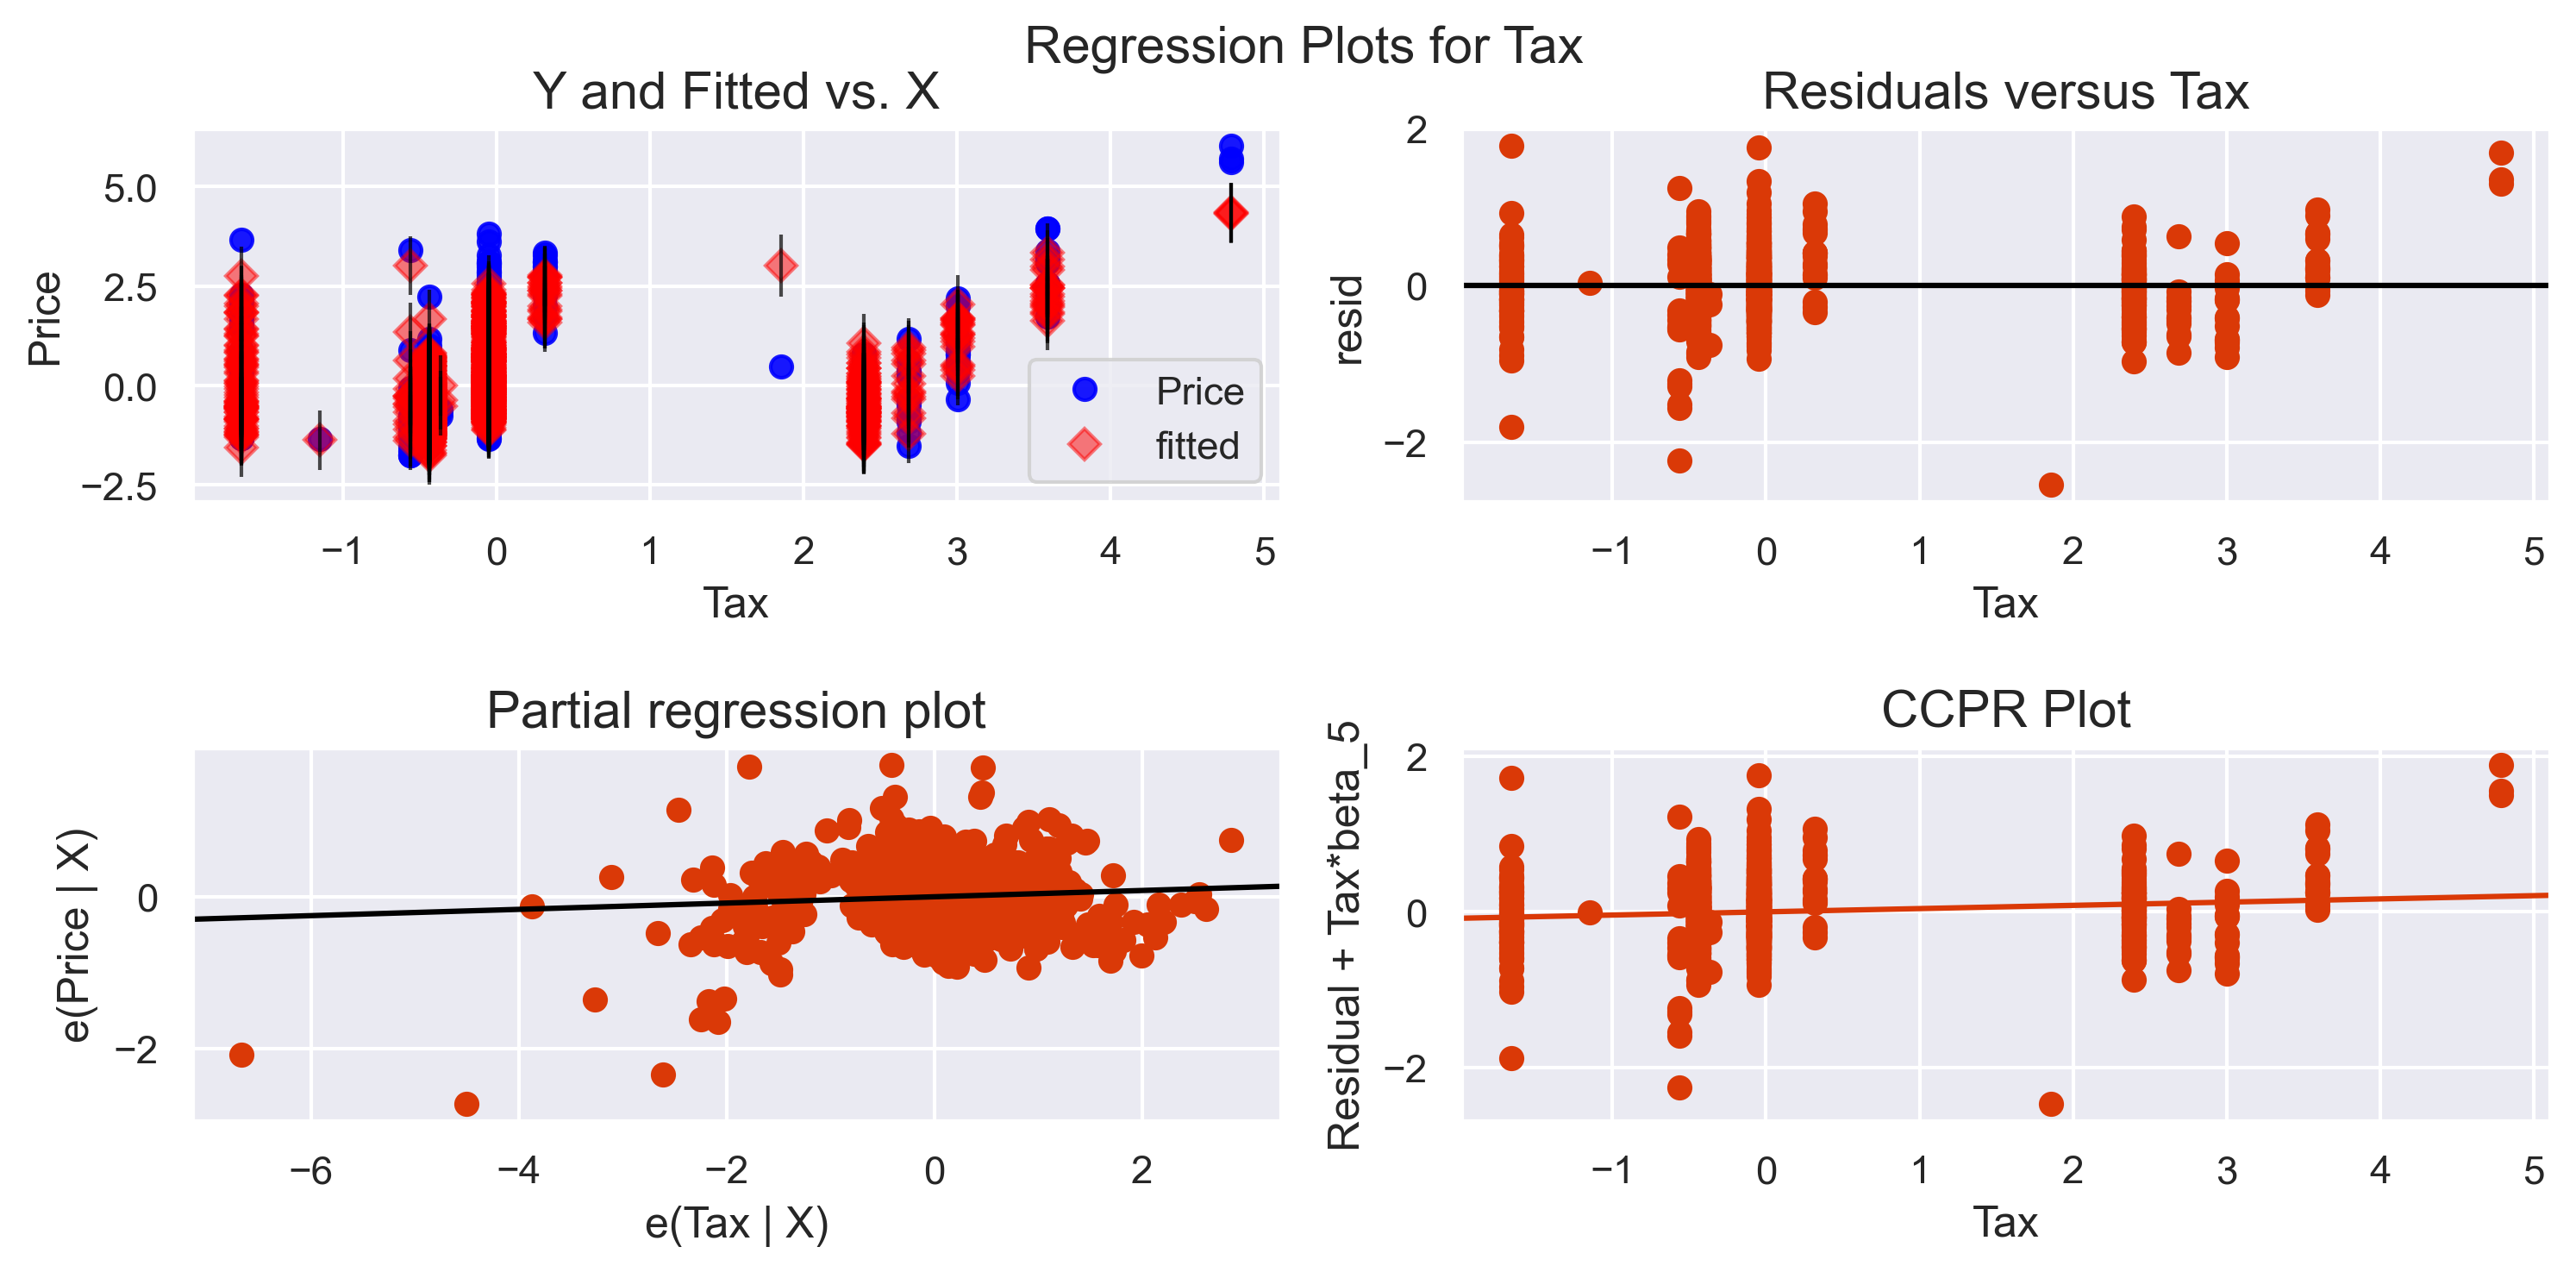

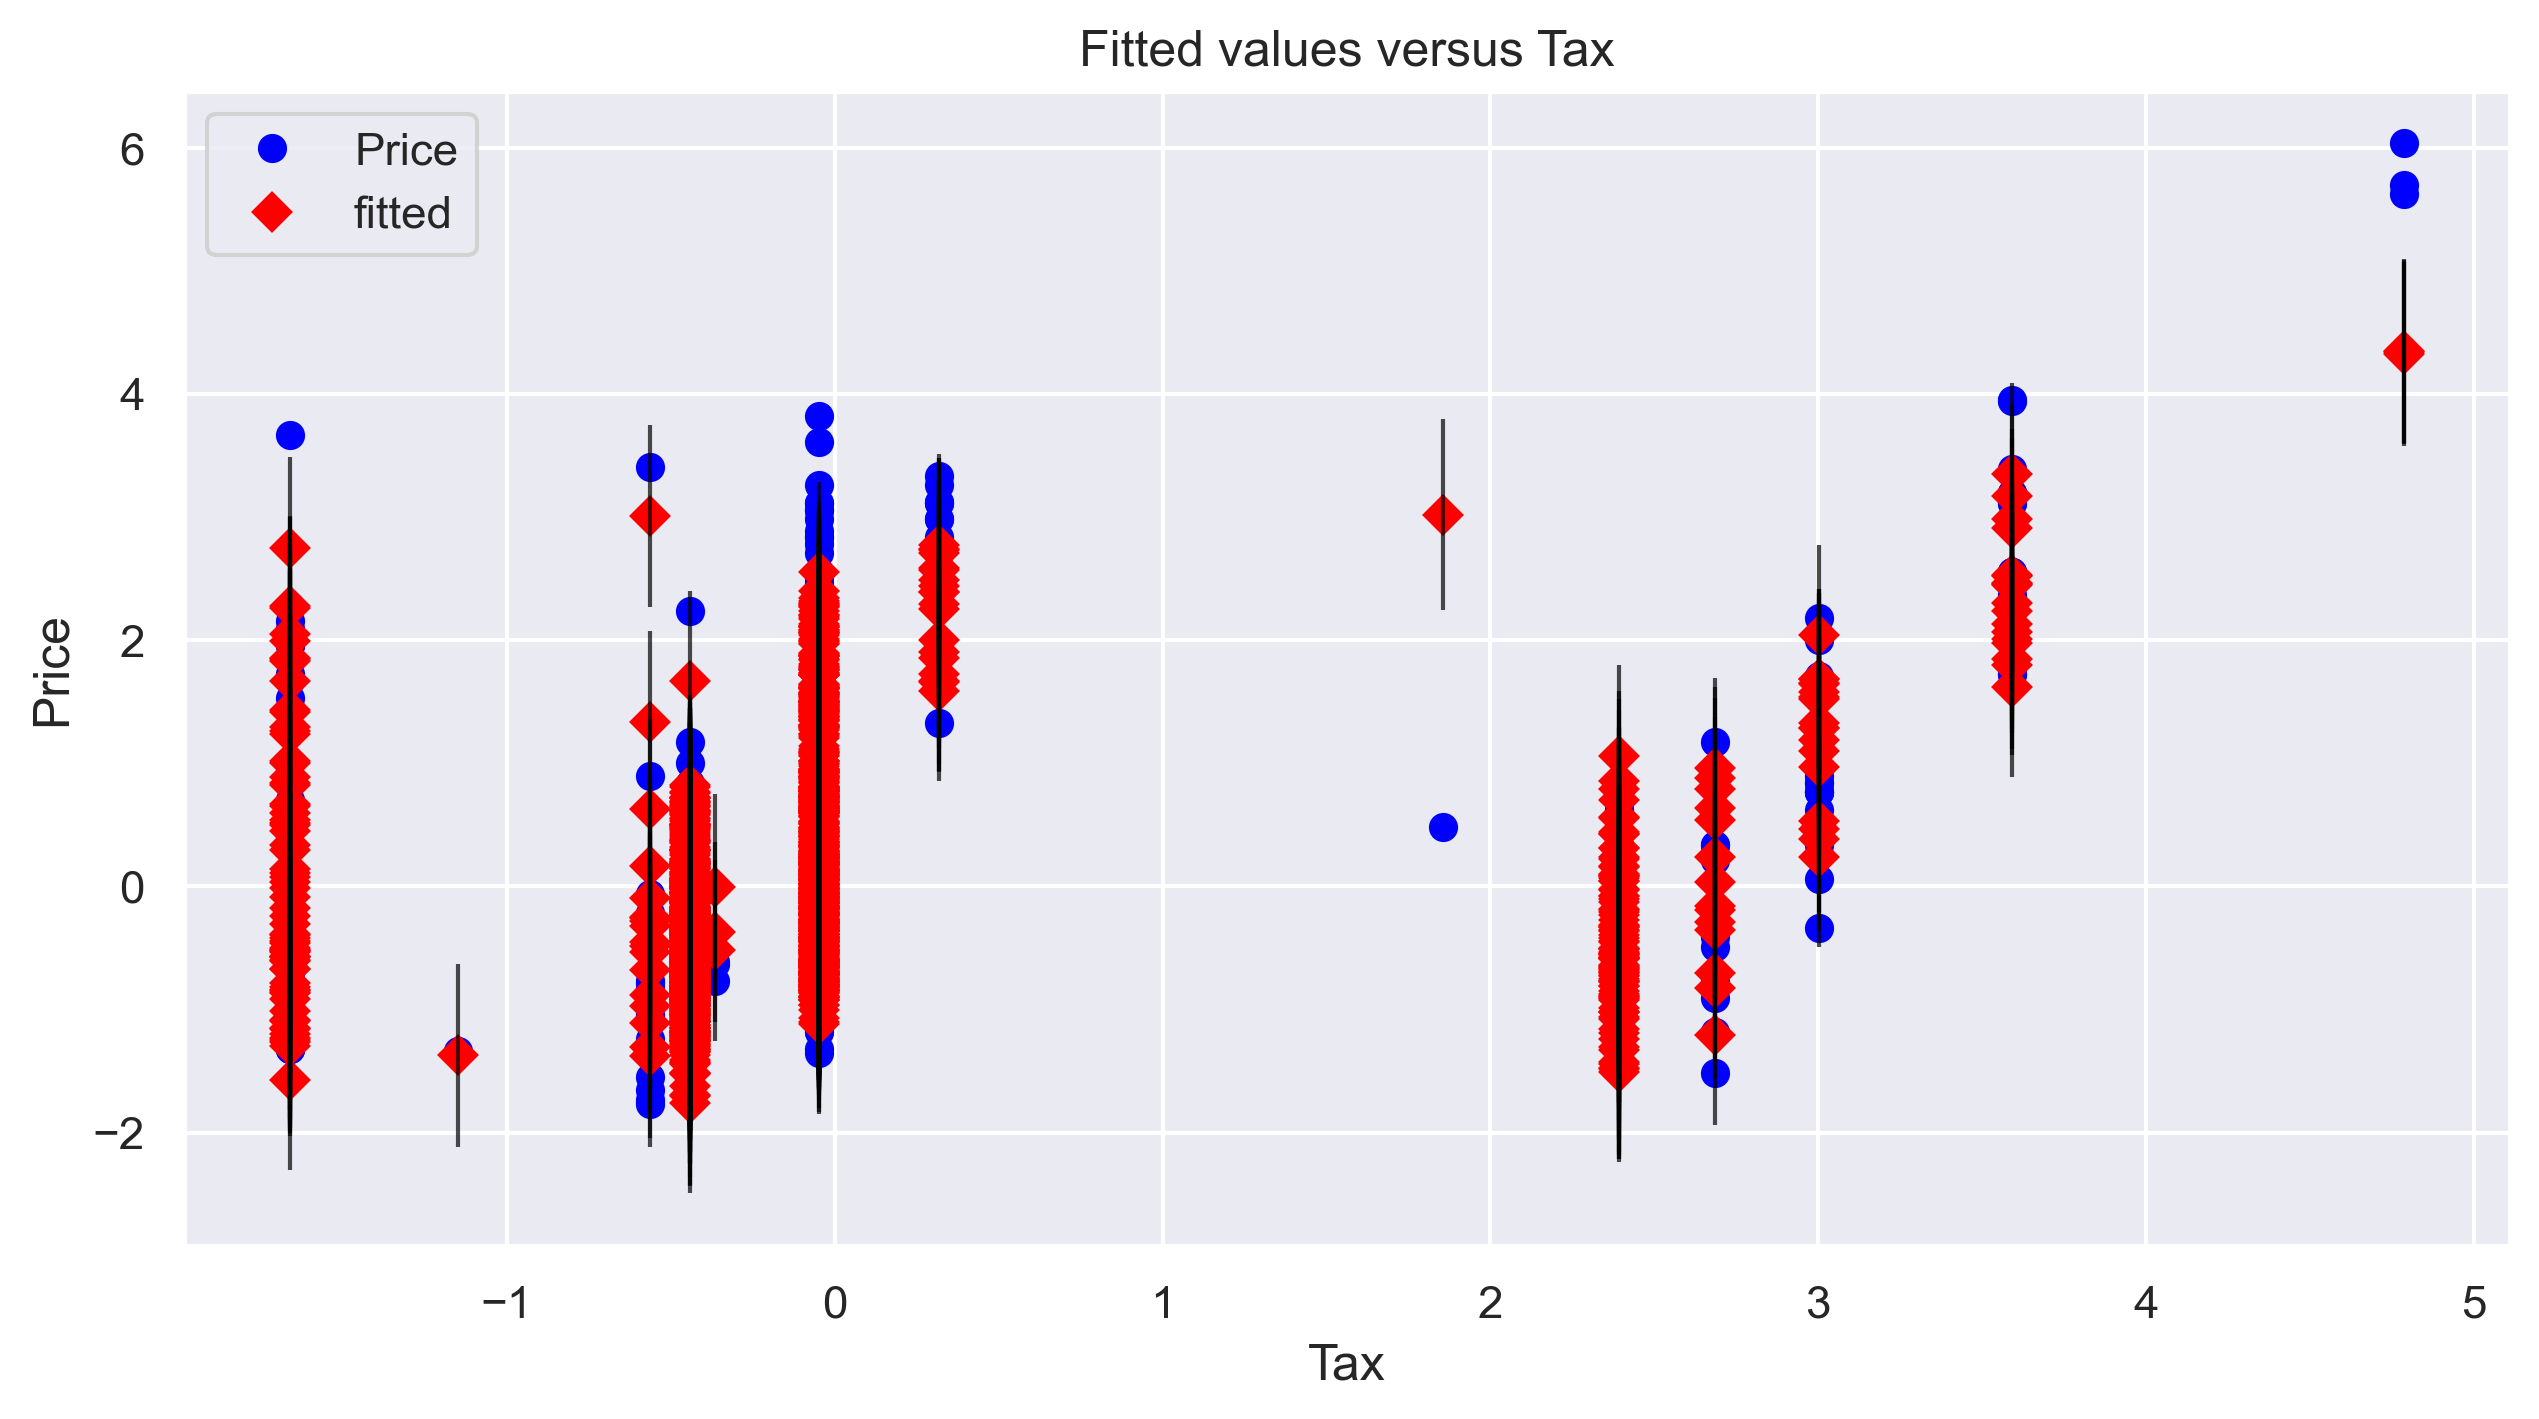

In [94]:
sm.graphics.plot_regress_exog(model_without_cc_and_Doors,'Tax'),sm.graphics.plot_fit(model_without_cc_and_Doors,'Tax')

(<Figure size 3000x1500 with 4 Axes>, <Figure size 3000x1500 with 1 Axes>)

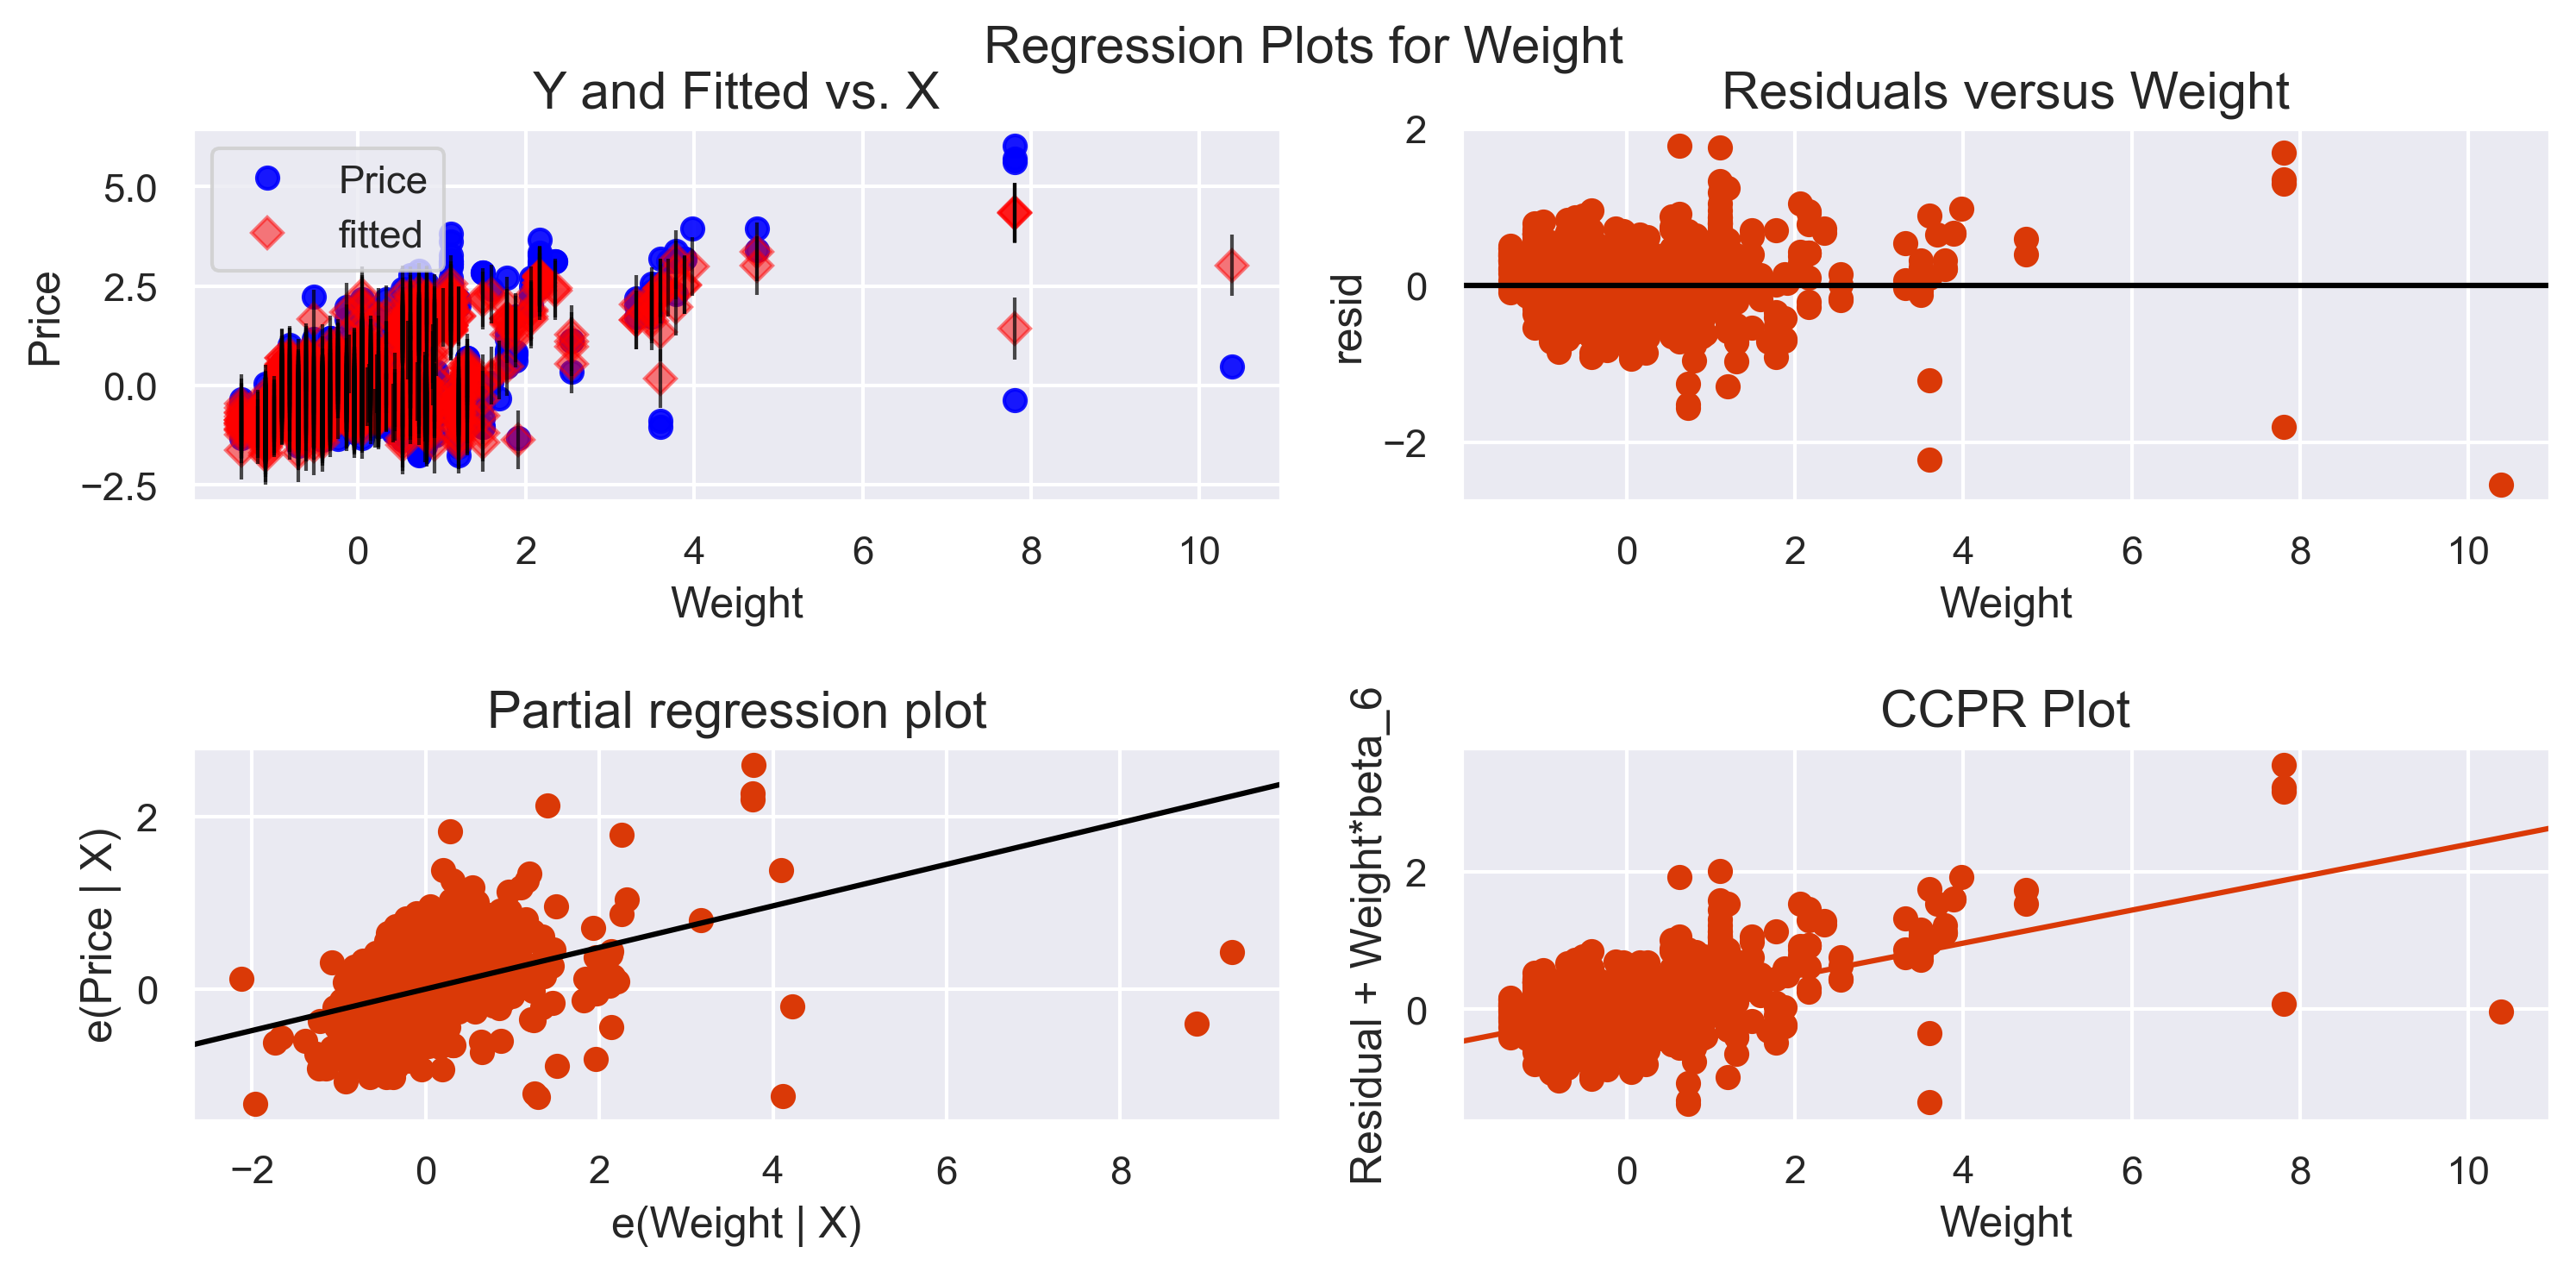

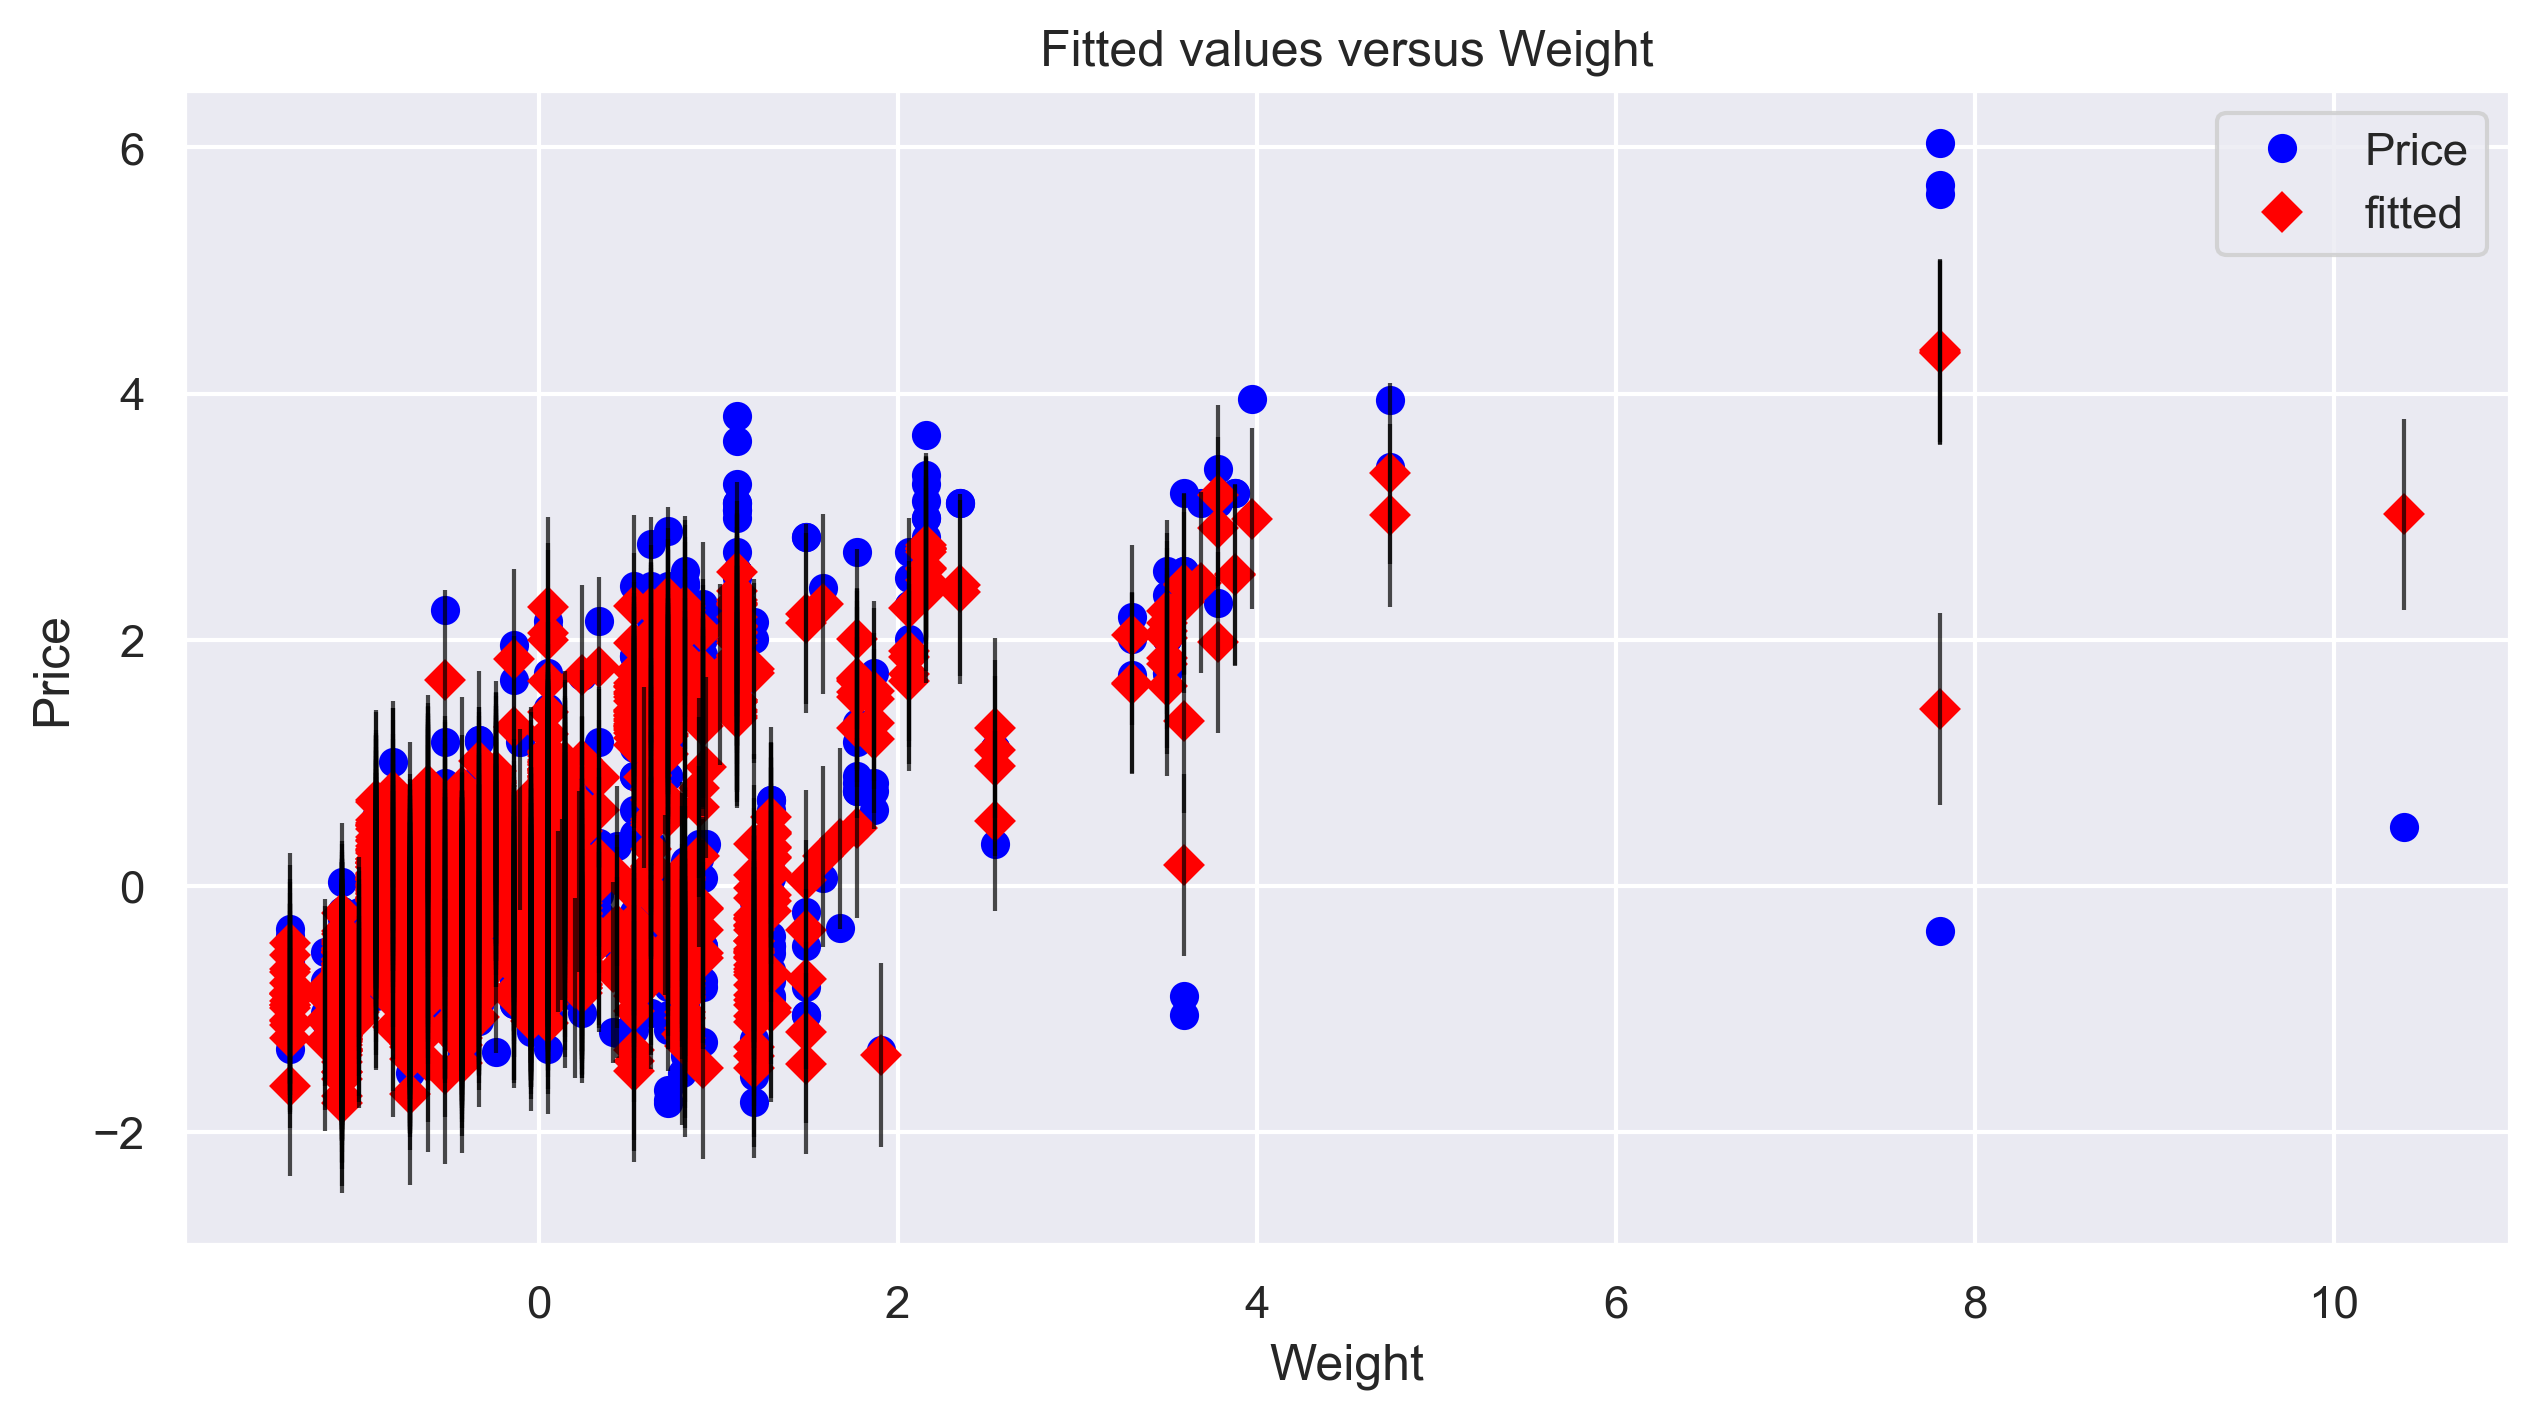

In [95]:
sm.graphics.plot_regress_exog(model_without_cc_and_Doors,'Weight'),sm.graphics.plot_fit(model_without_cc_and_Doors,'Weight')

# Model deletion techniques

# Cook's Distance
- detection influencers and outliers

In [96]:
#find the influence data
inf=model_without_cc_and_Doors.get_influence()

#calculate the cooks distance
c,p=inf.cooks_distance

<StemContainer object of 3 artists>

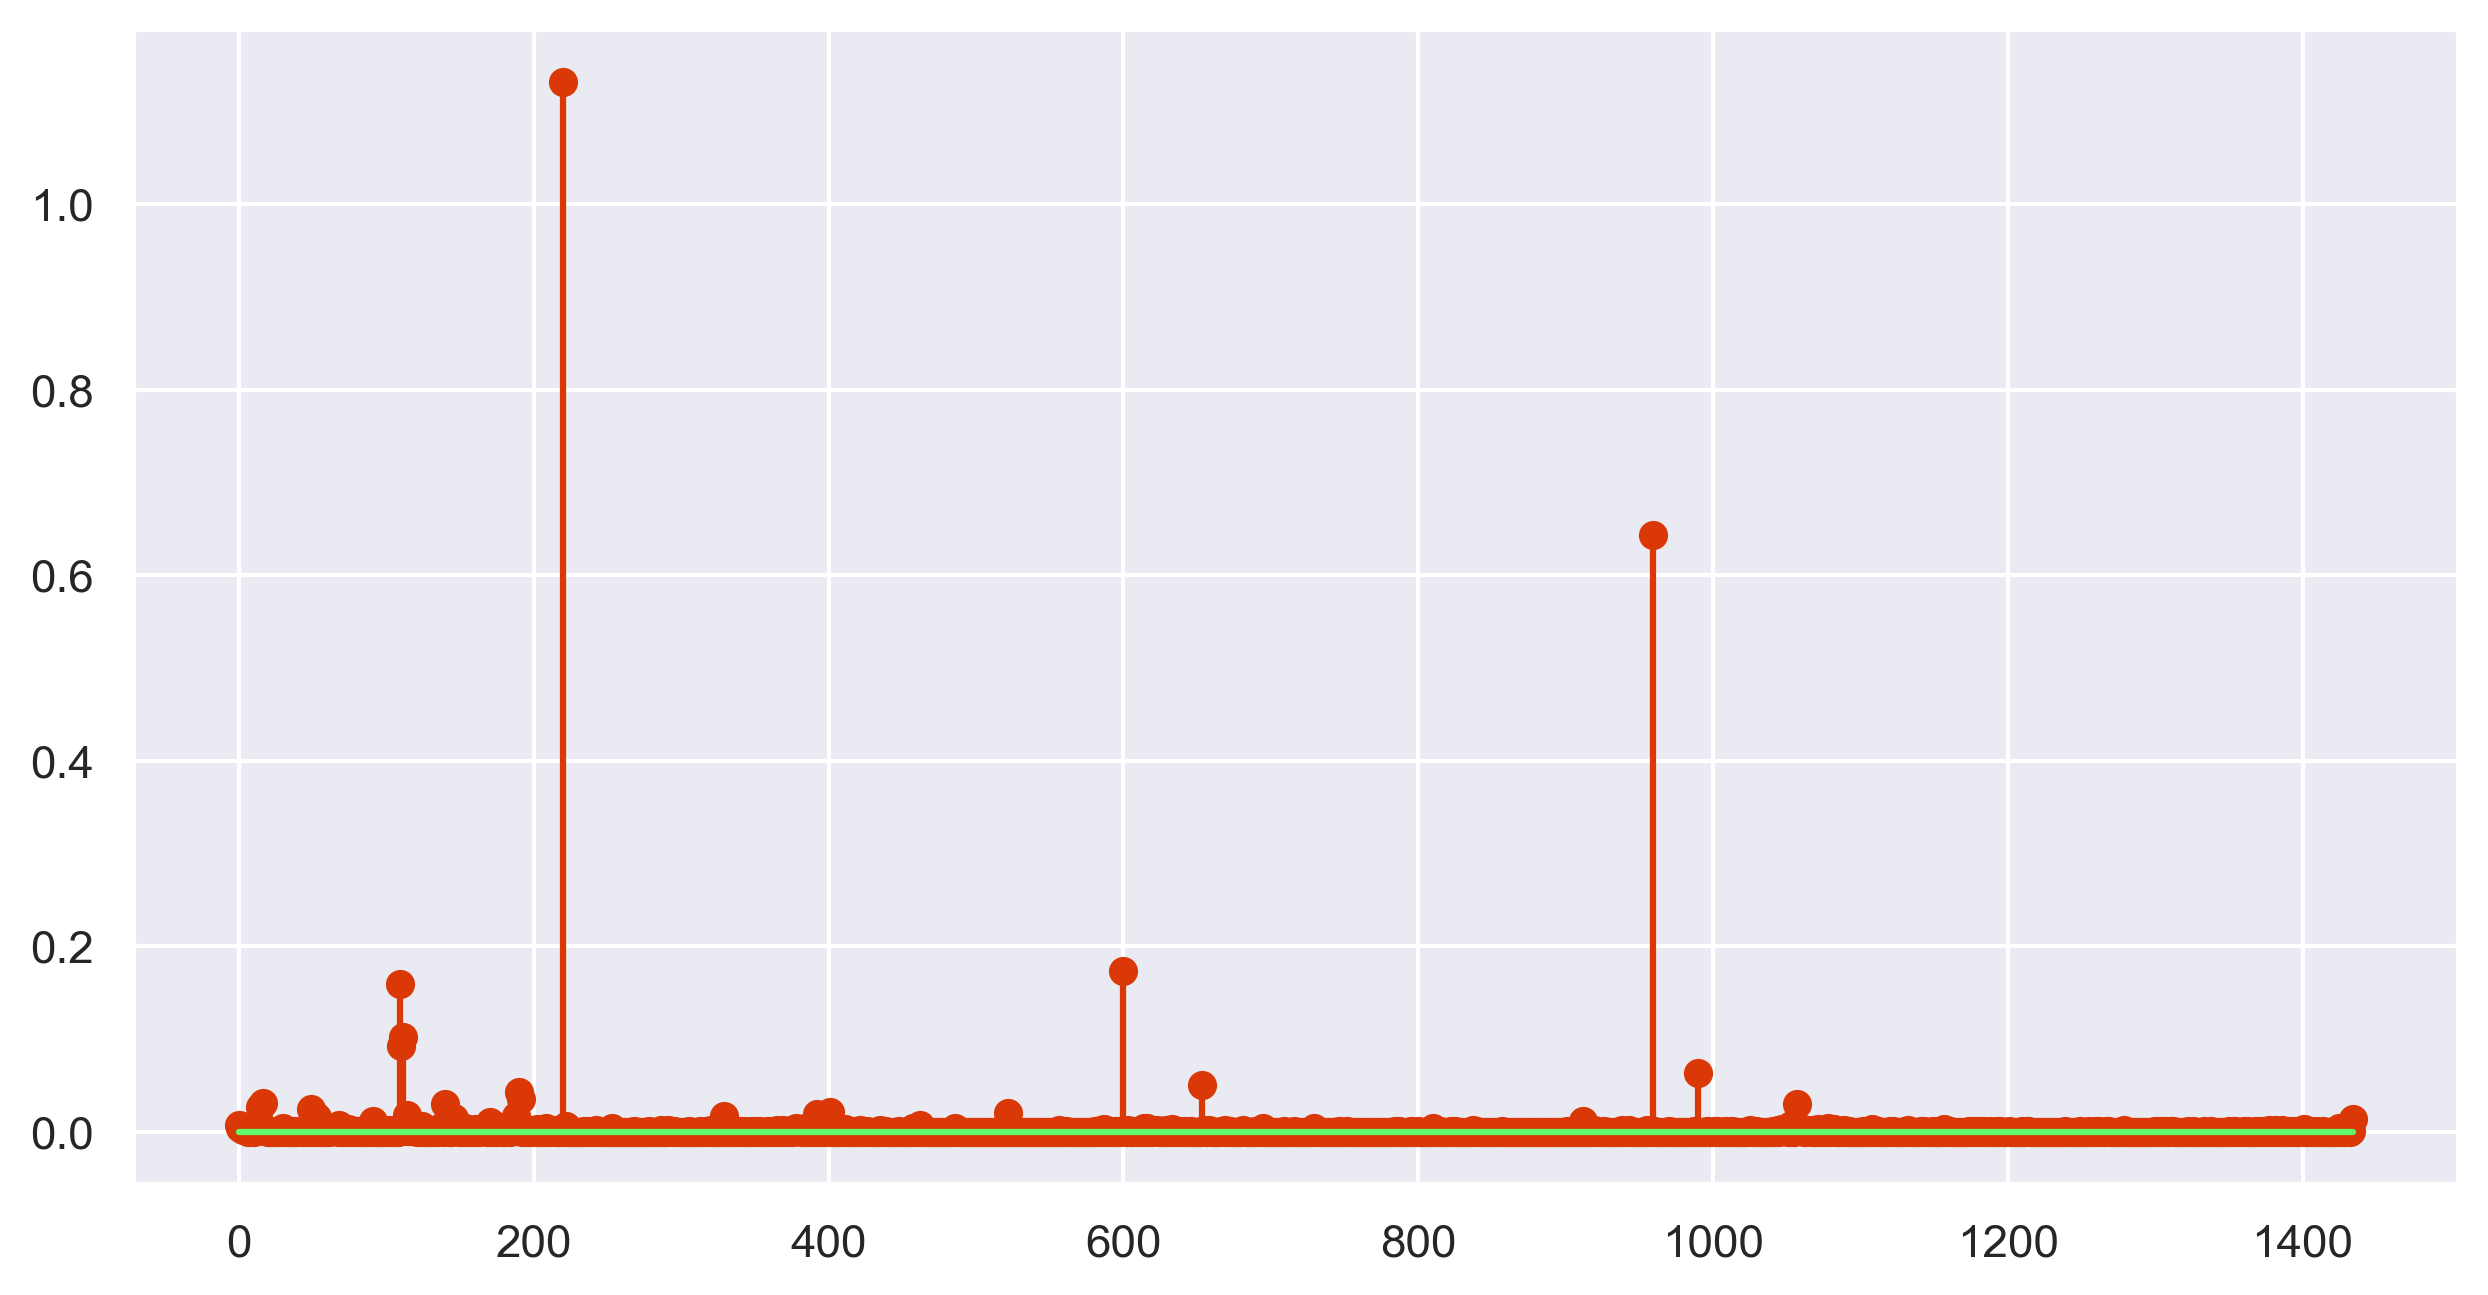

In [97]:
#cooks distance plot
plt.stem(c)#observation i see one data point >1 cook's distance lets remedy that 

In [98]:
np.argmax(c),np.max(c)

(220, 1.132067092776811)

In [100]:
df.iloc[[220]]

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
221  12450   44  74172  110  1600      5      5  163    1615

In [ ]:
# Improving the model

In [109]:
df.drop(index=220,inplace=True)

In [110]:
df

Price  Age     KM   HP    cc  Doors  Gears  Tax  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

In [111]:
final_model_without_cc_and_Doors=smf.ols('Price~Age+KM+HP+Gears+Tax+Weight',data=df).fit()

In [112]:
final_model_without_cc_and_Doors.rsquared

0.8623563019387986

In [115]:
final_model_without_cc_and_Doors.pvalues.round(2)

Intercept    0.0
Age          0.0
KM           0.0
HP           0.0
Gears        0.0
Tax          0.0
Weight       0.0
dtype: float64

In [118]:
r_square_table

models  r_square_values
0                                model_capped            0.856
1                     model_capped_without_cc            0.856
2                                    model_cc            0.863
3                                 model_Doors            0.862
4                                   model_raw            0.863
5                  model_without_cc_and_Doors            0.862
6                                   model_Age            0.768
7                            model_Age_Weight            0.804
8                         model_Age_Weight_KM            0.847
9                      model_Age_Weight_KM_HP            0.861
10                 model_Age_Weight_KM_HP_Tax            0.861
11           model_Age_Weight_KM_HP_Tax_Doors            0.861
12        model_Age_Weight_KM_HP_Tax_Doors_cc            0.862
13  model_Age_Weight_KM_HP_Tax_Doors_cc_Gears            0.863
14           final_model_without_cc_and_Doors            0.862